***
# <h1 align="center"><font color="darkblue" size=6>**NHANES Data Analysis of Heavy Metals**</h1></font>
## <h1 align ="center"><font size=6>*Robert M. Taylor*, PhD</h1></font>
***

#### <h1 align="center"><font color = "darkgreen" size=5>*This notebook is for the analysis of heavy metals in the NHANES datasets from 2017-2018 (2019-2020 is not out yet, as of the writing of this notebook).* The data can be found at __[NHANES DATA](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017)__</font></h1>
<!-- #### <h1 align="center"><font color = "darkgreen" size="6">The data can be found at __[NHANES DATA](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017)__</font></h1> -->

#### import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import os
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
print("current working directory is", os.getcwd())

current working directory is /Users/tulip_home/Dropbox/rmtaylor/projects/NHANES


#### I'll first load in the data sets and tranform them to .csv files

In [3]:
# demographics = pd.read_sas("DEMO_J.xpt")
# chromCobalt = pd.read_sas("CRCO_J.xpt")
# biopro = pd.read_sas("BIOPRO_J.xpt")
# huq = pd.read_sas("HUQ_J.xpt")
# ocq = pd.read_sas("OCQ_J.xpt")
# pbcd = pd.read_sas("PBCD_J.xpt")
# puqmec = pd.read_sas("PUQMEC_J.xpt")
# smq = pd.read_sas("SMQ_J.xpt")
# smqfam = pd.read_sas("SMQFAM_J.xpt")

In [4]:
# demographics.to_csv("demo.csv")
# chromCobalt.to_csv("chromCopper.csv")
# biopro.to_csv("biopro.csv")
# huq.to_csv("huq.csv")
# ocq.to_csv("ocq.csv")
# pbcd.to_csv("pbcd.csv")
# puqmec.to_csv("puqmec.csv")
# smq.to_csv("smq.csv")
# smqfam.to_csv("smqfam.csv")

<h1 align="center"><font size=4>The datasets contain a lot of info that I do not need included. Therefore, I used excel to pull out only the features I need. I'll now combine them into a single dataset called "NHANES_combined.csv"</h1></font>

In [5]:
demo = pd.read_csv("demo1.csv")
biopro = pd.read_csv("biopro1.csv")
chromCob = pd.read_csv("chromCobalt1.csv")
huq = pd.read_csv("huq1.csv")
pbcd = pd.read_csv("pbcd1.csv")
puqmec = pd.read_csv("puqmec1.csv")
smq = pd.read_csv("smq1.csv")

In [6]:
NHANES_combined = pd.merge(demo, biopro)
NHANES_combined = pd.merge(NHANES_combined, chromCob)
NHANES_combined = pd.merge(NHANES_combined, huq)
NHANES_combined = pd.merge(NHANES_combined, pbcd)
NHANES_combined = pd.merge(NHANES_combined, puqmec)
NHANES_combined = pd.merge(NHANES_combined, smq)
NHANES_combined.head(2)

,ID,Gender,Age_years,Age_months,BirthCountry,HouseholdSize,FamilySize,AnnualHouseIncome,AnnualFamilyIncome,RatioFamilyIncomePoverty,...,BloodSelenium_ug/L,BloodSelenium_umol/L,BloodMang_ug/L,BloodMang_nmol/L,PesticideUseHome,PesticideUsedWeeds,AgeStartedSmoking,SmokeNow,CigsPerDay30Days,EverUsedEcig
0,93705,2,66.0,NaN,1,1,1,3.0,3.0,0.82,...,185.71,2.36,8.57,155.99,2.0,2.0,16.0,3.0,NaN,2.0
1,93708,2,66.0,NaN,2,2,2,6.0,6.0,1.63,...,178.79,2.27,15.09,274.67,2.0,2.0,NaN,NaN,NaN,2.0


In [7]:
NHANES_combined.shape

(3676, 48)

In [8]:
NHANES_combined.columns

Index(['ID', 'Gender', 'Age_years', 'Age_months', 'BirthCountry',
       'HouseholdSize', 'FamilySize', 'AnnualHouseIncome',
       'AnnualFamilyIncome', 'RatioFamilyIncomePoverty', 'Albumin_g/L',
       'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L', 'Creatinine_umol/L',
       'Globulin_g/L', 'Glu_mg/dL', 'Glu_mmol/L', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Chromium_nmol/L', 'Cobalt_ug/L',
       'Cobalt_nmol/L', 'GeneralHealthCondition', 'HealthComparedto1year',
       'MostOftenHealthcarePlace', 'ReceiveHealthPastYear',
       'TimeSinceLastVisit', 'BloodLead_ug/dL', 'BloodLead_umol/L',
       'BloodCadmium_ug/L', 'BloodCadmium_nmol/L', 'BloodMercury_ug/L',
       'BloodMercury_nmol/L', 'BloodSelenium_ug/L', 'BloodSelenium_umol/L',
       'BloodMang_ug/L', 'BloodMang_nmol/L', 'PesticideUseHome',
       'PesticideUsedWeeds', 'AgeStartedSmoking', 'SmokeNow',
       'CigsPerDay30Days', 'EverUsed

In [9]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   Age_months                0 non-null      float64
 4   BirthCountry              3676 non-null   int64  
 5   HouseholdSize             3676 non-null   int64  
 6   FamilySize                3676 non-null   int64  
 7   AnnualHouseIncome         3483 non-null   float64
 8   AnnualFamilyIncome        3495 non-null   float64
 9   RatioFamilyIncomePoverty  3181 non-null   float64
 10  Albumin_g/L               3443 non-null   float64
 11  Bicarb_mmol/L             3442 non-null   float64
 12  BUN_mmol/L                3442 non-null   float64
 13  Chloride_mmol/L           3443 non-null   float64
 14  Creatini

### <h1 align="center"><font size=4>I can see that multiple columns have null values which will need to be fixed. I also see that there are a couple columns that are mostly null (i.e. "Age_months", "TimeSinceLastVisit", "AgeStartedSmoking", "SmokeNow", and "CigsPerDay30Days").</h1></font>
#### - I will delete the "Age_months" and "TimeSinceLastVisit", "CigsPerDay30Days", and "AgeStartedSmoking" columns.
#### - I will fill the null values in "SmokeNow" to 0 or False
    

In [10]:
NHANES_combined = NHANES_combined.drop(["Age_months", "TimeSinceLastVisit", "CigsPerDay30Days", "AgeStartedSmoking"], axis=1)
NHANES_combined.shape

(3676, 44)

In [11]:
NHANES_combined.SmokeNow.unique()

array([ 3., nan,  1.,  2.])

In [12]:
NHANES_combined.SmokeNow.value_counts()

3.0    1039
1.0     497
2.0     119
Name: SmokeNow, dtype: int64

<h1 align="center"><font size=4>I can see from the data key provided by NHANES, that "3" is doesn't smoke at all. Therefore, the null values are truly missing and not "non smokers." Therefore, I will fill the null values in this column to "9" for "don't know" instead.</h1></font> 

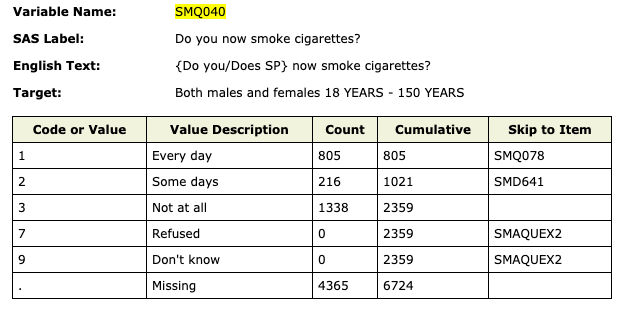

In [13]:
NHANES_combined.SmokeNow = NHANES_combined.SmokeNow.fillna(9)
NHANES_combined.SmokeNow.value_counts()

9.0    2021
3.0    1039
1.0     497
2.0     119
Name: SmokeNow, dtype: int64

<h1 align="center"><font size=6> I'd also like to change the SmokeNow to a categorical rather than a float type</h1></font>

In [14]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   BirthCountry              3676 non-null   int64  
 4   HouseholdSize             3676 non-null   int64  
 5   FamilySize                3676 non-null   int64  
 6   AnnualHouseIncome         3483 non-null   float64
 7   AnnualFamilyIncome        3495 non-null   float64
 8   RatioFamilyIncomePoverty  3181 non-null   float64
 9   Albumin_g/L               3443 non-null   float64
 10  Bicarb_mmol/L             3442 non-null   float64
 11  BUN_mmol/L                3442 non-null   float64
 12  Chloride_mmol/L           3443 non-null   float64
 13  Creatinine_umol/L         3442 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> I'd also like to look at the "RatioFamilyIncomePoverty" column now since it has the most missing values now.</h1></font>

In [15]:
NHANES_combined.RatioFamilyIncomePoverty.value_counts()

5.000000e+00    602
5.400000e-79     26
1.220000e+00     26
1.520000e+00     24
3.080000e+00     22
               ... 
3.280000e+00      1
4.580000e+00      1
3.700000e+00      1
4.130000e+00      1
4.850000e+00      1
Name: RatioFamilyIncomePoverty, Length: 404, dtype: int64

<h1 align="center"><font size=4> There are quite a few values. Here, I will fill the missing values with the most frequent value which is 5.0</h1><font>

In [16]:
NHANES_combined.RatioFamilyIncomePoverty = NHANES_combined.RatioFamilyIncomePoverty.fillna(5.0)
NHANES_combined.RatioFamilyIncomePoverty.value_counts()

5.000000e+00    1097
5.400000e-79      26
1.220000e+00      26
1.520000e+00      24
3.080000e+00      22
                ... 
3.280000e+00       1
4.580000e+00       1
3.700000e+00       1
4.130000e+00       1
4.850000e+00       1
Name: RatioFamilyIncomePoverty, Length: 404, dtype: int64

In [17]:
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3676 non-null   int64  
 1   Gender                    3676 non-null   int64  
 2   Age_years                 3676 non-null   float64
 3   BirthCountry              3676 non-null   int64  
 4   HouseholdSize             3676 non-null   int64  
 5   FamilySize                3676 non-null   int64  
 6   AnnualHouseIncome         3483 non-null   float64
 7   AnnualFamilyIncome        3495 non-null   float64
 8   RatioFamilyIncomePoverty  3676 non-null   float64
 9   Albumin_g/L               3443 non-null   float64
 10  Bicarb_mmol/L             3442 non-null   float64
 11  BUN_mmol/L                3442 non-null   float64
 12  Chloride_mmol/L           3443 non-null   float64
 13  Creatinine_umol/L         3442 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> It looks like there are 3,440 records for the feature with the most null values now (i.e. Potassium). This is plenty for this project. So, I'll now delete all records with null values in any column and see what we're left with.</h1></font>

In [18]:
NHANES_combined = NHANES_combined.dropna()
NHANES_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 3675
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2770 non-null   int64  
 1   Gender                    2770 non-null   int64  
 2   Age_years                 2770 non-null   float64
 3   BirthCountry              2770 non-null   int64  
 4   HouseholdSize             2770 non-null   int64  
 5   FamilySize                2770 non-null   int64  
 6   AnnualHouseIncome         2770 non-null   float64
 7   AnnualFamilyIncome        2770 non-null   float64
 8   RatioFamilyIncomePoverty  2770 non-null   float64
 9   Albumin_g/L               2770 non-null   float64
 10  Bicarb_mmol/L             2770 non-null   float64
 11  BUN_mmol/L                2770 non-null   float64
 12  Chloride_mmol/L           2770 non-null   float64
 13  Creatinine_umol/L         2770 non-null   float64
 14  Globulin

<h1 align="center"><font size=4> I now have 2,770 records for each feature with no null values. I lost a bit more than I wanted but this is still a large enough sample for this preliminary project to get estimates of baseline heavy metals in humans in the USA from 2017-2018. </h1></font>

<h1 align="center"><font size=4> I'll do some exploratory data visualizations now.</h1></font>

<h1 align="center"><font size=4> I'll fist comapre each metal vs. age and vs. gender<br>
    1. scatterplots<br>
    2. boxplots
    </h1></font>

In [19]:
NHANES_combined.head(10)

,ID,Gender,Age_years,BirthCountry,HouseholdSize,FamilySize,AnnualHouseIncome,AnnualFamilyIncome,RatioFamilyIncomePoverty,Albumin_g/L,...,BloodMercury_ug/L,BloodMercury_nmol/L,BloodSelenium_ug/L,BloodSelenium_umol/L,BloodMang_ug/L,BloodMang_nmol/L,PesticideUseHome,PesticideUsedWeeds,SmokeNow,EverUsedEcig
0,93705,2,66.0,1,1,1,3.0,3.0,0.82,44.0,...,1.07,5.34,185.71,2.36,8.57,155.99,2.0,2.0,3.0,2.0
1,93708,2,66.0,2,2,2,6.0,6.0,1.63,39.0,...,15.23,76.00,178.79,2.27,15.09,274.67,2.0,2.0,9.0,2.0
3,93711,1,56.0,2,3,3,15.0,15.0,5.00,40.0,...,0.20,1.00,206.39,2.62,6.55,119.22,2.0,2.0,9.0,2.0
4,93713,1,67.0,1,1,1,6.0,6.0,2.65,43.0,...,0.20,1.00,215.84,2.74,9.67,176.01,2.0,2.0,1.0,2.0
5,93714,2,54.0,1,3,3,7.0,7.0,1.86,34.0,...,1.24,6.19,211.76,2.69,7.85,142.89,1.0,2.0,3.0,2.0
6,93715,1,71.0,1,5,5,8.0,8.0,1.56,42.0,...,2.13,10.63,186.39,2.37,8.50,154.72,2.0,1.0,1.0,1.0
7,93716,1,61.0,2,3,3,15.0,15.0,5.00,41.0,...,4.41,22.01,203.73,2.59,8.80,160.18,2.0,2.0,3.0,2.0
8,93718,1,45.0,1,7,7,10.0,10.0,1.18,42.0,...,2.28,11.38,203.67,2.59,12.00,218.42,2.0,2.0,9.0,2.0
9,93721,2,60.0,2,2,2,8.0,8.0,3.04,41.0,...,0.73,3.64,187.95,2.39,9.92,180.56,2.0,2.0,9.0,2.0
10,93722,2,60.0,2,1,1,6.0,6.0,2.07,41.0,...,0.48,2.40,199.80,2.54,15.05,273.94,2.0,2.0,9.0,2.0


<h1 align="center"><font color="purple" size=4>I'll now add labels to the categorical features and take care of a few other cleaning items</h1></font>

In [20]:
#Remove the ID column
NHANES_combined = NHANES_combined.drop("ID", axis=1)
#Add labels to the Gender column
NHANES_combined['Gender'] = NHANES_combined['Gender'].replace(1, "Male")
NHANES_combined['Gender'] = NHANES_combined['Gender'].replace(2, "Female")
#Change Age_years to an integer
NHANES_combined['Age_years'] = NHANES_combined['Age_years'].astype(int)
#Birth Country
NHANES_combined['BirthCountry'] = NHANES_combined['BirthCountry'].replace(1, "USA")
NHANES_combined['BirthCountry'] = NHANES_combined['BirthCountry'].replace(2, "Other")
NHANES_combined['BirthCountry'] = NHANES_combined['BirthCountry'].replace(77, "Refused")
NHANES_combined['BirthCountry'] = NHANES_combined['BirthCountry'].replace(99, "Don't know")
#Change Income Features to int
NHANES_combined['AnnualFamilyIncome'] = NHANES_combined['AnnualFamilyIncome'].astype(int)
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualFamilyIncome'].astype(int)
#PesticideUseHome
NHANES_combined['PesticideUseHome'] = NHANES_combined['PesticideUseHome'].replace(1, "Yes")
NHANES_combined['PesticideUseHome'] = NHANES_combined['PesticideUseHome'].replace(2, "No")
NHANES_combined['PesticideUseHome'] = NHANES_combined['PesticideUseHome'].replace(7, "Refused")
NHANES_combined['PesticideUseHome'] = NHANES_combined['PesticideUseHome'].replace(9, "Don't know")
#PesticideUsedWeeds
NHANES_combined['PesticideUsedWeeds'] = NHANES_combined['PesticideUsedWeeds'].replace(1, "Yes")
NHANES_combined['PesticideUsedWeeds'] = NHANES_combined['PesticideUsedWeeds'].replace(2, "No")
NHANES_combined['PesticideUsedWeeds'] = NHANES_combined['PesticideUsedWeeds'].replace(7, "Refused")
NHANES_combined['PesticideUsedWeeds'] = NHANES_combined['PesticideUsedWeeds'].replace(9, "Don't know")
#Are you currently a smoker?
NHANES_combined["SmokeNow"] = NHANES_combined["SmokeNow"].replace(1, "Every Day")
NHANES_combined["SmokeNow"] = NHANES_combined["SmokeNow"].replace(2, "Some Days")
NHANES_combined["SmokeNow"] = NHANES_combined["SmokeNow"].replace(3, "Not At All")
NHANES_combined["SmokeNow"] = NHANES_combined["SmokeNow"].replace(9, "Don't Know")
#Have you ever used an E-cig?
NHANES_combined['EverUsedEcig'] = NHANES_combined['EverUsedEcig'].replace(1, "Yes")
NHANES_combined['EverUsedEcig'] = NHANES_combined['EverUsedEcig'].replace(2, "No")
NHANES_combined['EverUsedEcig'] = NHANES_combined['EverUsedEcig'].replace(9, "Don't Know/Missing")
#General Health Condition
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(1, "Excellent")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(2, "Very Good")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(3, "Good")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(4, "Fair")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(5, "Poor")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(7, "Refused")
NHANES_combined['GeneralHealthCondition'] = NHANES_combined['GeneralHealthCondition'].replace(9, "Don't Know")
#Annual Household Income
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(1, "$0-$4,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(2, "$5,000-$9,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(3, "$10,000-$14,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(4, "$15,000-$19,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(5, "$20,000-$24,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(6, "$25,000-$34,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(7, "$35,000-$44,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(8, "$45,000-$54,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(9, "$55,000-$64,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(10, "$65,000-$74,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(12, "$20,000 and over")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(13, "under $20,000")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(14, "$75,000-$99,999")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(15, "$100,000 and over")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(77, "Refused")
NHANES_combined['AnnualHouseIncome'] = NHANES_combined['AnnualHouseIncome'].replace(99, "Don't know")
#Drop the Annual Family Income
NHANES_combined = NHANES_combined.drop("AnnualFamilyIncome", axis=1)
#Health now compared with 1 year ago?
NHANES_combined['HealthComparedto1year'] = NHANES_combined['HealthComparedto1year'].replace(1, "Better")
NHANES_combined['HealthComparedto1year'] = NHANES_combined['HealthComparedto1year'].replace(2, "Worse")
NHANES_combined['HealthComparedto1year'] = NHANES_combined['HealthComparedto1year'].replace(3, "Same")
NHANES_combined['HealthComparedto1year'] = NHANES_combined['HealthComparedto1year'].replace(7, "Refused")
NHANES_combined['HealthComparedto1year'] = NHANES_combined['HealthComparedto1year'].replace(9, "Don't Know")
# Type place most often go for healthcare
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(1, "Clinic or Health Center")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(2, "Doctor's Office or HMO")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(3, "Hospital Emergency Room")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(4, "Hospital Outpatient")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(5, "Some Other Place")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(6, "Doesn't Go 1 Place Most Often")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(77, "Refused")
NHANES_combined['MostOftenHealthcarePlace'] = NHANES_combined['MostOftenHealthcarePlace'].replace(99, "Don't Know")
#Times received healthcare over past year
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(0, "None")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(1, "1")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(2, "2-3")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(3, "4-5")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(4, "6-7")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(5, "8-9")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(6, "10-12")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(7, "13-15")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(8, "16 or more")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(77, "Refused")
NHANES_combined['ReceiveHealthPastYear'] = NHANES_combined['ReceiveHealthPastYear'].replace(99, "Don't Know")




NHANES_checkpoint = NHANES_combined # for later use further down the notebook where I make a "total metal " column
NHANES_combined.head(10)


,Gender,Age_years,BirthCountry,HouseholdSize,FamilySize,AnnualHouseIncome,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,...,BloodMercury_ug/L,BloodMercury_nmol/L,BloodSelenium_ug/L,BloodSelenium_umol/L,BloodMang_ug/L,BloodMang_nmol/L,PesticideUseHome,PesticideUsedWeeds,SmokeNow,EverUsedEcig
0,Female,66,USA,1,1,"$10,000-$14,999",0.82,44.0,31.0,3.93,...,1.07,5.34,185.71,2.36,8.57,155.99,No,No,Not At All,No
1,Female,66,Other,2,2,"$25,000-$34,999",1.63,39.0,27.0,5.71,...,15.23,76.00,178.79,2.27,15.09,274.67,No,No,Don't Know,No
3,Male,56,Other,3,3,"$100,000 and over",5.00,40.0,29.0,5.00,...,0.20,1.00,206.39,2.62,6.55,119.22,No,No,Don't Know,No
4,Male,67,USA,1,1,"$25,000-$34,999",2.65,43.0,25.0,7.85,...,0.20,1.00,215.84,2.74,9.67,176.01,No,No,Every Day,No
5,Female,54,USA,3,3,"$35,000-$44,999",1.86,34.0,32.0,3.93,...,1.24,6.19,211.76,2.69,7.85,142.89,Yes,No,Not At All,No
6,Male,71,USA,5,5,"$45,000-$54,999",1.56,42.0,25.0,5.71,...,2.13,10.63,186.39,2.37,8.50,154.72,No,Yes,Every Day,Yes
7,Male,61,Other,3,3,"$100,000 and over",5.00,41.0,24.0,6.43,...,4.41,22.01,203.73,2.59,8.80,160.18,No,No,Not At All,No
8,Male,45,USA,7,7,"$65,000-$74,999",1.18,42.0,27.0,5.00,...,2.28,11.38,203.67,2.59,12.00,218.42,No,No,Don't Know,No
9,Female,60,Other,2,2,"$45,000-$54,999",3.04,41.0,24.0,5.71,...,0.73,3.64,187.95,2.39,9.92,180.56,No,No,Don't Know,No
10,Female,60,Other,1,1,"$25,000-$34,999",2.07,41.0,28.0,6.07,...,0.48,2.40,199.80,2.54,15.05,273.94,No,No,Don't Know,No


In [21]:
NHANES_combined.columns

Index(['Gender', 'Age_years', 'BirthCountry', 'HouseholdSize', 'FamilySize',
       'AnnualHouseIncome', 'RatioFamilyIncomePoverty', 'Albumin_g/L',
       'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L', 'Creatinine_umol/L',
       'Globulin_g/L', 'Glu_mg/dL', 'Glu_mmol/L', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Chromium_nmol/L', 'Cobalt_ug/L',
       'Cobalt_nmol/L', 'GeneralHealthCondition', 'HealthComparedto1year',
       'MostOftenHealthcarePlace', 'ReceiveHealthPastYear', 'BloodLead_ug/dL',
       'BloodLead_umol/L', 'BloodCadmium_ug/L', 'BloodCadmium_nmol/L',
       'BloodMercury_ug/L', 'BloodMercury_nmol/L', 'BloodSelenium_ug/L',
       'BloodSelenium_umol/L', 'BloodMang_ug/L', 'BloodMang_nmol/L',
       'PesticideUseHome', 'PesticideUsedWeeds', 'SmokeNow', 'EverUsedEcig'],
      dtype='object')

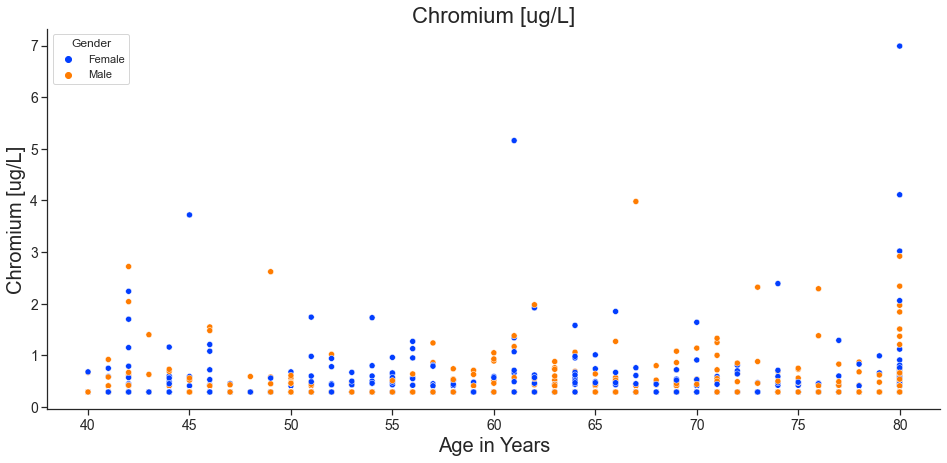

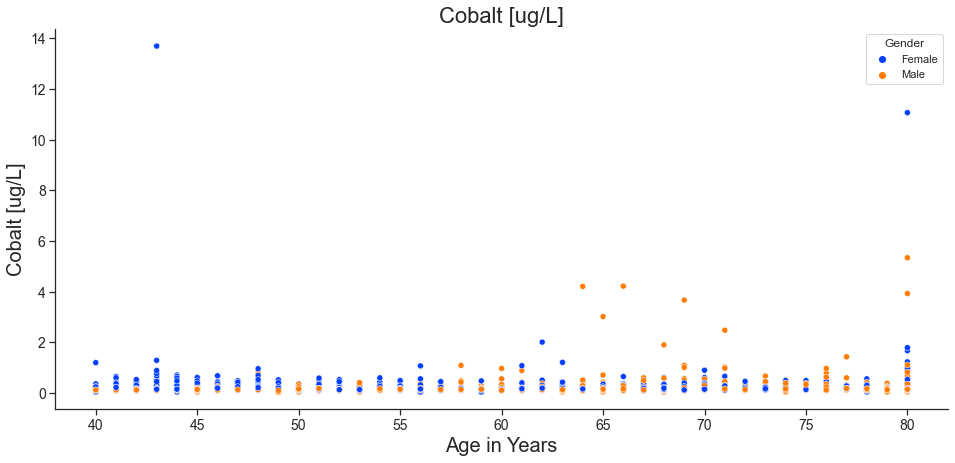

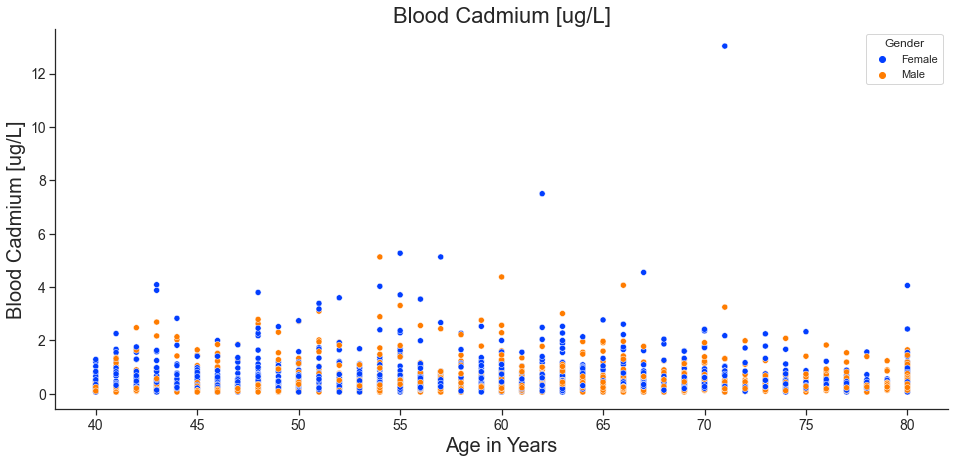

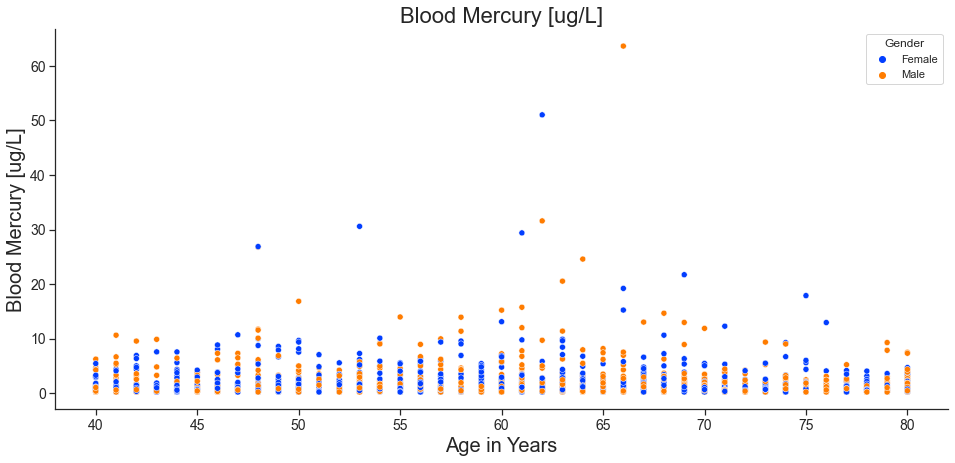

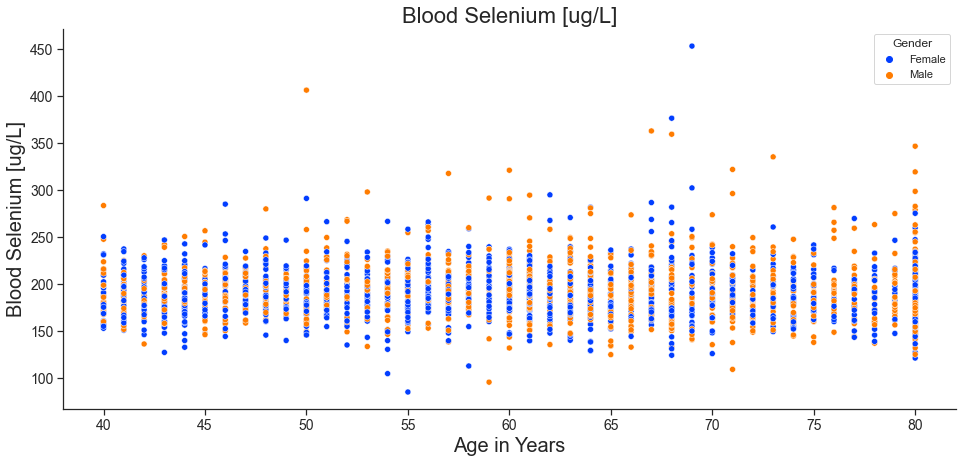

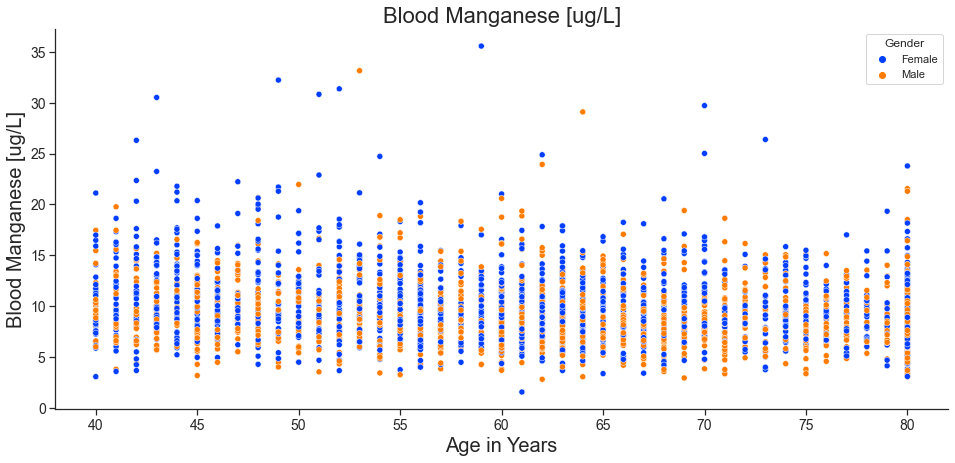

In [22]:
metals = [NHANES_combined["Chromium_ug/L"],NHANES_combined["Cobalt_ug/L"],NHANES_combined["BloodCadmium_ug/L"]
          ,NHANES_combined["BloodMercury_ug/L"],NHANES_combined["BloodSelenium_ug/L"],NHANES_combined["BloodMang_ug/L"]]
names = ["Chromium [ug/L]", "Cobalt [ug/L]","Blood Cadmium [ug/L]","Blood Mercury [ug/L]",
         "Blood Selenium [ug/L]","Blood Manganese [ug/L]","Chromium [ug/L]"]
 
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.scatterplot("Age_years", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Age in Years", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    sns.despine()
    plt.show()

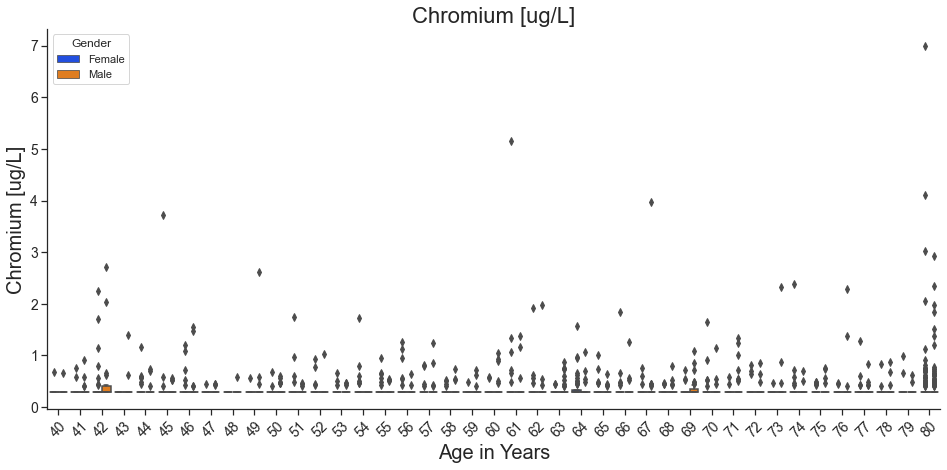

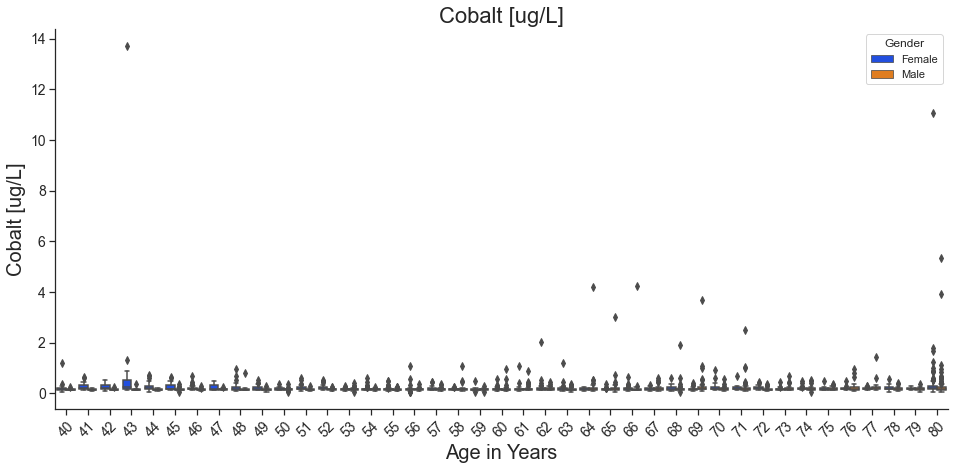

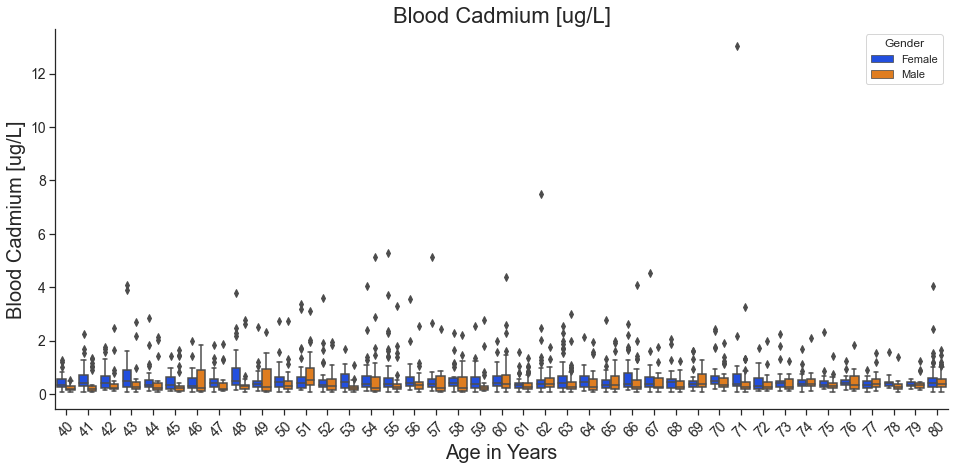

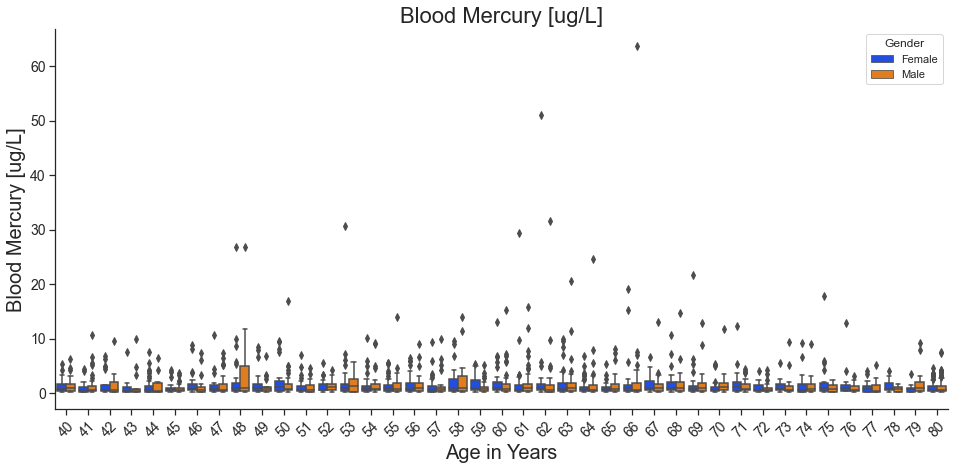

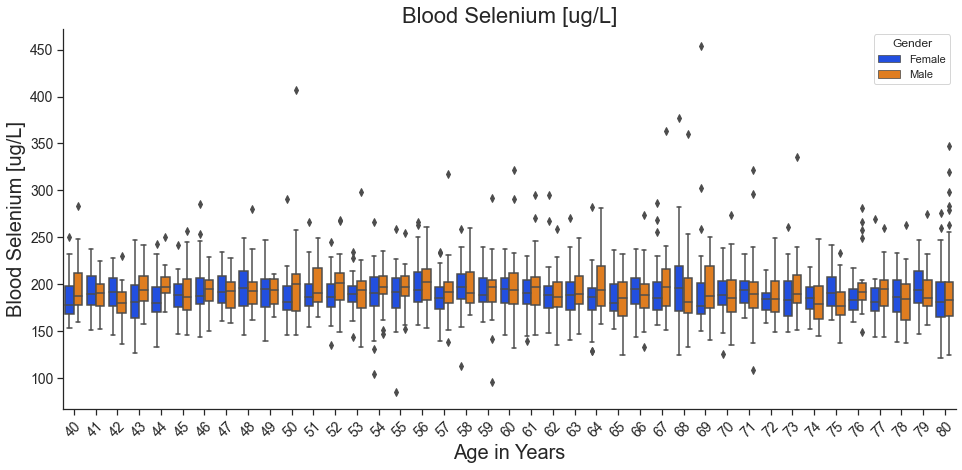

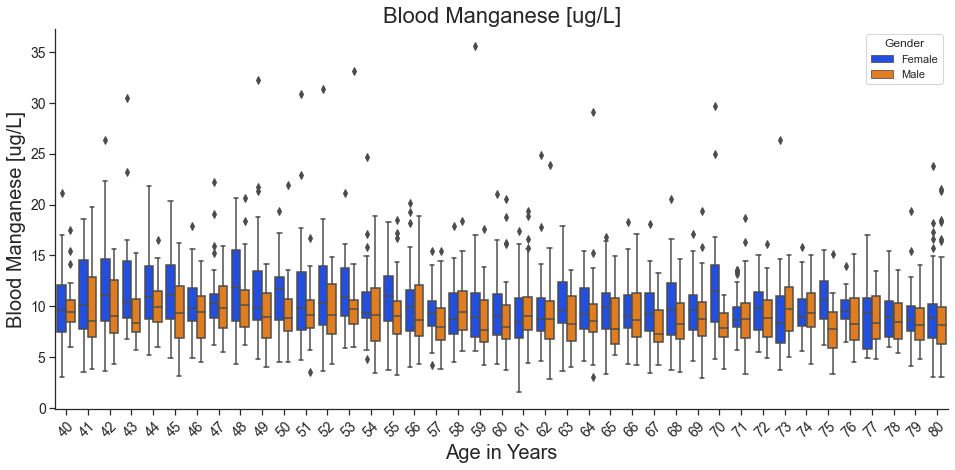

In [23]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("Age_years", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Age in Years", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

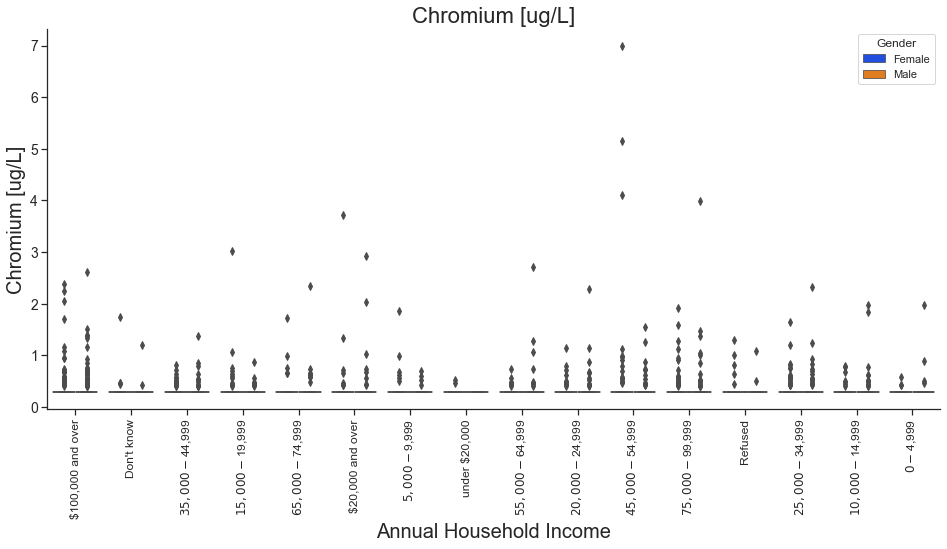

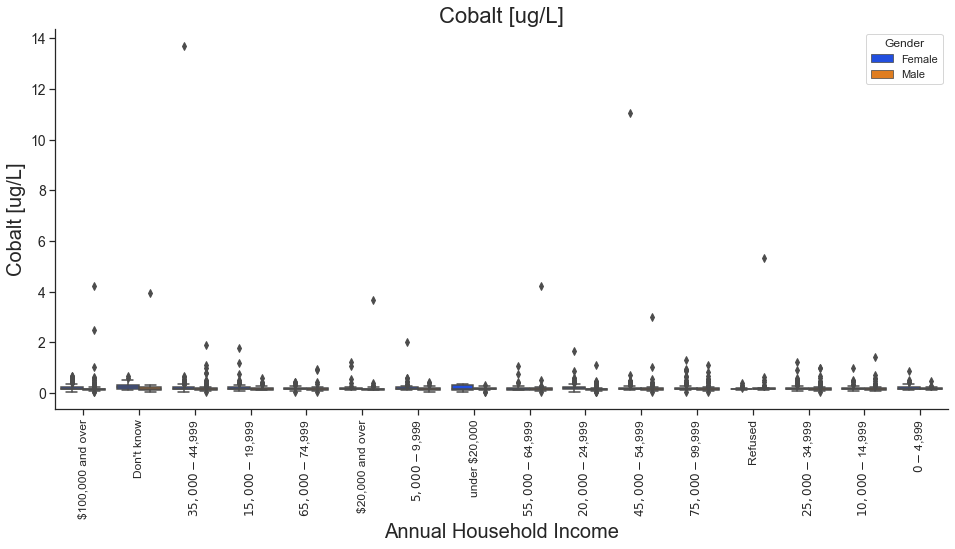

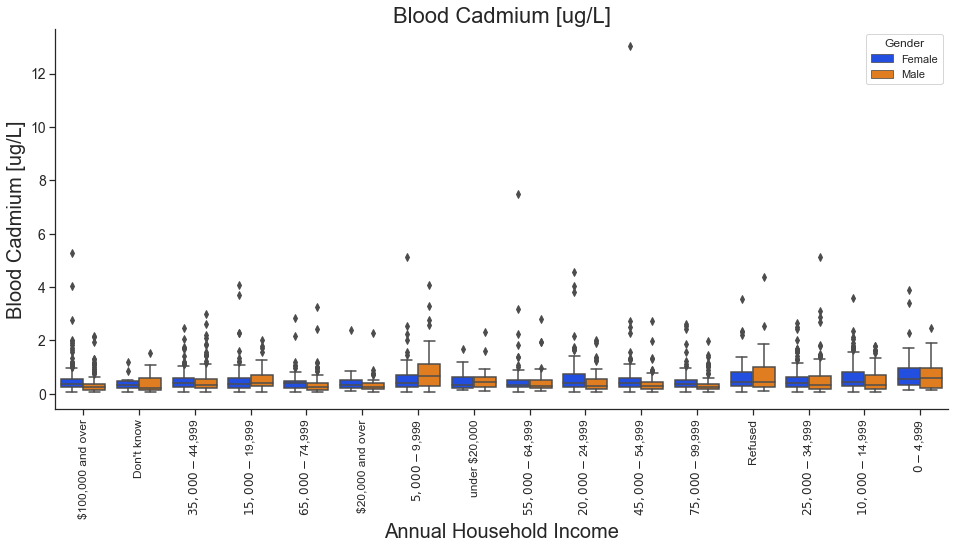

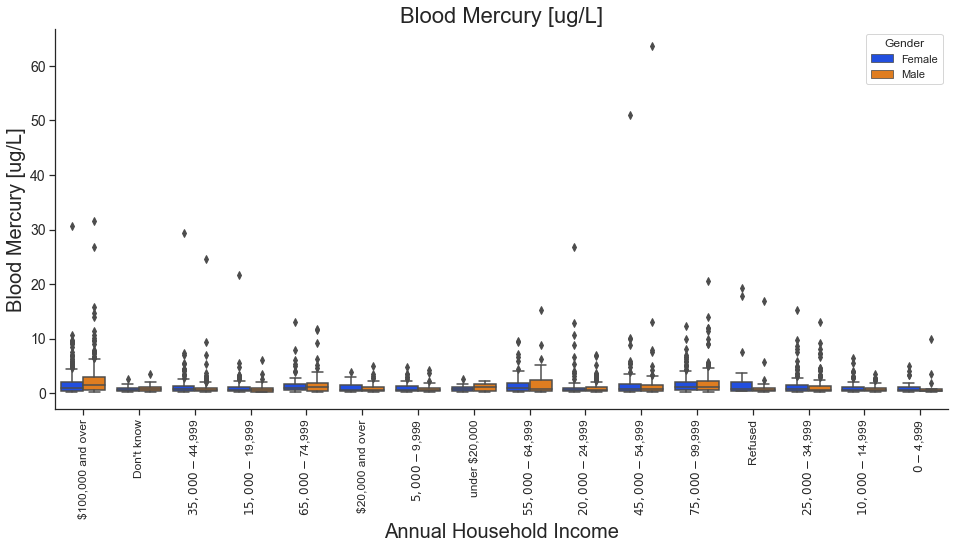

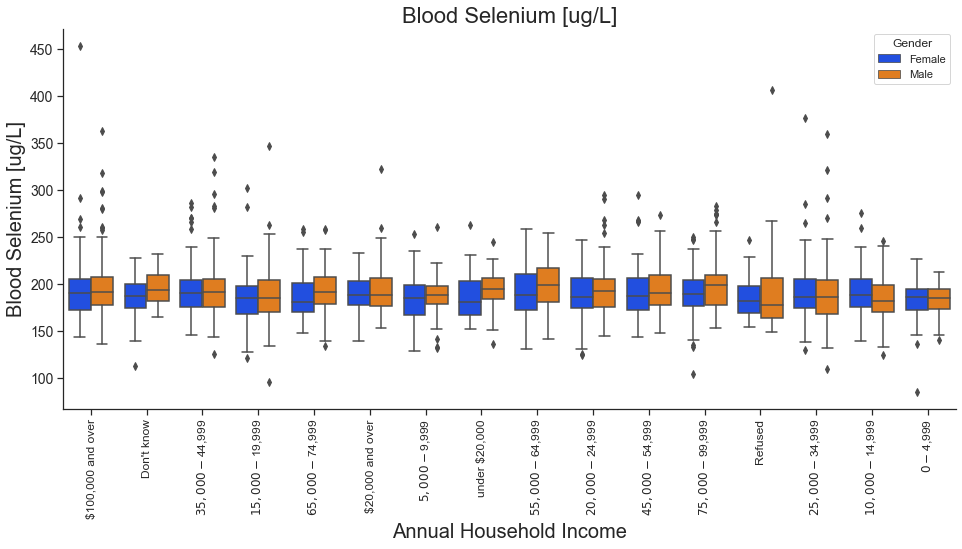

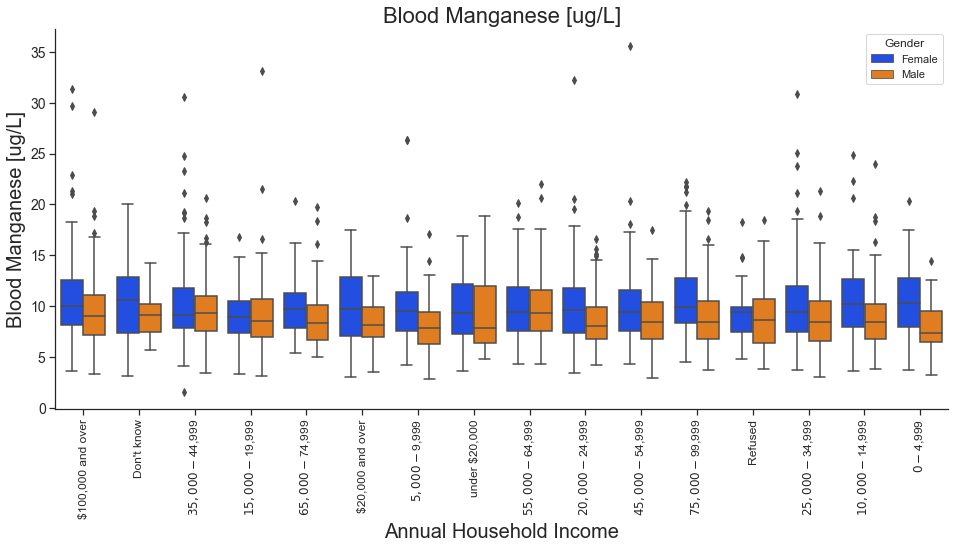

In [24]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("AnnualHouseIncome", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Annual Household Income", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=90, fontsize=12)
    sns.despine()
    plt.show()

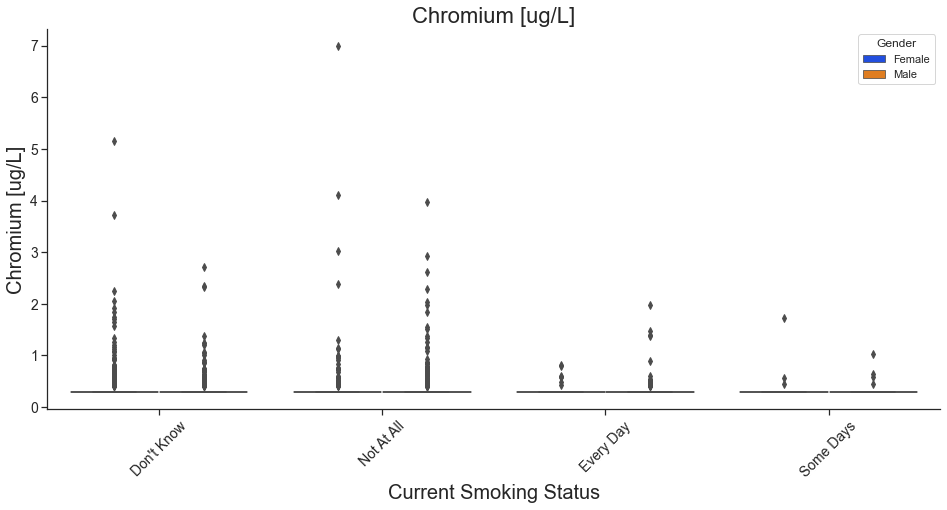

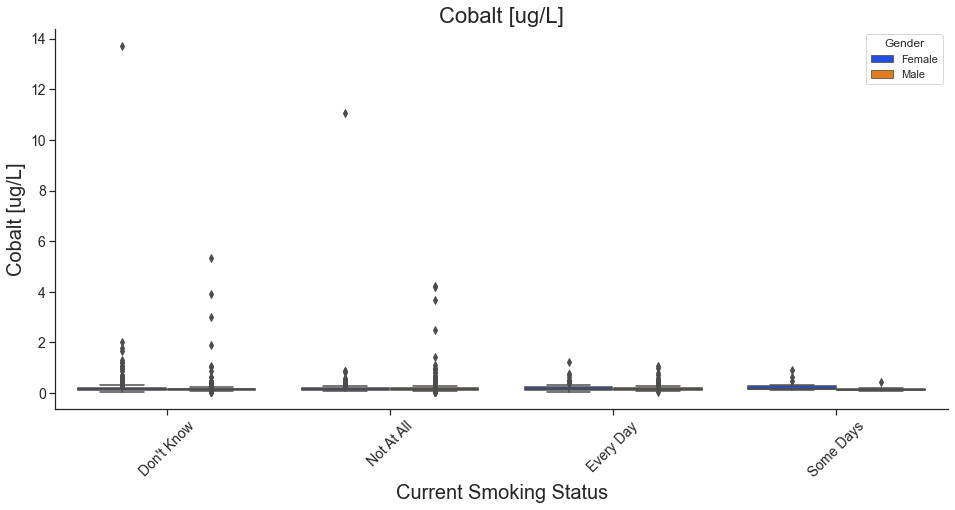

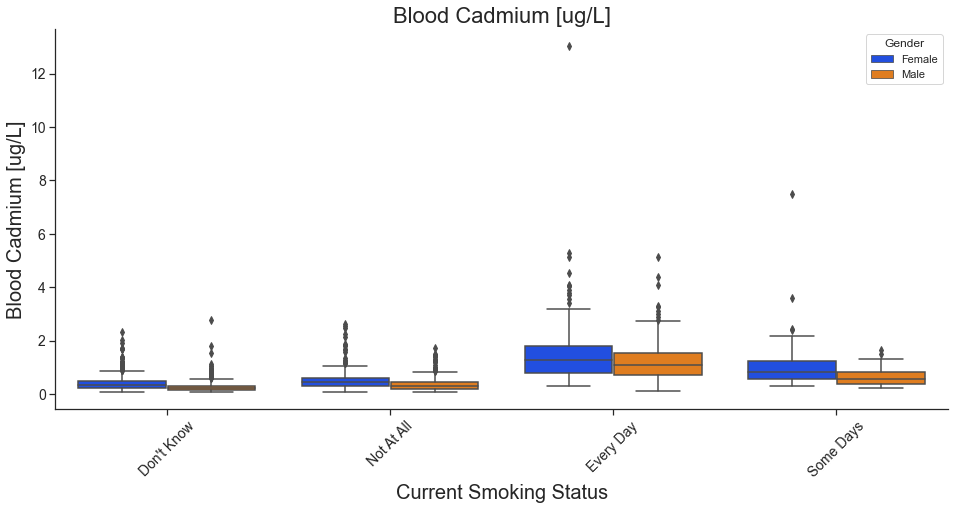

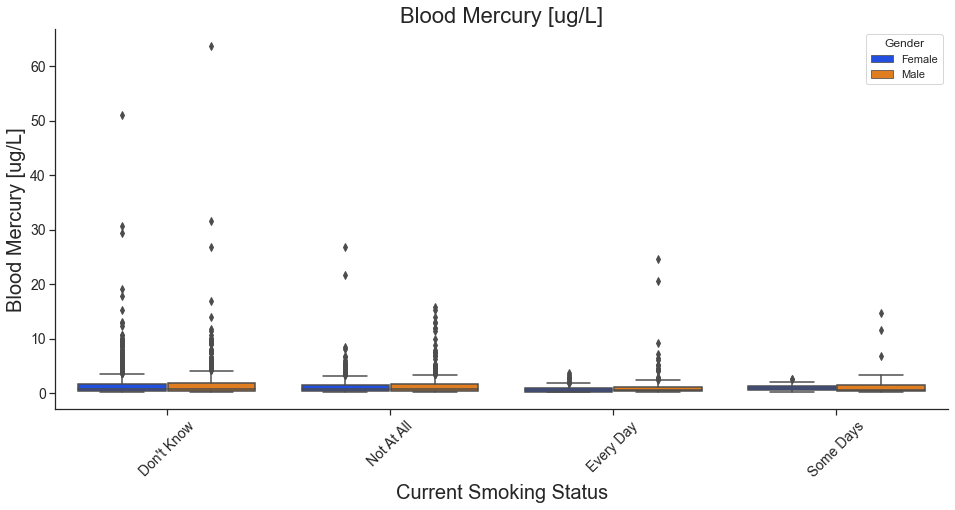

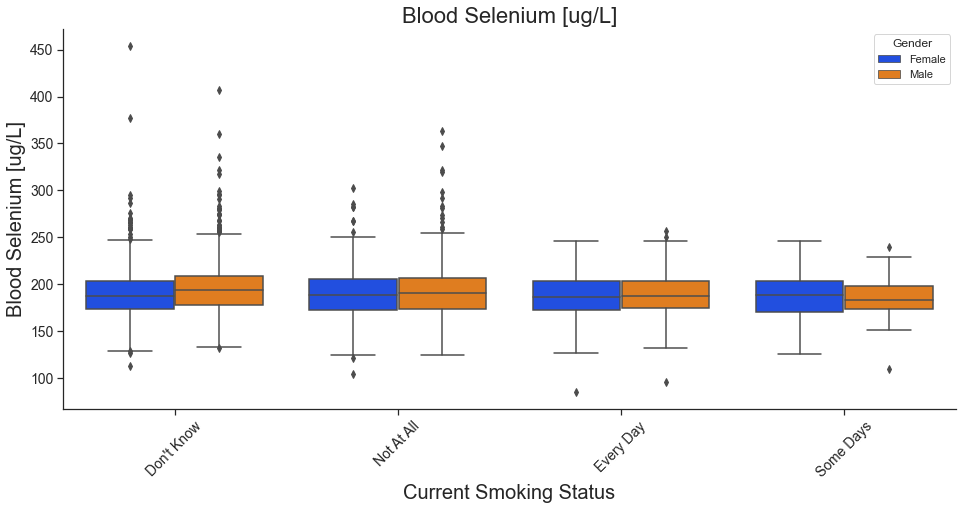

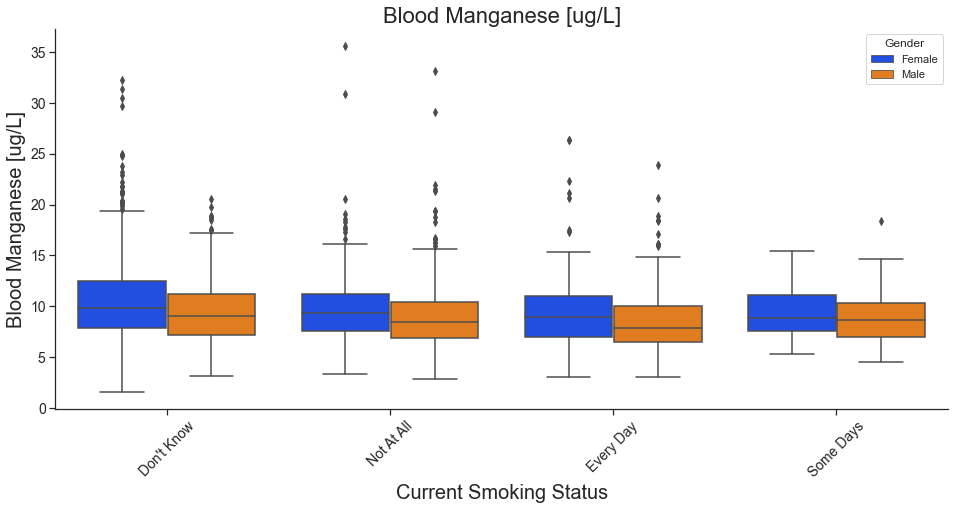

In [25]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("SmokeNow", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Current Smoking Status", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

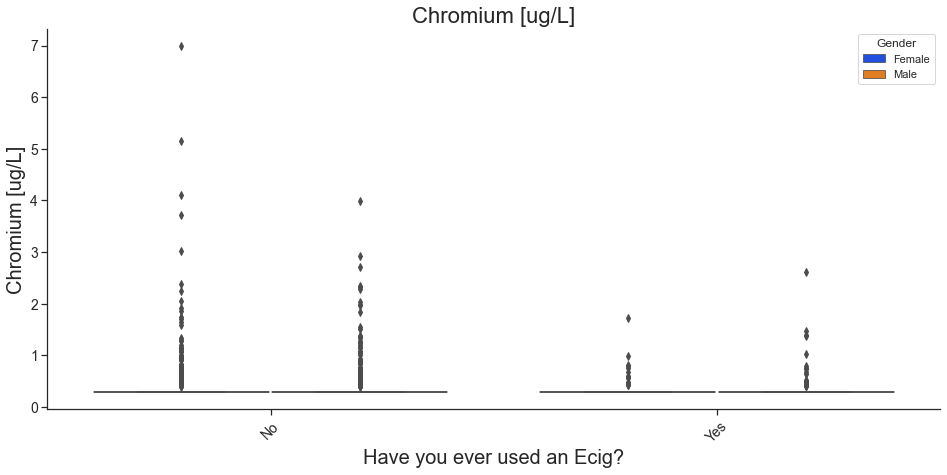

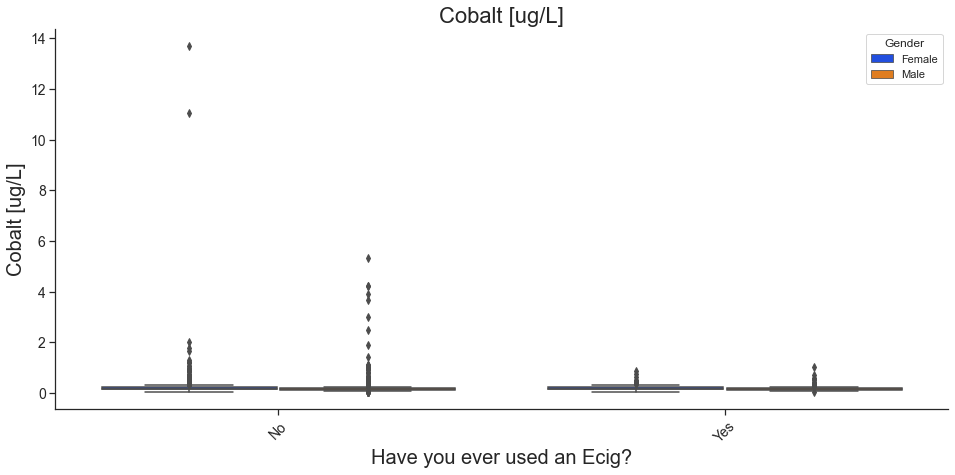

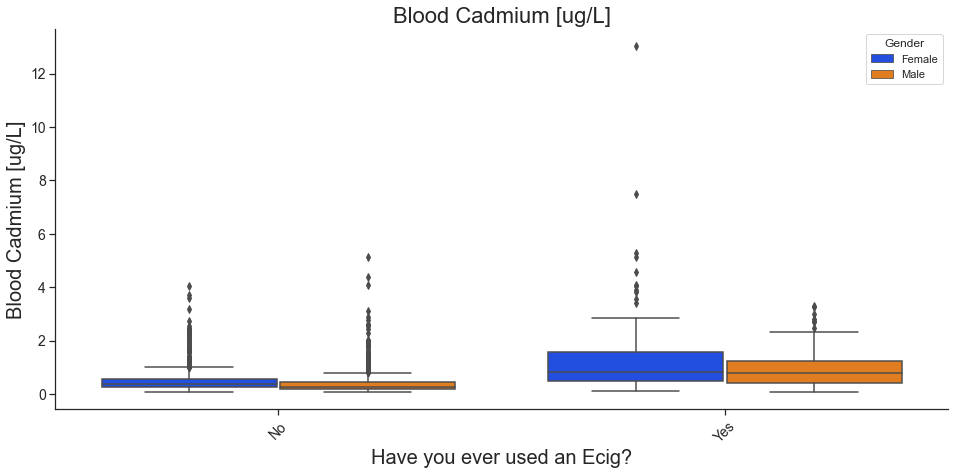

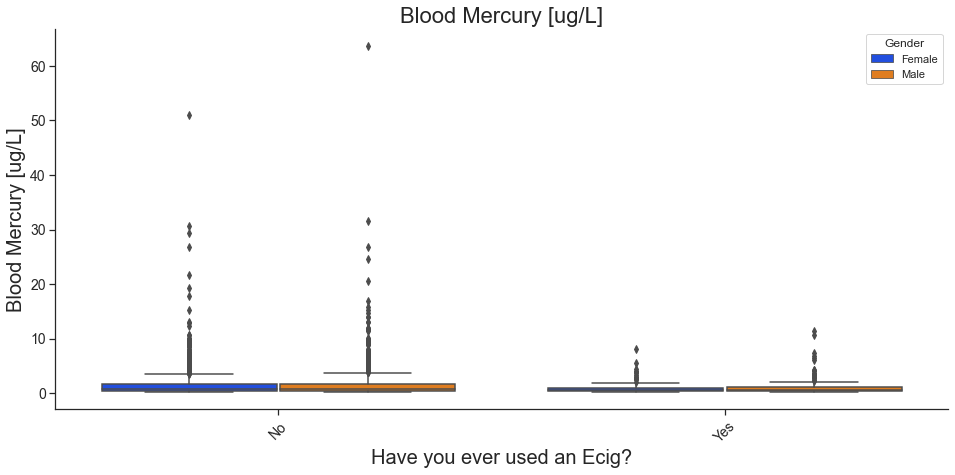

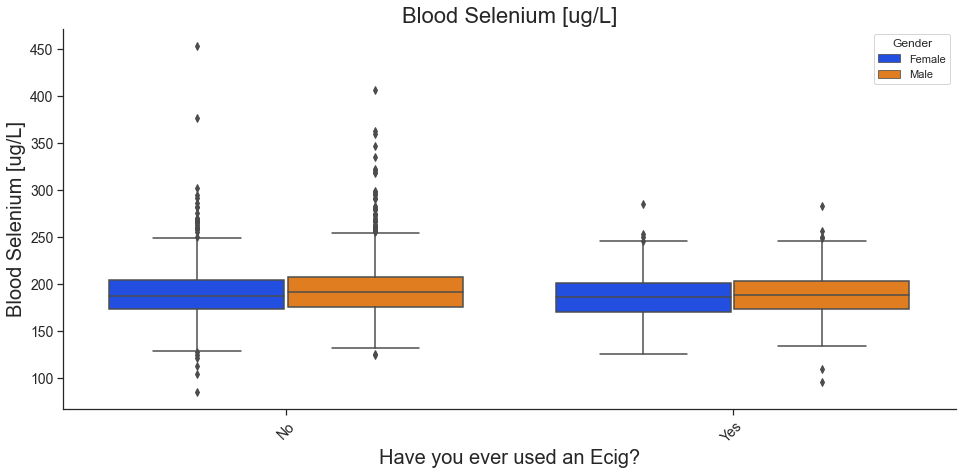

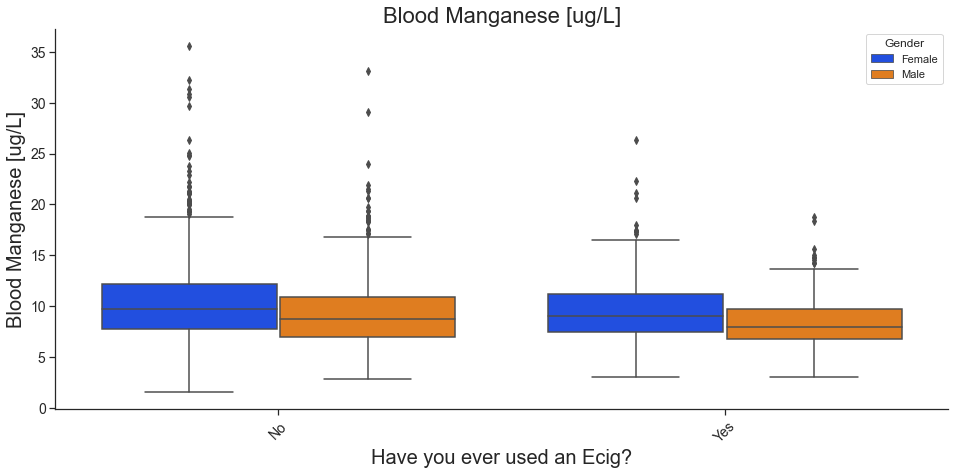

In [26]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("EverUsedEcig", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Have you ever used an Ecig?", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

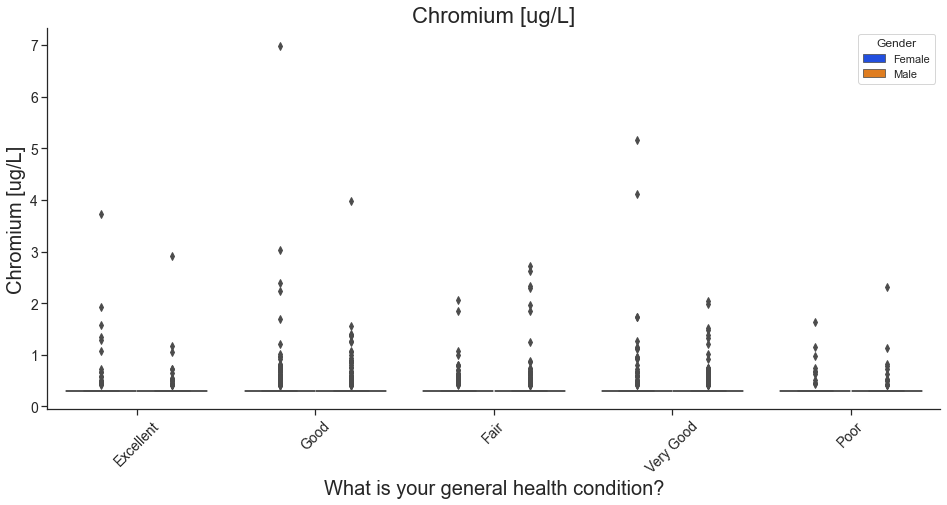

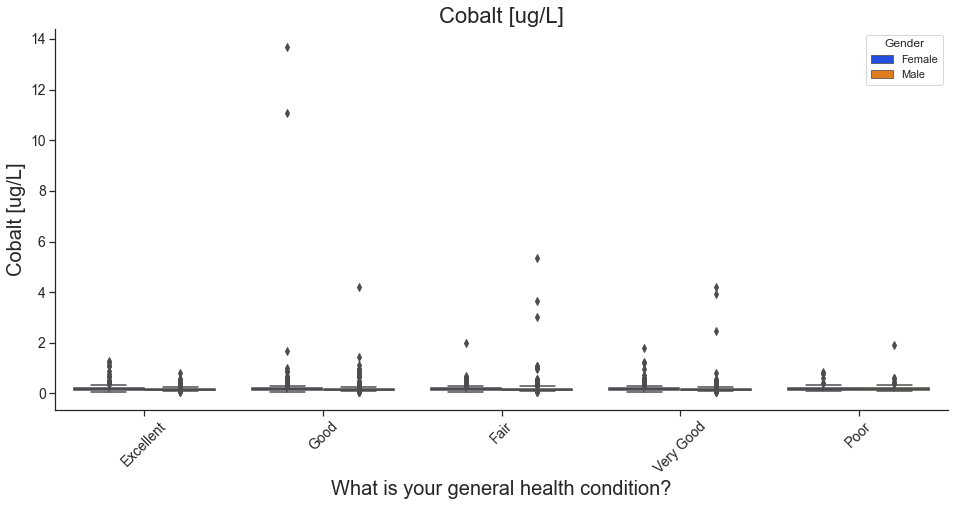

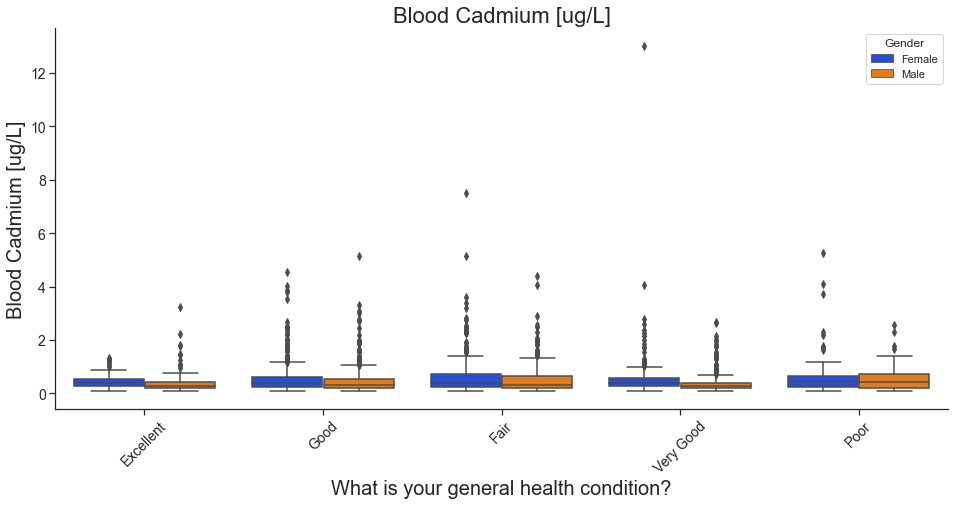

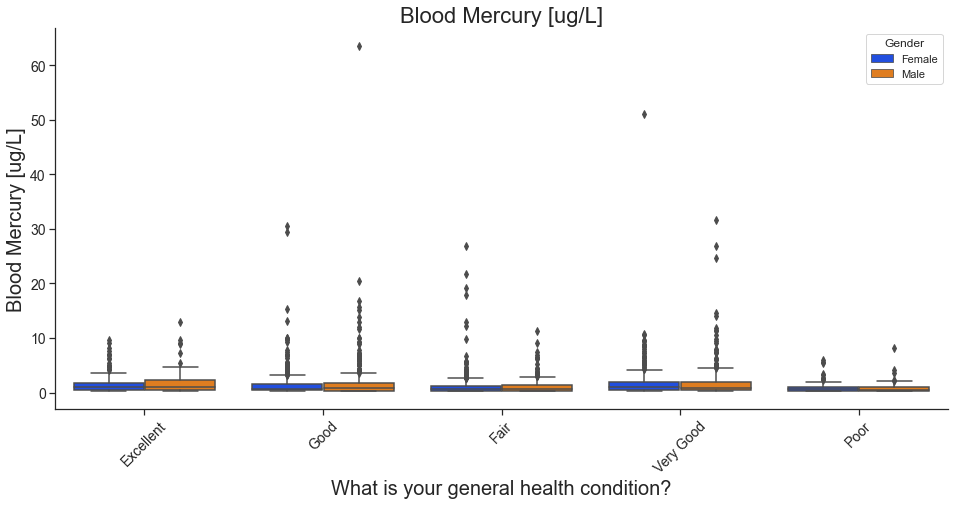

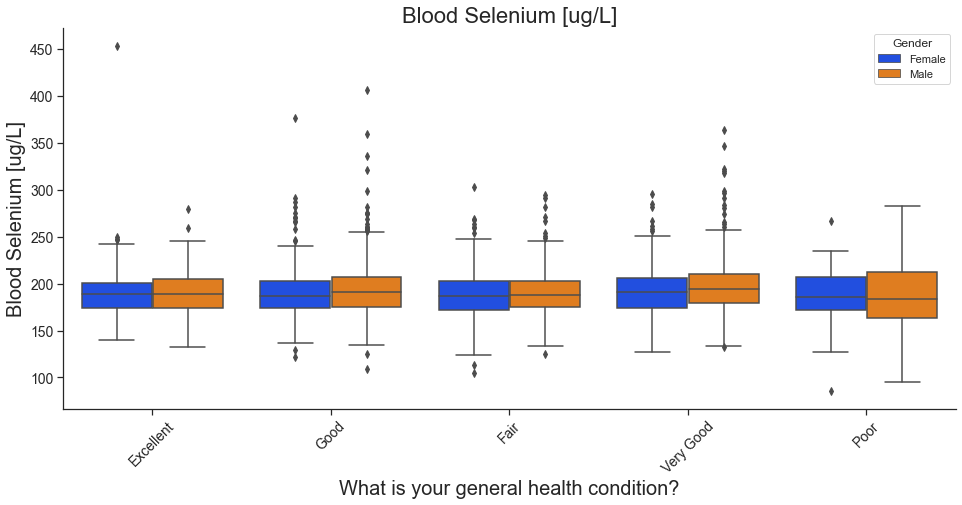

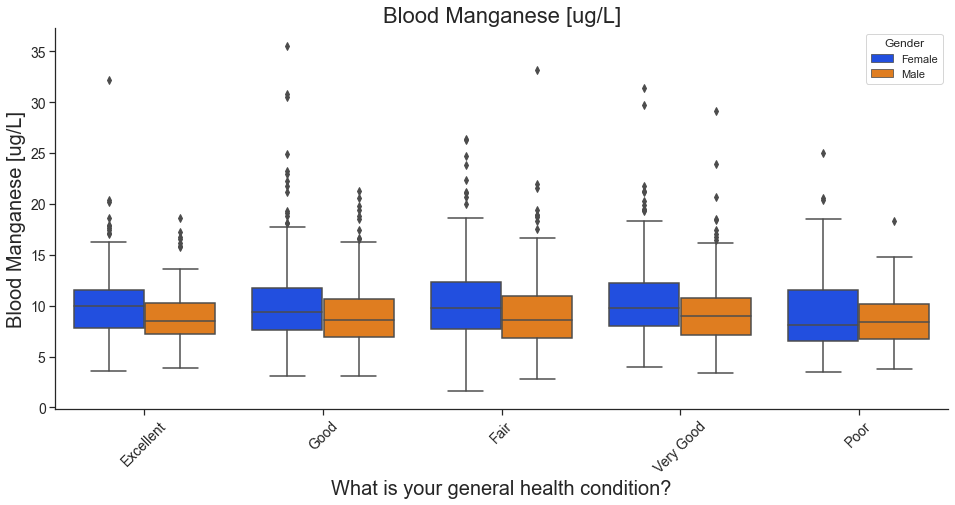

In [27]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("GeneralHealthCondition", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("What is your general health condition?", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

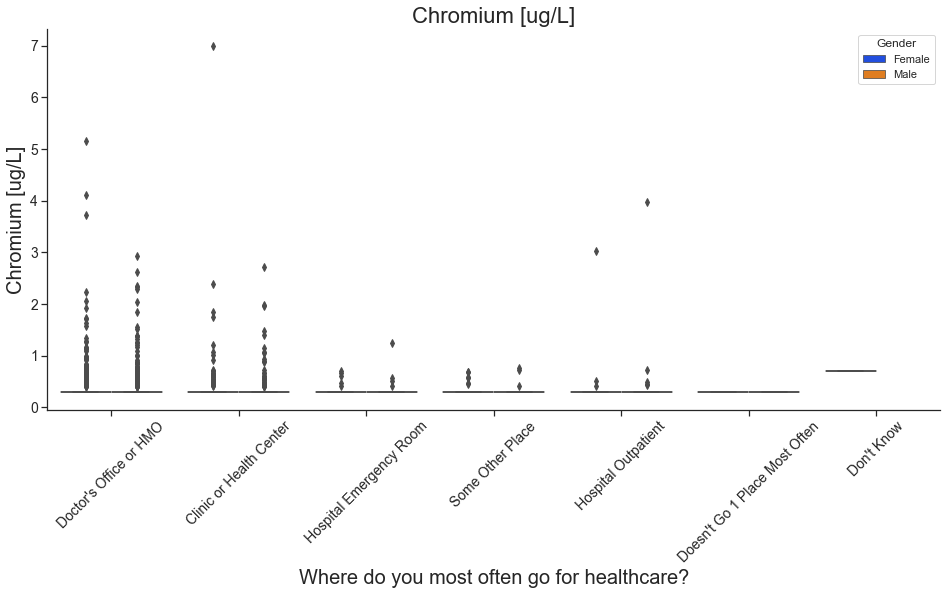

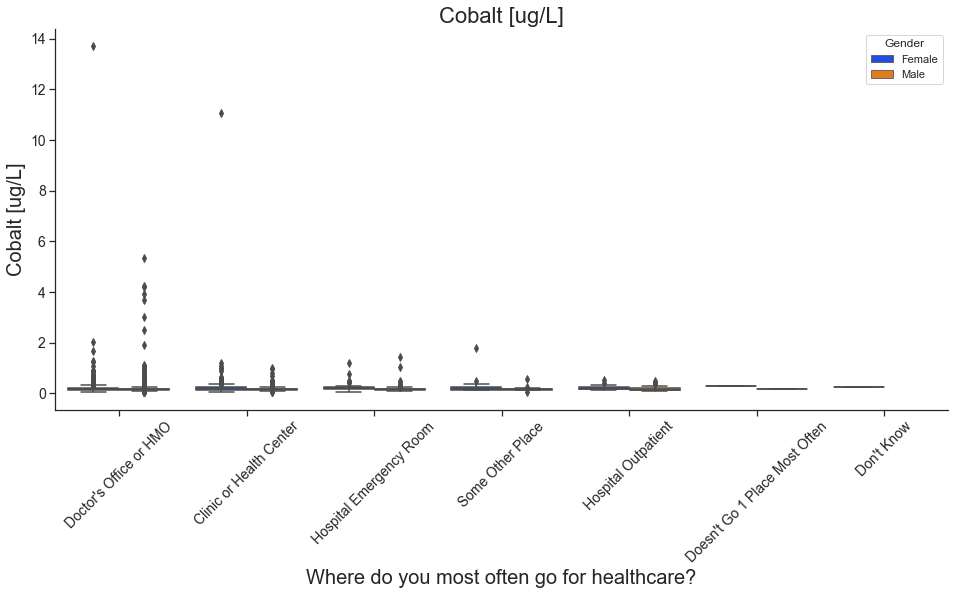

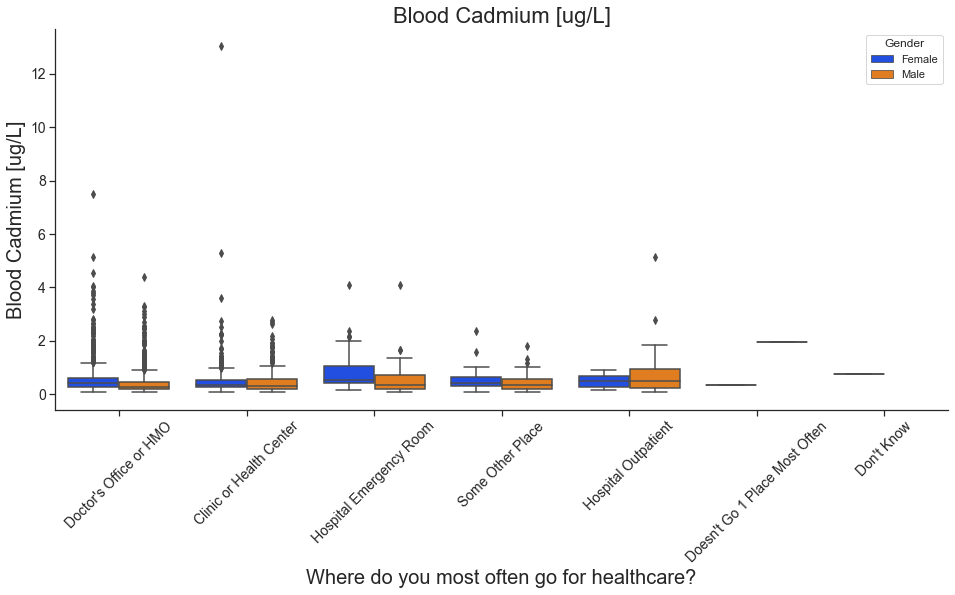

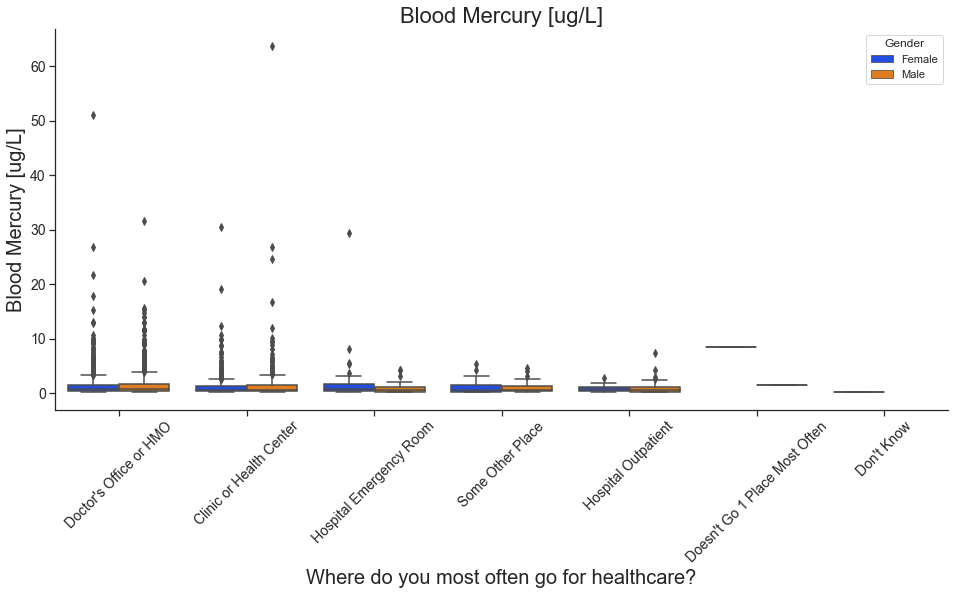

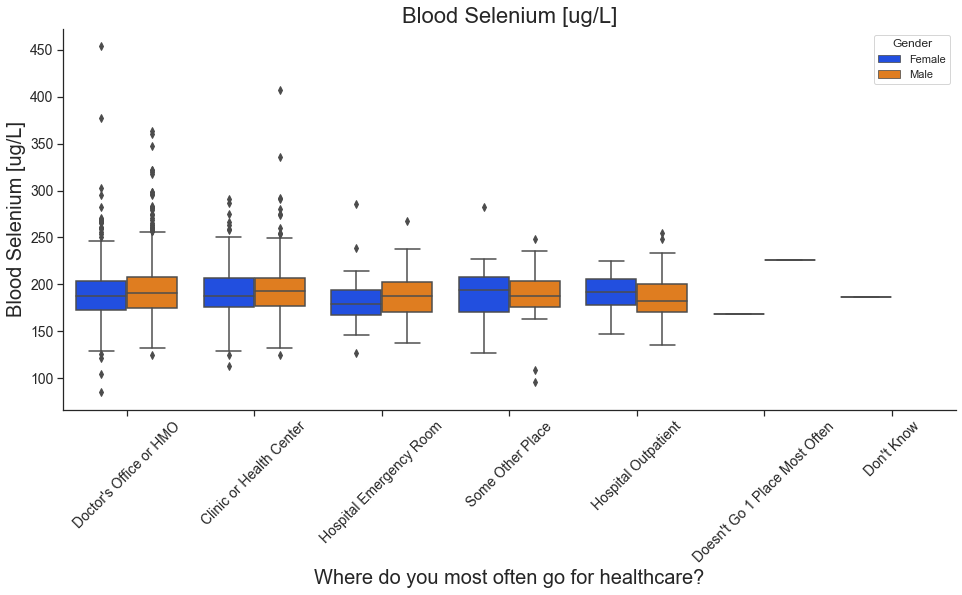

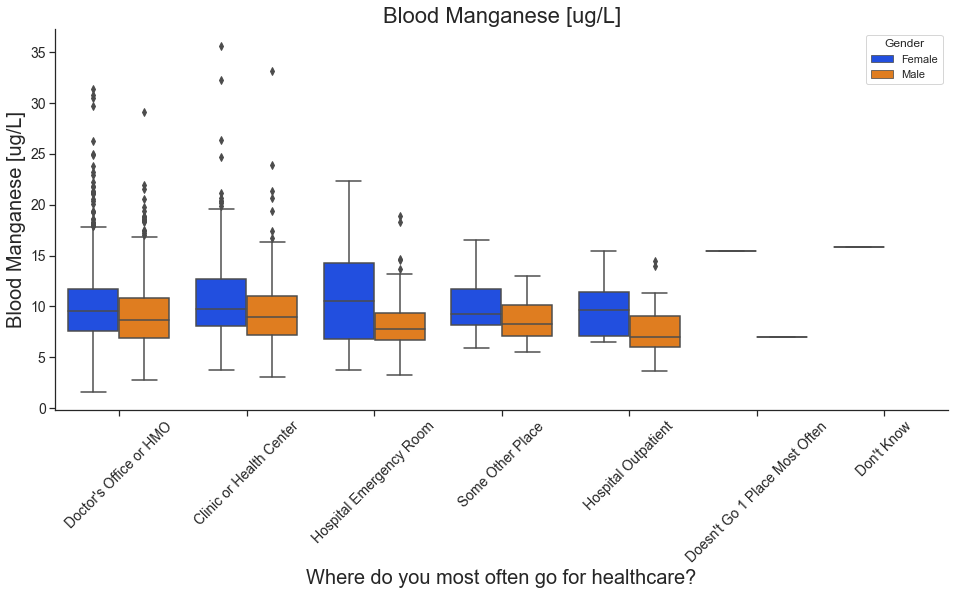

In [28]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("MostOftenHealthcarePlace", metal, 
                     data=NHANES_combined.sort_values("Age_years", ascending=True), 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Where do you most often go for healthcare?", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

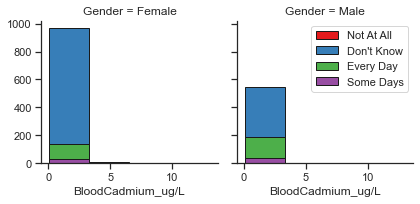

In [29]:
bins = np.linspace(NHANES_combined['BloodCadmium_ug/L'].min(), NHANES_combined['BloodCadmium_ug/L'].max(), 5)
g = sns.FacetGrid(NHANES_combined, col="Gender", hue="SmokeNow", palette="Set1", col_wrap=2)
g.map(plt.hist, 'BloodCadmium_ug/L', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

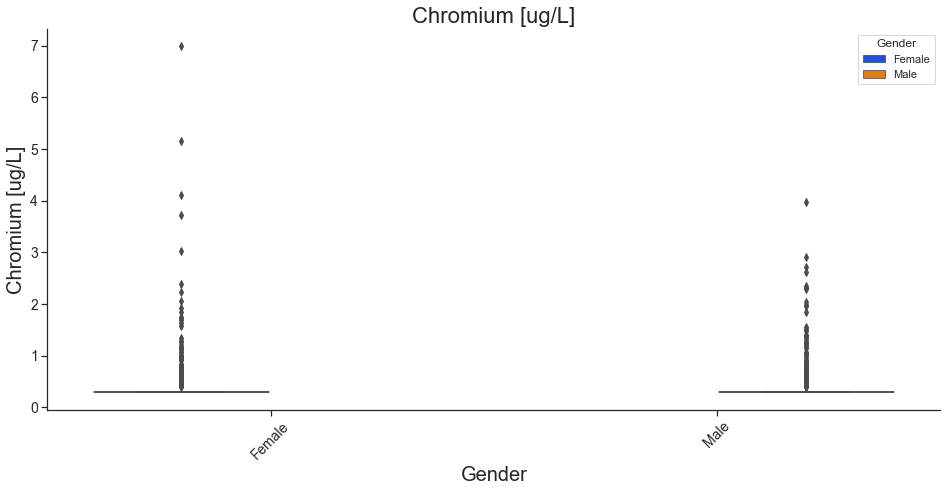

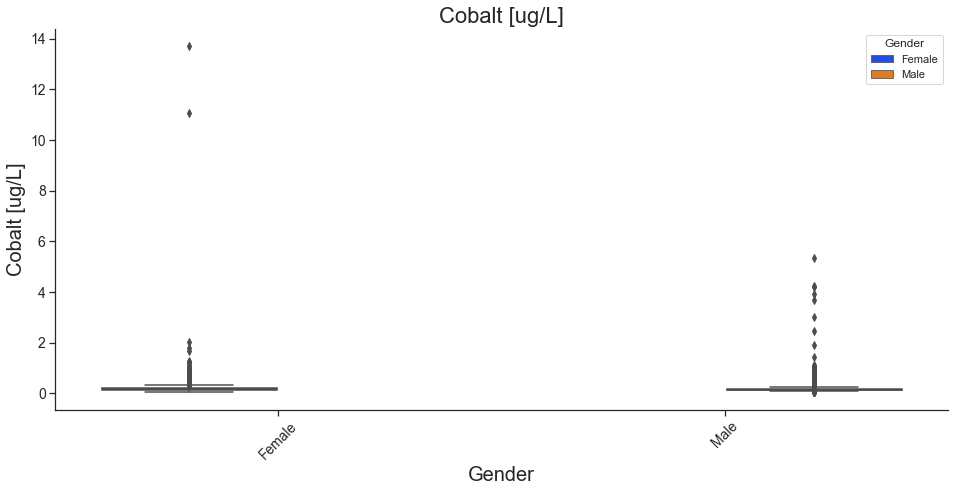

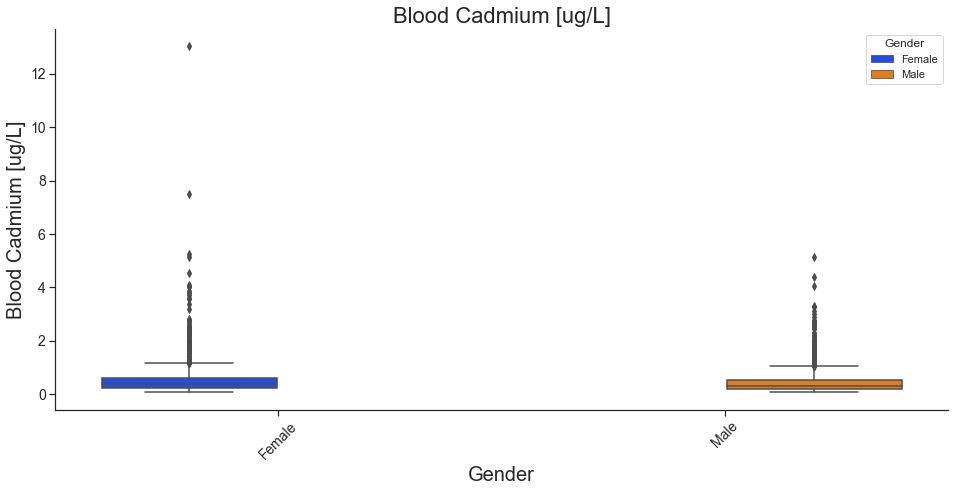

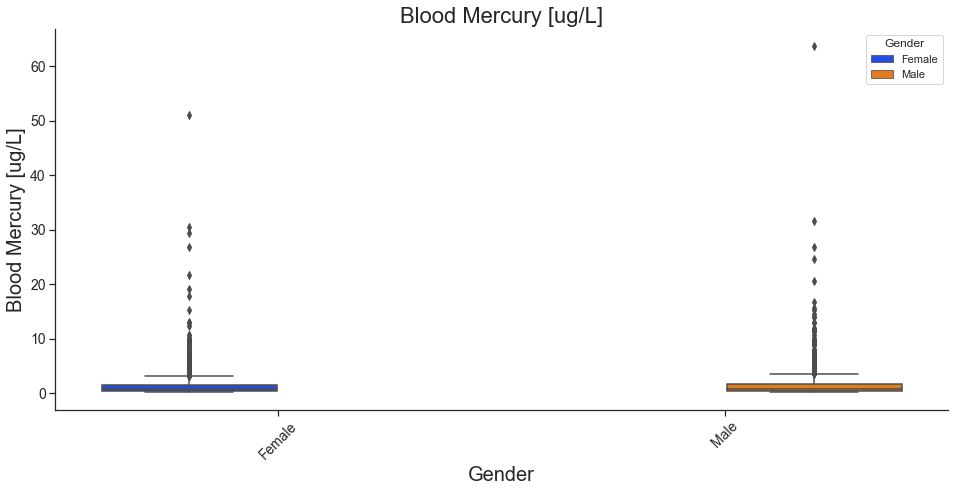

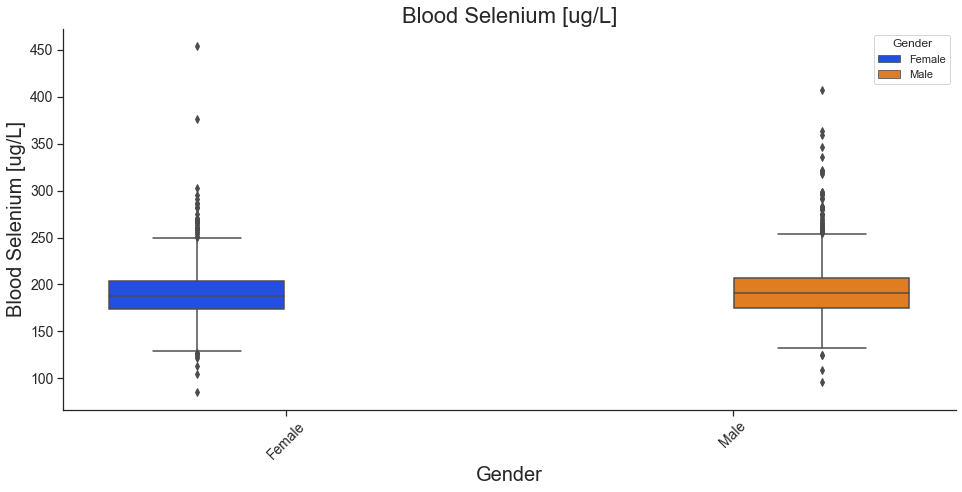

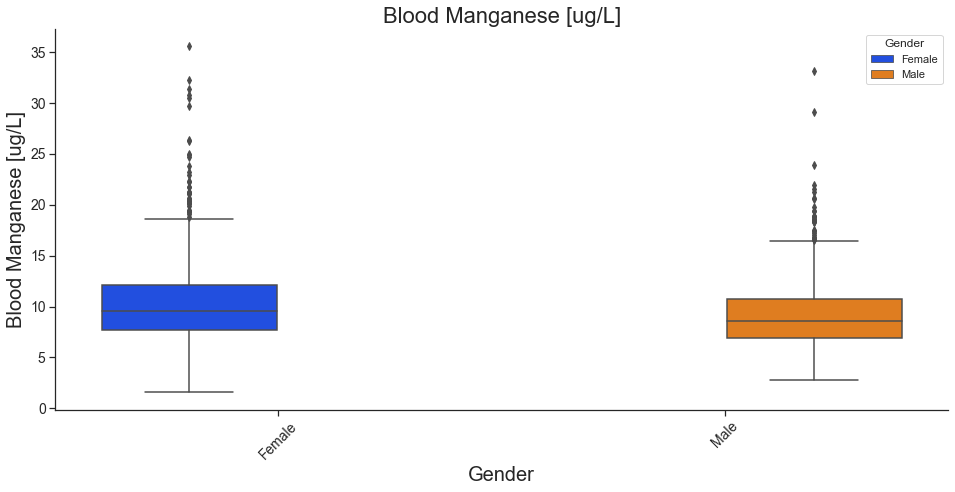

In [30]:
for metal, i in zip(metals, names):
    sns.set(rc={'figure.figsize':(16, 7)})
    sns.set_style("white")
    sns.set_style("ticks")
    ax = sns.boxplot("Gender", metal, 
                     data=NHANES_combined, 
                     palette="bright", hue="Gender")
    ax.set_xlabel("Gender", fontsize=20)
    ax.set_ylabel(i, fontsize=20)
    ax.axes.set_title(i, fontsize=22)
    ax.tick_params(labelsize=14)
    plt.xticks(rotation=45)
    sns.despine()
    plt.show()

<h1 align="center"><font color="purple" size=4>Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame</h1></font>

<h1 align="center"><font color="gray" size=4> I'll first get rid of the columns that have duplicate unit measurements by only keeping the mass measurements while getting rid of the molar measurements</h1></font>

In [31]:
NHANES_combined = NHANES_combined.drop(['Glu_mmol/L', 'Chromium_nmol/L', 'Cobalt_nmol/L',
                                        'BloodLead_umol/L','BloodCadmium_nmol/L', 'BloodMercury_nmol/L',
                                       'BloodSelenium_umol/L','BloodMang_nmol/L'], axis=1)
NHANES_combined.head(2)

,Gender,Age_years,BirthCountry,HouseholdSize,FamilySize,AnnualHouseIncome,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,...,ReceiveHealthPastYear,BloodLead_ug/dL,BloodCadmium_ug/L,BloodMercury_ug/L,BloodSelenium_ug/L,BloodMang_ug/L,PesticideUseHome,PesticideUsedWeeds,SmokeNow,EverUsedEcig
0,Female,66,USA,1,1,"$10,000-$14,999",0.82,44.0,31.0,3.93,...,2-3,2.98,0.24,1.07,185.71,8.57,No,No,Not At All,No
1,Female,66,Other,2,2,"$25,000-$34,999",1.63,39.0,27.0,5.71,...,4-5,1.53,0.73,15.23,178.79,15.09,No,No,Don't Know,No


In [32]:
NHANES_combined.columns

Index(['Gender', 'Age_years', 'BirthCountry', 'HouseholdSize', 'FamilySize',
       'AnnualHouseIncome', 'RatioFamilyIncomePoverty', 'Albumin_g/L',
       'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L', 'Creatinine_umol/L',
       'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L', 'Potassium_mmol/L',
       'Sodium_mmol/L', 'Calcium_mmol/L', 'TotalProtein_g/L', 'Chromium_ug/L',
       'Cobalt_ug/L', 'GeneralHealthCondition', 'HealthComparedto1year',
       'MostOftenHealthcarePlace', 'ReceiveHealthPastYear', 'BloodLead_ug/dL',
       'BloodCadmium_ug/L', 'BloodMercury_ug/L', 'BloodSelenium_ug/L',
       'BloodMang_ug/L', 'PesticideUseHome', 'PesticideUsedWeeds', 'SmokeNow',
       'EverUsedEcig'],
      dtype='object')

### I'd like to initially build a model to predict BloodCadmium_ug/L
### So I can test classification algorithms, I'll bin the Cadmium levels

In [33]:
bin_labels = ["Low", "Low-Moderate", "Moderate-High", "High"]
NHANES_combined['Blood_Cadmium_ug/L'] = pd.qcut(NHANES_combined['BloodCadmium_ug/L'], 
                                                q=4, precision=0, labels=bin_labels)
NHANES_combined = NHANES_combined.drop("BloodCadmium_ug/L", axis=1)
NHANES_combined.head(3)

,Gender,Age_years,BirthCountry,HouseholdSize,FamilySize,AnnualHouseIncome,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,...,ReceiveHealthPastYear,BloodLead_ug/dL,BloodMercury_ug/L,BloodSelenium_ug/L,BloodMang_ug/L,PesticideUseHome,PesticideUsedWeeds,SmokeNow,EverUsedEcig,Blood_Cadmium_ug/L
0,Female,66,USA,1,1,"$10,000-$14,999",0.82,44.0,31.0,3.93,...,2-3,2.98,1.07,185.71,8.57,No,No,Not At All,No,Low-Moderate
1,Female,66,Other,2,2,"$25,000-$34,999",1.63,39.0,27.0,5.71,...,4-5,1.53,15.23,178.79,15.09,No,No,Don't Know,No,High
3,Male,56,Other,3,3,"$100,000 and over",5.00,40.0,29.0,5.00,...,4-5,2.15,0.20,206.39,6.55,No,No,Don't Know,No,Moderate-High


In [34]:
NHANES_combined['Blood_Cadmium_ug/L'].value_counts()

Low-Moderate     730
Low              694
High             688
Moderate-High    658
Name: Blood_Cadmium_ug/L, dtype: int64

<h1 align="center"><font color='gray' size=4> Dataframe dimensions <font color='red'>before</font> encoding</h1></font>

In [35]:
NHANES_combined.shape

(2770, 34)

<h1 align="center"><font color="gray" size=4> One hot encoding</h1></font>

In [36]:
NHANES_combined = pd.concat([NHANES_combined,pd.get_dummies(NHANES_combined[['Gender', 'BirthCountry', 'AnnualHouseIncome',
                                                                            'GeneralHealthCondition', 'HealthComparedto1year',
                                                                             'MostOftenHealthcarePlace', 'ReceiveHealthPastYear',
                                                                            'PesticideUseHome', 'PesticideUsedWeeds', 'SmokeNow',
                                                                             'EverUsedEcig']])], axis=1)
NHANES_combined = NHANES_combined.drop(['Gender', 'BirthCountry', 'AnnualHouseIncome',
                                        'GeneralHealthCondition', 'HealthComparedto1year',
                                        'MostOftenHealthcarePlace', 'ReceiveHealthPastYear',
                                        'PesticideUseHome', 'PesticideUsedWeeds', 'SmokeNow',
                                        'EverUsedEcig'], axis=1)
NHANES_combined.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUseHome_Yes,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,0,1,0,0,0,1,0,1,0
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,0,1,0,1,0,0,0,1,0


<h1 align="center"><font color='gray' size=4> Dataframe dimensions <font color='red'>after</font> encoding</h1></font>

In [37]:
NHANES_combined.shape

(2770, 82)

In [38]:
#to check the columns again uncomment the line below...
#NHANES_combined.columns

In [39]:
NHANES_checkpoint = NHANES_combined
NHANES_checkpoint.head(2)  # for use downstream

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUseHome_Yes,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,0,1,0,0,0,1,0,1,0
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,0,1,0,1,0,0,0,1,0


<h1 align="center"><font color='purple' size=6>Correlation Heat Maps</h1></font>

### I'll first just take an overall look at the feature correlations....

In [40]:
corrmat = NHANES_combined.corr()

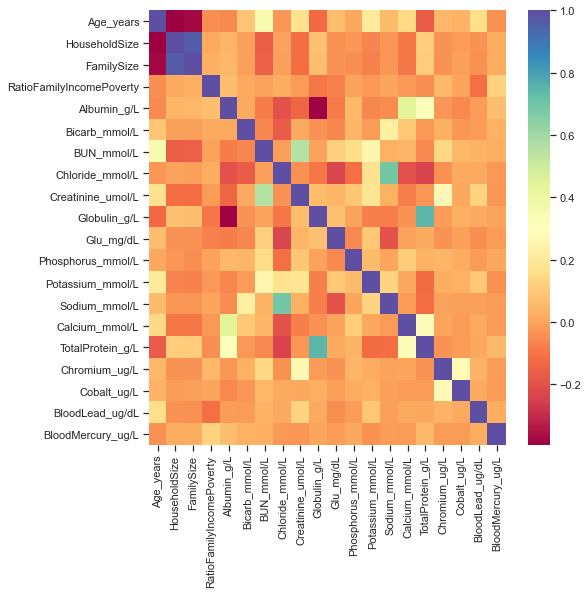

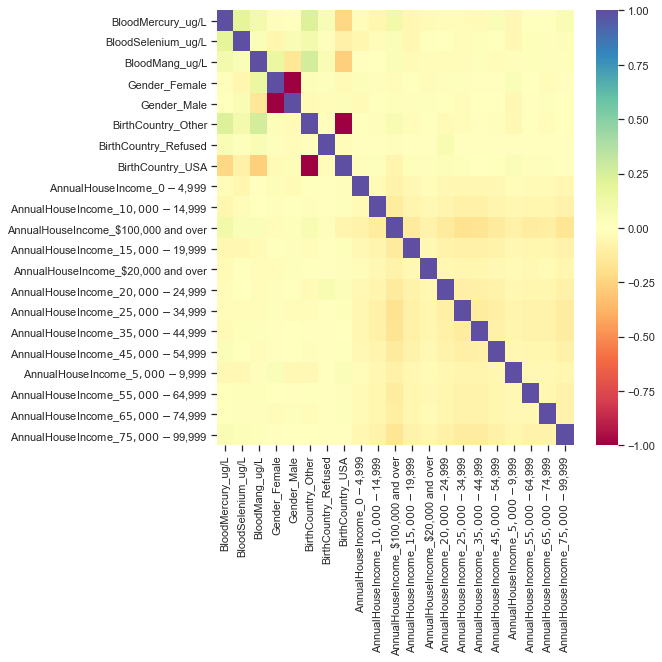

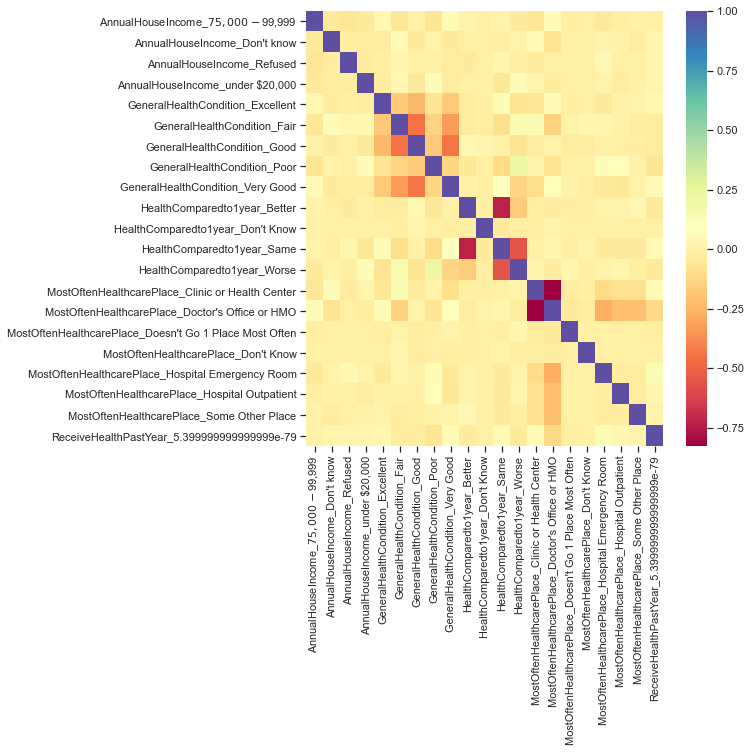

In [41]:
#get correlations of each features in dataset

start=[0, 19, 39]
stop=[20, 40, 60]

for i, j in zip(start, stop):
    top_corr_features = corrmat.index[i:j]
    plt.figure(figsize=(8,8))
    #plot heat map
    g = sns.heatmap(NHANES_combined[top_corr_features].corr(),annot=False,cmap="Spectral")
    

### Looking at just the metals now

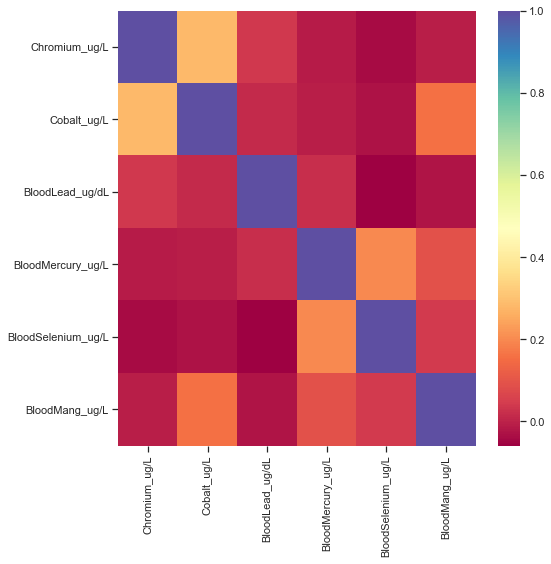

In [42]:
top_corr_features = corrmat.index[16:22]
plt.figure(figsize=(8,8))
#plot heat map
g = sns.heatmap(NHANES_combined[top_corr_features].corr(),annot=False,cmap="Spectral")

<h1 align="left"><font color="black" size=5><font color="red">This is interesting!</font> It seems to suggeest that there are 4 sets of metal correlations, with <font color='red'> Cobalt & Chromium </font> showing the highest correlation:<br>
    <br>
    1. Cobalt & Chromium <font color="gold">(moderate)</font><br>
    2. Cobalt & Manganese <font color="darkorange">(low)</font><br>
    3. Mercury & Selenium <font color="orange">(low/moderate)</font><br>
    4. Mercury & Manganese <font color="darkorange">(low)</font><br>
    <br>
This would be something I could look into the literature about to see what might already be known.</h1></font>

<h1 align="center"><font color='purple' size=6>Feature Selection</h1></font>

### I'd like to initially see if I could build a model to predict the BloodCadmium_ug/L 
##### * In the future, I'd like to see if there is a way to get location data that could then be tied to water and heavy metal contamination/runoff *

In [43]:
#first find the index of the target variable first (i.e. 'Blood_Cadmium_ug/L')
NHANES_checkpoint = NHANES_combined #in case I need downstream
NHANES_combined.columns.get_loc("Blood_Cadmium_ug/L")

22

Lets defind feature sets, X:

In [44]:
X = NHANES_combined.drop("Blood_Cadmium_ug/L", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

In [45]:
y = NHANES_combined['Blood_Cadmium_ug/L'].values
y

['Low-Moderate', 'High', 'Moderate-High', 'High', 'Low-Moderate', ..., 'Moderate-High', 'Low-Moderate', 'High', 'Low', 'Low-Moderate']
Length: 2770
Categories (4, object): ['Low' < 'Low-Moderate' < 'Moderate-High' < 'High']

<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUseHome_Yes,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes
0,0.374989,-1.165220,-1.093158,-1.256071,1.219517,2.031791,-0.808036,-0.280400,-0.055389,-0.413420,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844
1,0.374989,-0.497106,-0.430420,-0.768072,-0.331761,0.458718,-0.083294,1.033273,-0.745346,0.240716,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
2,-0.471012,0.171008,0.232317,1.262248,-0.021505,1.245254,-0.372376,0.376436,0.370613,0.022670,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
3,0.459589,-1.165220,-1.093158,-0.153553,0.909261,-0.327818,0.788025,0.048018,0.370613,-2.157784,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,2.673398,-0.661413,-0.159831,0.358844,-0.358844
4,-0.640212,0.171008,0.232317,-0.629504,-1.883038,2.425059,-0.808036,-0.280400,-1.009072,1.112898,...,2.982089,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844


<h1 align="center"><font color='purple' size=6>CLASSIFICATION</h1></font>
<h1 align="center"><font color='purple' size=6>See REPORT below at the end of the initial model tests for the metric comparisons</h1></font>

### Split the dataset (70/30) into train and test datasets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1939, 81) (1939,)
Test set: (831, 81) (831,)


<h1 align="center"><font color="darkblue" size=5>K nearest neighbor</h1></font>

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Train KNN model and predict

In [49]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.31167268, 0.33935018, 0.3188929 , 0.32611312, 0.35018051,
       0.34296029, 0.35258724, 0.37424789, 0.35980746])

### Finding the optimal 'k' ...

In [50]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.3742478941034898 with k= 8


### Training

In [51]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [52]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Low-Moderate', 'High', 'Low-Moderate', 'Low-Moderate', 'Low'],
      dtype=object)

In [53]:
knn_train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
knn_test_acc = metrics.accuracy_score(y_test, yhat)

In [54]:
print("Train set Accuracy: ", knn_train_acc)
print("Test set Accuracy: ", knn_test_acc)

Train set Accuracy:  0.5348117586384734
Test set Accuracy:  0.3742478941034898


### Evaluation

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [56]:
knn_f1 = f1_score(y_test, yhat, average='weighted') 
knn_f1

0.3713276174912401

In [57]:
knn_jac = jaccard_score(y_test, yhat, average='weighted')
knn_jac

0.23309003557756364

<h1 align="center"><font color="darkblue" size=5>Decision Tree</h1></font>

In [58]:
from sklearn.tree import DecisionTreeClassifier

### Find the best max depth...

In [59]:
mdepth = 10
mean_acc = np.zeros((mdepth-1))
std_acc = np.zeros((mdepth-1))
ConfustionMx = [];
for n in range(1,mdepth):
    
    #Train Model and Predict  
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train,y_train)
    yhat=tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.35619735, 0.39350181, 0.39711191, 0.41155235, 0.4211793 ,
       0.433213  , 0.40673887, 0.40673887, 0.39711191])

In [60]:
print( "The best accuracy was with", mean_acc.max(), "with max depth =", mean_acc.argmax()+1) 

The best accuracy was with 0.4332129963898917 with max depth = 6


### Build the model with the best max depth found above...

In [61]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)

In [62]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [63]:
predTree = Tree.predict(X_test)

In [64]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.4091456077015644


### Visualize the tree

In [65]:
# from sklearn import tree
# fig = plt.figure(figsize=(40, 20))
# ax = tree.plot_tree(Tree,
#                    filled=True,
#                    fontsize=15)
# plt.show()

### Evaluation

In [66]:
tree_train_acc = metrics.accuracy_score(y_train, Tree.predict(X_train))
tree_test_acc = metrics.accuracy_score(y_test, predTree)
print ('train', tree_train_acc, 'test', tree_test_acc)

train 0.558019597730789 test 0.4091456077015644


In [67]:
tree_f1 = f1_score(y_test, predTree, average='weighted') 
tree_f1

0.4022667435553531

In [68]:
tree_jac = jaccard_score(y_test, predTree, average='weighted')
tree_jac

0.2624849524237016

<h1 align="center"><font color="darkblue" size=5>Support Vector Machine (SVM) </h1></font>

In [69]:
from sklearn import svm

In [70]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train) 

SVC()

In [71]:
yyhat = svm_model.predict(X_test)
yyhat [0:5]

array(['Low-Moderate', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

### Evaluation

In [72]:
svm_train_acc = metrics.accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = metrics.accuracy_score(y_test, yyhat)
print ('train', svm_train_acc, 'test', svm_test_acc)

train 0.738009283135637 test 0.4428399518652226


In [73]:
svm_f1 = f1_score(y_test, yyhat, average='weighted') 
svm_f1

0.4513927917247377

In [74]:
svm_jac = jaccard_score(y_test, yyhat, average='weighted')
svm_jac

0.2974282994774284

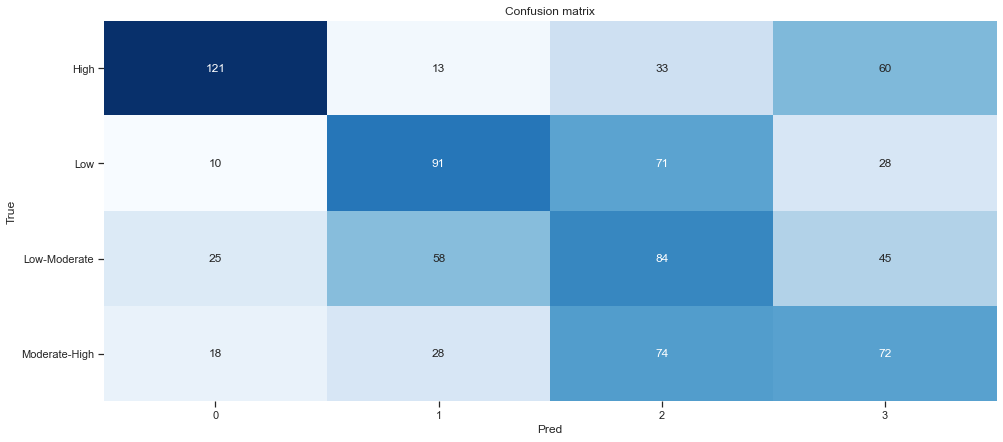

In [75]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [77]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [78]:
yyyhat = LR.predict(X_test)
yyyhat[0:5]

array(['Low', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

In [79]:
yhat_prob = LR.predict_proba(X_test)

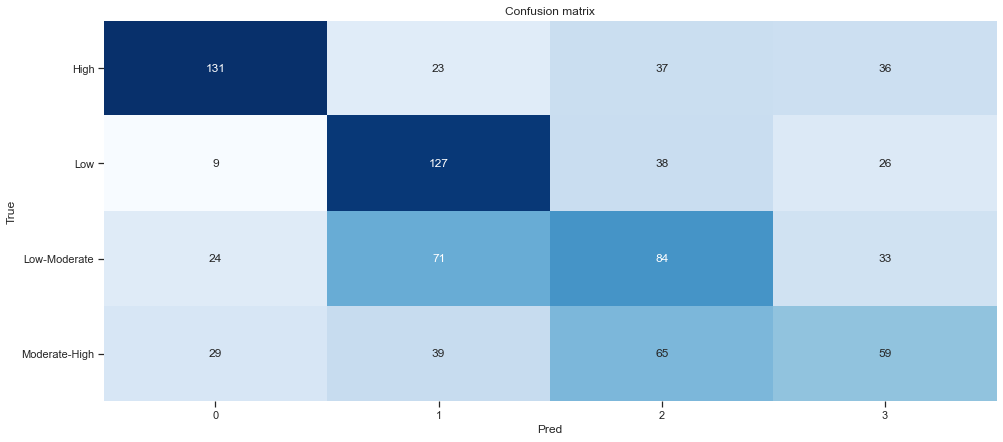

In [80]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Evaluation

In [81]:
lr_train_acc = metrics.accuracy_score(y_train, LR.predict(X_train))
lr_test_acc = metrics.accuracy_score(y_test, yyyhat)
print ('train', lr_train_acc, 'test', lr_test_acc)

train 0.49716348633316143 test 0.4825511432009627


In [82]:
lr_f1 = f1_score(y_test, yyyhat, average='weighted') 
lr_f1

0.4803939671408907

In [83]:
lr_jac = jaccard_score(y_test, yyyhat, average='weighted')
lr_jac

0.32398768040201326

In [84]:
from sklearn.metrics import log_loss
lr_ll = log_loss(y_test, yhat_prob)
lr_ll

1.189315995896665

### Look to see which features the model finds most significant

In [85]:
coeff_df = pd.DataFrame(NHANES_combined.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

,Feature,Correlation
76,SmokeNow_Don't Know,0.633142
18,BloodLead_ug/dL,0.233297
80,EverUsedEcig_No,0.196839
21,BloodMang_ug/L,0.183688
17,Cobalt_ug/L,0.163979
22,Blood_Cadmium_ug/L,0.127536
0,Age_years,0.120033
78,SmokeNow_Not At All,0.114933
8,Creatinine_umol/L,0.091461
27,BirthCountry_USA,0.088556


<h1 align="center"><font color="darkblue" size=5>Naive Bayes</h1></font>

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions 
between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [86]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
yyyyhat = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

36.2

### Evaluation

In [87]:
gaus_train_acc = metrics.accuracy_score(y_train, gaussian.predict(X_train))
gaus_test_acc = metrics.accuracy_score(y_test, yyyyhat)
print ('train', gaus_train_acc, 'test', gaus_test_acc)

train 0.36204228984012377 test 0.3176895306859206


In [88]:
gaus_f1 = f1_score(y_test, yyyyhat, average='weighted') 
gaus_f1

0.23172912465851467

In [89]:
gaus_jac = jaccard_score(y_test, yyyyhat, average='weighted')
gaus_jac

0.14597956874369455

<h1 align="center"><font color="darkblue" size=5>Random Forest</h1></font>

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

In [90]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
randomyhat = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

### Evaluation

In [91]:
random_train_acc = metrics.accuracy_score(y_train, random_forest.predict(X_train))
random_test_acc = metrics.accuracy_score(y_test, randomyhat)
print ('train', random_train_acc, 'test', random_test_acc)

train 1.0 test 0.4428399518652226


In [92]:
random_f1 = f1_score(y_test, randomyhat, average='weighted') 
random_f1

0.4475782104024572

In [93]:
random_jac = jaccard_score(y_test, randomyhat, average='weighted')
random_jac

0.29541685006167795

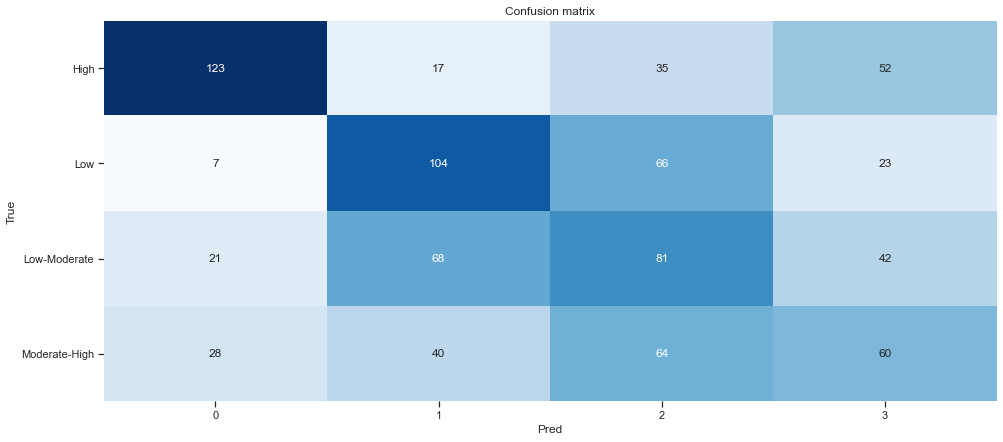

In [94]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, randomyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Neural Network</h1></font>

Neural Network
Artificial neural networks (ANN) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains.[1] The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs.[2]

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model.

There are many ways to choose these numbers, but for simplicity we will choose 7 layers with 70 neurons along with 1000 max iterations.

In [95]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(70,70,70,70,70,70,70),max_iter=1000)
mlp.fit(X_train, y_train)
NNyhat = mlp.predict(X_test)
mlp.score(X_train, y_train)
acc_mlp = round(mlp.score(X_train, y_train) * 100, 2)
acc_mlp

98.87

### Evaluation

In [96]:
nn_train_acc = metrics.accuracy_score(y_train, mlp.predict(X_train))
nn_test_acc = metrics.accuracy_score(y_test, NNyhat)
print ('train', nn_train_acc, 'test', nn_test_acc)

train 0.9886539453326457 test 0.40794223826714804


In [97]:
NN_f1 = f1_score(y_test, NNyhat, average='weighted') 
NN_f1

0.4144859545663499

In [98]:
NN_jac = jaccard_score(y_test, NNyhat, average='weighted')
NN_jac

0.26470068156483983

<h1 align="center"><font color='purple' size=6>Report</h1></font>

In [99]:
report = {'Model': ['KNN', 'Tree', 'SVM', 'LR', 'Naive Bayes', 'Random Forest', 'NN'], 
          'Train Accuracy': [knn_train_acc, tree_train_acc, svm_train_acc, lr_train_acc, gaus_train_acc, random_train_acc, nn_train_acc],
          'Test Accuracy': [knn_test_acc, tree_test_acc, svm_test_acc, lr_test_acc, gaus_test_acc, random_test_acc, nn_test_acc],
        'Jaccard': [knn_jac.round(2), tree_jac.round(2), svm_jac.round(2), lr_jac.round(2), gaus_jac.round(2), random_jac.round(2), NN_jac.round(2)],
       'F1-score': [knn_f1.round(2), tree_f1.round(2), svm_f1.round(2), lr_f1.round(2), gaus_f1.round(2), random_f1.round(2), NN_f1.round(2)],
       'LogLoss': ['NA', 'NA', 'NA', lr_ll.round(2), 'NA', 'NA', 'NA']}
report_df = pd.DataFrame(report)
print("******************************************")
print("MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
MODEL PERFORMANCE STATISTICS REPORT
******************************************
           Model  Train Accuracy  Test Accuracy  Jaccard  F1-score LogLoss
0            KNN        0.534812       0.374248     0.23      0.37      NA
1           Tree        0.558020       0.409146     0.26      0.40      NA
2            SVM        0.738009       0.442840     0.30      0.45      NA
3             LR        0.497163       0.482551     0.32      0.48    1.19
4    Naive Bayes        0.362042       0.317690     0.15      0.23      NA
5  Random Forest        1.000000       0.442840     0.30      0.45      NA
6             NN        0.988654       0.407942     0.26      0.41      NA
******************************************


,Model,Train Accuracy,Test Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.534812,0.374248,0.23,0.37,NA
1,Tree,0.558020,0.409146,0.26,0.40,NA
2,SVM,0.738009,0.442840,0.30,0.45,NA
3,LR,0.497163,0.482551,0.32,0.48,1.19
4,Naive Bayes,0.362042,0.317690,0.15,0.23,NA
5,Random Forest,1.000000,0.442840,0.30,0.45,NA
6,NN,0.988654,0.407942,0.26,0.41,NA


<h1 align="center"><font color='purple' size=6>Preliminary Conclusions</h1></font>

### I found that:
### <font color="blue"> 1. There seems to be a correlation (synergy) between some of the metals (i.e. chromium and cobalt had the highest correlation </font>
### <font color="blue"> 2. SVM model did the best. However, it still only had a test accuracy of ~ 46.9%</font>
### <font color="blue"> 3. The linear model suggested that the top 5 postive and negative correlations were:</font>
####     <font color='red'>Negative Correlations:</font>
####     SmokeNow_Every Day	-0.125225
####     Gender_Female	-0.139872
####     SmokeNow_Some Days	-0.176467
####     PesticideUsedWeeds_Yes	-0.364344
####     EverUsedEcig_Yes	NaN
####      <font color='red'>Positive Correlations:</font>
####     SmokeNow_Don't Know	0.676528
####     BloodLead_ug/dL	0.253731
####     BloodMang_ug/L	0.219095
####     EverUsedEcig_No	0.176467
####     Cobalt_ug/L	0.172629
####     Blood_Cadmium_ug/L	0.139872
###
### <font color="blue">4. The linear model also suggest that the 10 least important features (closest to zero correlation) were:</font>
####  <font color='red'> 10 Least Correlated:</font>
####  MostOftenHealthcarePlace_Don't Know	0.004970
####  AnnualHouseIncome_under 20,000	0.004550
####  Sodium_mmol/L	0.003754
####  MostOftenHealthcarePlace_Clinic or Health Center	0.003723
####  GeneralHealthCondition_Fair	-0.000963
####  PesticideUsedWeeds_Don't know	-0.003341
####  AnnualHouseIncome_ 25,000− 34,999	-0.003492
####  PesticideUseHome_Don't know	-0.004402
####  AnnualHouseIncome_100,000 and over	-0.004500
####  GeneralHealthCondition_Very Good	-0.005153
### <font color="blue">5. I would RELLY like to see if data is possibly available for location of these individuals (state). This would allow me to further compare this data with location and also then find another dataset containing water contamination measurements for these areas.</font>

<h1 align="center"><font color='purple' size=6>Optimize the SVM</h1></font>

<h1 align="center"><font color="darkblue" size=5>SVM (rbf)... the one I already produced above... </h1></font>

In [100]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train) 

SVC()

In [101]:
yyhat = svm_model.predict(X_test)
yyhat [0:5]

array(['Low-Moderate', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

### Evaluation

In [102]:
svm_train_acc = metrics.accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = metrics.accuracy_score(y_test, yyhat)
print ('train', svm_train_acc, 'test', svm_test_acc)

train 0.738009283135637 test 0.4428399518652226


In [103]:
svm_f1 = f1_score(y_test, yyhat, average='weighted') 
svm_f1

0.4513927917247377

In [104]:
svm_jac = jaccard_score(y_test, yyhat, average='weighted')
svm_jac

0.2974282994774284

<h1 align="center"><font color="darkblue" size=5>SVM (linear) </h1></font>

In [105]:
svm_model2 = svm.SVC(kernel='linear')
svm_model2.fit(X_train, y_train) 

SVC(kernel='linear')

In [106]:
sm2hat = svm_model2.predict(X_test)
sm2hat [0:5]

array(['Low', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

### Evaluation

In [107]:
svm2_train_acc = metrics.accuracy_score(y_train, svm_model2.predict(X_train))
svm2_test_acc = metrics.accuracy_score(y_test, sm2hat)
print ('train', svm2_train_acc, 'test', svm2_test_acc)

train 0.5054151624548736 test 0.4548736462093863


In [108]:
svm2_f1 = f1_score(y_test, sm2hat, average='weighted') 
svm2_f1

0.46470456149893674

In [109]:
svm2_jac = jaccard_score(y_test, sm2hat, average='weighted')
svm2_jac

0.3106974272934871

<h1 align="center"><font color="darkblue" size=5>SVM (polynomial) </h1></font>

In [110]:
svm3_model = svm.SVC(kernel='poly')
svm3_model.fit(X_train, y_train) 

SVC(kernel='poly')

In [111]:
sm3hat = svm3_model.predict(X_test)
sm3hat [0:5]

array(['Low-Moderate', 'Low', 'Low-Moderate', 'Low-Moderate', 'Low'],
      dtype=object)

### Evaluation

In [112]:
svm3_train_acc = metrics.accuracy_score(y_train, svm3_model.predict(X_train))
svm3_test_acc = metrics.accuracy_score(y_test, sm3hat)
print ('train', svm3_train_acc, 'test', svm3_test_acc)

train 0.7209902011346054 test 0.3694344163658243


In [113]:
svm3_f1 = f1_score(y_test, sm3hat, average='weighted') 
svm3_f1

0.34384952270842906

In [114]:
svm3_jac = jaccard_score(y_test, sm3hat, average='weighted')
svm3_jac

0.2145645243644731

<h1 align="center"><font color="darkblue" size=5>SVM (sigmoidal) </h1></font>

In [115]:
svm4_model = svm.SVC(kernel='sigmoid')
svm4_model.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [116]:
sm4hat = svm4_model.predict(X_test)
sm4hat [0:5]

array(['Low', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

### Evaluation

In [117]:
svm4_train_acc = metrics.accuracy_score(y_train, svm4_model.predict(X_train))
svm4_test_acc = metrics.accuracy_score(y_test, sm4hat)
print ('train', svm4_train_acc, 'test', svm4_test_acc)

train 0.4223826714801444 test 0.46690734055354993


In [118]:
svm4_f1 = f1_score(y_test, sm4hat, average='weighted') 
svm4_f1

0.4766157208827547

In [119]:
svm4_jac = jaccard_score(y_test, sm4hat, average='weighted')
svm4_jac

0.3196330280822772

In [120]:
report = {'SVM Model': ['RBF', 'Linear', 'Polynomial', 'Sigmoidal'], 
          'Train Accuracy': [svm_train_acc, svm2_train_acc, svm3_train_acc, svm4_train_acc],
          'Test Accuracy': [svm_test_acc, svm2_test_acc,svm3_test_acc,svm4_test_acc,],
        'Jaccard': [svm_jac.round(2), svm2_jac.round(2),svm3_jac.round(2),svm4_jac.round(2),],
       'F1-score': [svm_f1.round(2), svm2_f1.round(2),svm3_f1.round(2),svm4_f1.round(2),]}
report_df = pd.DataFrame(report)
print("******************************************")
print("SVM MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
SVM MODEL PERFORMANCE STATISTICS REPORT
******************************************
    SVM Model  Train Accuracy  Test Accuracy  Jaccard  F1-score
0         RBF        0.738009       0.442840     0.30      0.45
1      Linear        0.505415       0.454874     0.31      0.46
2  Polynomial        0.720990       0.369434     0.21      0.34
3   Sigmoidal        0.422383       0.466907     0.32      0.48
******************************************


,SVM Model,Train Accuracy,Test Accuracy,Jaccard,F1-score
0,RBF,0.738009,0.442840,0.30,0.45
1,Linear,0.505415,0.454874,0.31,0.46
2,Polynomial,0.720990,0.369434,0.21,0.34
3,Sigmoidal,0.422383,0.466907,0.32,0.48


<h1 align="center"><font color='purple' size=6>Hyperparameter Tuning:</h1></font>
<h1 align="center"><font color="darkblue" size=5>C: The Penalty Parameter</h1></font>

### Use GridSearchCV to find the best parameters....

In [121]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('rbf', 'linear', 'poly', 'sigmoid'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(X_train, y_train)
# print("Tuned SVM Parameters: {}".format(clf.best_params_))
# print("Best score is {}".format(clf.best_score_))

<h1 align="center"><font color="darkblue" size=5>Gamma</h1></font>

In [122]:
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3], 'gamma': [0.1, 0.01, 0.001, 0.0001]}
# svc = svm.SVC()
# clf2 = GridSearchCV(svc, parameters)
# clf2.fit(X_train, y_train)
# print("Tuned SVM Parameters: {}".format(clf2.best_params_))
# print("Best score is {}".format(clf2.best_score_))

### Great! So, now I have the optimized parmaters for the SVM model. Now I'll plug these back into  model and compare with the initial evaluation metrics.

<h1 align="center"><font color='purple' size=6>Testing the Optimized Model</h1></font>

In [123]:
svm_optimized_model = svm.SVC(kernel='rbf', C=1, gamma=0.01)
svm_optimized_model.fit(X_train, y_train) 

SVC(C=1, gamma=0.01)

In [124]:
svm_predictions = svm_optimized_model.predict(X_test)
svm_predictions [0:5]

array(['Low-Moderate', 'High', 'Low-Moderate', 'Low', 'Low'], dtype=object)

### Evaluation

In [125]:
svm_optimized_train_acc = metrics.accuracy_score(y_train, svm_optimized_model.predict(X_train))
svm_optimized_test_acc = metrics.accuracy_score(y_test, svm_predictions)
print ('train', svm_optimized_train_acc, 'test', svm_optimized_test_acc)

train 0.6900464156781846 test 0.45246690734055356


In [126]:
svm_optimized_f1 = f1_score(y_test, svm_predictions, average='weighted') 
svm_optimized_f1

0.46089927063755803

In [127]:
svm_optimized_jac = jaccard_score(y_test, svm_predictions, average='weighted')
svm_optimized_jac

0.30532414558225485

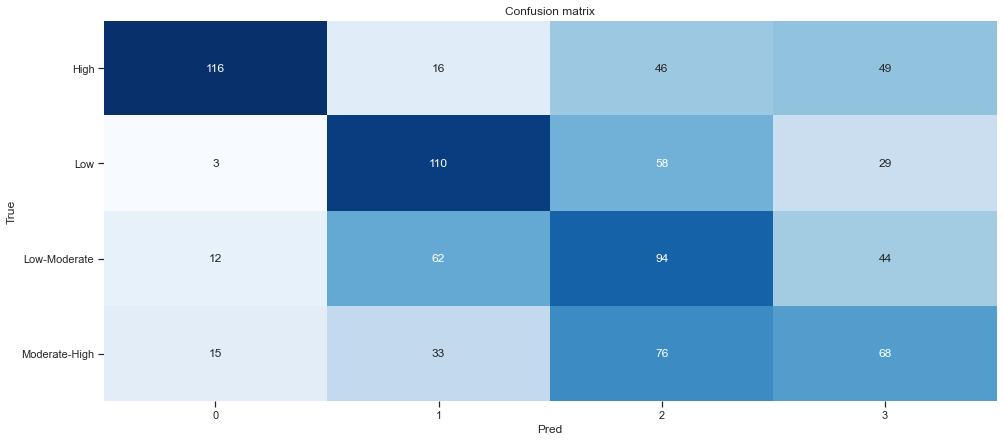

In [128]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, sm4hat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

In [129]:
report = {'SVM Model': ['Original', 'Optimized'], 
          'Train Accuracy': [svm_train_acc, svm_optimized_train_acc],
          'Test Accuracy': [svm_test_acc, svm_optimized_test_acc],
        'Jaccard': [svm_jac.round(2), svm_optimized_jac.round(2)],
       'F1-score': [svm_f1.round(2), svm_optimized_f1.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("SVM MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
SVM MODEL PERFORMANCE STATISTICS REPORT
******************************************
   SVM Model  Train Accuracy  Test Accuracy  Jaccard  F1-score
0   Original        0.738009       0.442840     0.30      0.45
1  Optimized        0.690046       0.452467     0.31      0.46
******************************************


,SVM Model,Train Accuracy,Test Accuracy,Jaccard,F1-score
0,Original,0.738009,0.442840,0.30,0.45
1,Optimized,0.690046,0.452467,0.31,0.46


### So, although the test accuracy went down a small amount, the difference between the train and test accuracies decreased. This suggests that the optimized model reduced some of the overfitting in the original model.

<h1 align="center"><font color='purple' size=6>Try a different route... Group all metals to make new "TotalMetal" feature and see if I can better predict that.</h1></font>

In [130]:
NHANES_checkpoint.columns

Index(['Age_years', 'HouseholdSize', 'FamilySize', 'RatioFamilyIncomePoverty',
       'Albumin_g/L', 'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L',
       'Creatinine_umol/L', 'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Cobalt_ug/L', 'BloodLead_ug/dL',
       'BloodMercury_ug/L', 'BloodSelenium_ug/L', 'BloodMang_ug/L',
       'Blood_Cadmium_ug/L', 'Gender_Female', 'Gender_Male',
       'BirthCountry_Other', 'BirthCountry_Refused', 'BirthCountry_USA',
       'AnnualHouseIncome_$0-$4,999', 'AnnualHouseIncome_$10,000-$14,999',
       'AnnualHouseIncome_$100,000 and over',
       'AnnualHouseIncome_$15,000-$19,999',
       'AnnualHouseIncome_$20,000 and over',
       'AnnualHouseIncome_$20,000-$24,999',
       'AnnualHouseIncome_$25,000-$34,999',
       'AnnualHouseIncome_$35,000-$44,999',
       'AnnualHouseIncome_$45,000-$54,999', 'AnnualHouseIncome_$5,000-$9,999',
       '

Note: 1 dL = 0.1 L

In [131]:
NHANES_checkpoint['BloodLead_ug/L'] = NHANES_checkpoint['BloodLead_ug/dL'] / 0.1
NHANES_checkpoint = NHANES_checkpoint.drop('BloodLead_ug/dL', axis=1)
NHANES_checkpoint.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,BloodLead_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,1,0,0,0,1,0,1,0,29.8
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,1,0,1,0,0,0,1,0,15.3


In [132]:
cat_columns = NHANES_checkpoint.select_dtypes(['category']).columns

cat_columns

Index(['Blood_Cadmium_ug/L'], dtype='object')

In [133]:
NHANES_checkpoint[cat_columns] = NHANES_checkpoint[cat_columns].apply(lambda x: x.cat.codes)
#NHANES_checkpoint.info()

In [134]:
new_column = NHANES_checkpoint['Chromium_ug/L'] + NHANES_checkpoint['Cobalt_ug/L'] + NHANES_checkpoint['BloodLead_ug/L'] + NHANES_checkpoint['Blood_Cadmium_ug/L'] + NHANES_checkpoint['BloodMercury_ug/L'] + NHANES_checkpoint['BloodSelenium_ug/L'] + NHANES_checkpoint['BloodMang_ug/L']  
NHANES_checkpoint["TotalMetal_ug/L"] = new_column
NHANES_checkpoint2 = NHANES_checkpoint #In case I need this form of the dataframe later

In [135]:
NHANES_checkpoint2.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,BloodLead_ug/L,TotalMetal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,1,0,0,0,1,0,1,0,29.8,226.64
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,1,0,1,0,0,0,1,0,15.3,227.86


In [136]:
NHANES_checkpoint2.columns

Index(['Age_years', 'HouseholdSize', 'FamilySize', 'RatioFamilyIncomePoverty',
       'Albumin_g/L', 'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L',
       'Creatinine_umol/L', 'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Cobalt_ug/L', 'BloodMercury_ug/L',
       'BloodSelenium_ug/L', 'BloodMang_ug/L', 'Blood_Cadmium_ug/L',
       'Gender_Female', 'Gender_Male', 'BirthCountry_Other',
       'BirthCountry_Refused', 'BirthCountry_USA',
       'AnnualHouseIncome_$0-$4,999', 'AnnualHouseIncome_$10,000-$14,999',
       'AnnualHouseIncome_$100,000 and over',
       'AnnualHouseIncome_$15,000-$19,999',
       'AnnualHouseIncome_$20,000 and over',
       'AnnualHouseIncome_$20,000-$24,999',
       'AnnualHouseIncome_$25,000-$34,999',
       'AnnualHouseIncome_$35,000-$44,999',
       'AnnualHouseIncome_$45,000-$54,999', 'AnnualHouseIncome_$5,000-$9,999',
       'AnnualHouseIncome_$

### Now I'll drop all the metal columns except the "TotalMetal" feature

In [137]:
NHANES_checkpoint2 = NHANES_checkpoint.drop(['Chromium_ug/L', 'Cobalt_ug/L','BloodLead_ug/L',
                                            'Blood_Cadmium_ug/L', 'BloodMercury_ug/L', 'BloodSelenium_ug/L',
                                            'BloodMang_ug/L'],axis = 1)

In [138]:
NHANES_checkpoint2.head(1)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,TotalMetal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,1,0,0,0,1,0,1,0,226.64


### and I'll check the columns again

In [139]:
NHANES_checkpoint2.columns

Index(['Age_years', 'HouseholdSize', 'FamilySize', 'RatioFamilyIncomePoverty',
       'Albumin_g/L', 'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L',
       'Creatinine_umol/L', 'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Gender_Female', 'Gender_Male',
       'BirthCountry_Other', 'BirthCountry_Refused', 'BirthCountry_USA',
       'AnnualHouseIncome_$0-$4,999', 'AnnualHouseIncome_$10,000-$14,999',
       'AnnualHouseIncome_$100,000 and over',
       'AnnualHouseIncome_$15,000-$19,999',
       'AnnualHouseIncome_$20,000 and over',
       'AnnualHouseIncome_$20,000-$24,999',
       'AnnualHouseIncome_$25,000-$34,999',
       'AnnualHouseIncome_$35,000-$44,999',
       'AnnualHouseIncome_$45,000-$54,999', 'AnnualHouseIncome_$5,000-$9,999',
       'AnnualHouseIncome_$55,000-$64,999',
       'AnnualHouseIncome_$65,000-$74,999',
       'AnnualHouseIncome_$75,000-$99,999', 'AnnualHouseIncome_Don't

In [140]:
NHANES = NHANES_checkpoint2
NHANES_checkpoint3 = NHANES # in case needed downstream

In [141]:
NHANES.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,TotalMetal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,1,0,0,0,1,0,1,0,226.64
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,1,0,1,0,0,0,1,0,227.86


### I'll now bin the TotalMetal levels

In [142]:
bin_labels = ["Low", "Moderate", "High"]
NHANES['TotalMetal_ug/L'] = pd.qcut(NHANES['TotalMetal_ug/L'], 
                                                q=3, precision=0, labels=bin_labels)
#NHANES = NHANES.drop("TotalMetal_ug/L", axis=1)
NHANES.head(3)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,TotalMetal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,1,0,0,0,1,0,1,0,Moderate
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,1,0,1,0,0,0,1,0,High
3,56,3,3,5.00,40.0,29.0,5.00,102.0,99.89,31.0,...,0,1,0,1,0,0,0,1,0,High


In [143]:
NHANES['TotalMetal_ug/L'].value_counts()

Low         924
High        923
Moderate    923
Name: TotalMetal_ug/L, dtype: int64

<h1 align="center"><font color='purple' size=6>New Feature Selection</h1></font>

### I'd like to initially see if I could build a model to predict the TotalMetal_ug/L 

Lets defind feature sets, X:

In [144]:
X = NHANES.drop("TotalMetal_ug/L", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

In [145]:
y = NHANES['TotalMetal_ug/L'].values
y

['Moderate', 'High', 'High', 'High', 'High', ..., 'Moderate', 'Moderate', 'Low', 'Moderate', 'Low']
Length: 2770
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1939, 75) (1939,)
Test set: (831, 75) (831,)


<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

In [147]:
min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUseHome_Yes,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes
0,0.374989,-1.165220,-1.093158,-1.256071,1.219517,2.031791,-0.808036,-0.280400,-0.055389,-0.413420,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844
1,0.374989,-0.497106,-0.430420,-0.768072,-0.331761,0.458718,-0.083294,1.033273,-0.745346,0.240716,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
2,-0.471012,0.171008,0.232317,1.262248,-0.021505,1.245254,-0.372376,0.376436,0.370613,0.022670,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
3,0.459589,-1.165220,-1.093158,-0.153553,0.909261,-0.327818,0.788025,0.048018,0.370613,-2.157784,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,2.673398,-0.661413,-0.159831,0.358844,-0.358844
4,-0.640212,0.171008,0.232317,-0.629504,-1.883038,2.425059,-0.808036,-0.280400,-1.009072,1.112898,...,2.982089,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844


<h1 align="center"><font color='purple' size=6>Testing "Total Metal" with the Optimized SVM Model</h1></font>

In [148]:
svmTotal_optimized_model = svm.SVC(kernel='rbf', C=1, gamma=0.01)
svmTotal_optimized_model.fit(X_train, y_train) 

SVC(C=1, gamma=0.01)

In [149]:
svmTotal_predictions = svmTotal_optimized_model.predict(X_test)
svmTotal_predictions [0:5]

array(['Moderate', 'High', 'Low', 'High', 'High'], dtype=object)

### Evaluation

In [150]:
svmTotal_optimized_train_acc = metrics.accuracy_score(y_train, svmTotal_optimized_model.predict(X_train))
svmTotal_optimized_test_acc = metrics.accuracy_score(y_test, svmTotal_predictions)
print ('train', svmTotal_optimized_train_acc, 'test', svmTotal_optimized_test_acc)

train 0.8808664259927798 test 0.394705174488568


In [151]:
svmTotal_optimized_f1 = f1_score(y_test, svmTotal_predictions, average='weighted') 
svmTotal_optimized_f1

0.38849964765862616

In [152]:
svmTotal_optimized_jac = jaccard_score(y_test, svmTotal_predictions, average='weighted')
svmTotal_optimized_jac

0.24194179345732406

In [153]:
report = {'SVM Model': ['Original', 'Optimized', 'TotalMetal_Optimized'], 
          'Train Accuracy': [svm_train_acc, svm_optimized_train_acc, svmTotal_optimized_train_acc],
          'Test Accuracy': [svm_test_acc, svm_optimized_test_acc, svmTotal_optimized_test_acc],
        'Jaccard': [svm_jac.round(2), svm_optimized_jac.round(2), svmTotal_optimized_jac.round(2)],
       'F1-score': [svm_f1.round(2), svm_optimized_f1.round(2), svmTotal_optimized_f1.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("SVM MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
SVM MODEL PERFORMANCE STATISTICS REPORT
******************************************
              SVM Model  Train Accuracy  Test Accuracy  Jaccard  F1-score
0              Original        0.738009       0.442840     0.30      0.45
1             Optimized        0.690046       0.452467     0.31      0.46
2  TotalMetal_Optimized        0.880866       0.394705     0.24      0.39
******************************************


,SVM Model,Train Accuracy,Test Accuracy,Jaccard,F1-score
0,Original,0.738009,0.442840,0.30,0.45
1,Optimized,0.690046,0.452467,0.31,0.46
2,TotalMetal_Optimized,0.880866,0.394705,0.24,0.39


### Well, that didn't help at all 

<h1 align="center"><font color='purple' size=6>New idea... Perhaps the model might work better if it only has to predict HIGH totalMetal or NOT HIGH totalMetal. It is currently trying to predict low, mid, and high</h1></font>

### get the dataset again pre-standardization

In [154]:
NHANES_checkpoint.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,BloodLead_ug/L,TotalMetal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,1,0,0,0,1,0,1,0,29.8,226.64
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,1,0,1,0,0,0,1,0,15.3,227.86


In [155]:
NHANES_checkpoint.columns

Index(['Age_years', 'HouseholdSize', 'FamilySize', 'RatioFamilyIncomePoverty',
       'Albumin_g/L', 'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L',
       'Creatinine_umol/L', 'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Chromium_ug/L', 'Cobalt_ug/L', 'BloodMercury_ug/L',
       'BloodSelenium_ug/L', 'BloodMang_ug/L', 'Blood_Cadmium_ug/L',
       'Gender_Female', 'Gender_Male', 'BirthCountry_Other',
       'BirthCountry_Refused', 'BirthCountry_USA',
       'AnnualHouseIncome_$0-$4,999', 'AnnualHouseIncome_$10,000-$14,999',
       'AnnualHouseIncome_$100,000 and over',
       'AnnualHouseIncome_$15,000-$19,999',
       'AnnualHouseIncome_$20,000 and over',
       'AnnualHouseIncome_$20,000-$24,999',
       'AnnualHouseIncome_$25,000-$34,999',
       'AnnualHouseIncome_$35,000-$44,999',
       'AnnualHouseIncome_$45,000-$54,999', 'AnnualHouseIncome_$5,000-$9,999',
       'AnnualHouseIncome_$

### Now I'll bin the TotalMetal column ...

In [156]:
NHANES_checkpoint['TotalMetal_ug/L'].describe()

count    2770.000000
mean      218.915094
std        31.138968
min       113.650000
25%       199.200000
50%       215.460000
75%       233.402500
max       470.050000
Name: TotalMetal_ug/L, dtype: float64

In [157]:
percentile = np.array(NHANES_checkpoint['TotalMetal_ug/L'])
np.percentile(percentile, 75)

233.4025

### So, 233 ug/L is the 75th percentile. I'll make "HIGH" be everything >= 233 and "NOT HIGH" will be everything else.

In [158]:
bin_labels = ["Not High", "High"]
NHANES_checkpoint['Total_Metal_ug/L'] = pd.cut(NHANES_checkpoint['TotalMetal_ug/L'], 
                                                bins = [0, 233, 471], labels=bin_labels)
NHANES_new = NHANES_checkpoint.drop("TotalMetal_ug/L", axis=1)
NHANES_new.head(3)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,BloodLead_ug/L,Total_Metal_ug/L
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,1,0,0,0,1,0,1,0,29.8,Not High
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,1,0,1,0,0,0,1,0,15.3,Not High
3,56,3,3,5.00,40.0,29.0,5.00,102.0,99.89,31.0,...,1,0,1,0,0,0,1,0,21.5,High


In [159]:
NHANES_new['Total_Metal_ug/L'].value_counts()

Not High    2067
High         703
Name: Total_Metal_ug/L, dtype: int64

### Now for one-hot encoding of the TotalMetal feature

<h1 align="center"><font color='gray' size=4> Dataframe dimensions <font color='red'>before</font> encoding</h1></font>

In [160]:
NHANES_new.shape

(2770, 83)

In [161]:
#NHANES_new.columns

<h1 align="center"><font color="gray" size=4> One hot encoding</h1></font>

### Note: I also drop the new "Not High" column, as well as all other metal columns EXCEPT "High" (the predictor) so the models don't have that data and overfit.

In [162]:
#NHANES_new.columns

In [163]:
NHANES_new = pd.concat([NHANES_new,pd.get_dummies(NHANES_new['Total_Metal_ug/L'])], axis=1)
NHANES_new = NHANES_new.drop(['Total_Metal_ug/L'], axis=1)
NHANES_new = NHANES_new.drop(['Not High'], axis=1)
NHANES_new = NHANES_new.drop(['Chromium_ug/L', 'Cobalt_ug/L', 'BloodMercury_ug/L','BloodSelenium_ug/L', 'BloodMang_ug/L', 'Blood_Cadmium_ug/L', 'BloodLead_ug/L'], axis = 1)

NHANES_new.head(2)

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes,High
0,66,1,1,0.82,44.0,31.0,3.93,100.0,81.33,29.0,...,0,1,0,0,0,1,0,1,0,0
1,66,2,2,1.63,39.0,27.0,5.71,104.0,51.27,32.0,...,0,1,0,1,0,0,0,1,0,0


<h1 align="center"><font color='gray' size=4> Dataframe dimensions <font color='red'>after</font> encoding</h1></font>

In [164]:
NHANES_new.shape

(2770, 76)

In [165]:
#to check the columns again uncomment the line below...
#NHANES_new.columns

### Now, I'll try the optimized model again....

<h1 align="center"><font color='purple' size=6>New Feature Selection</h1></font>

### Build a model to predict the TotalMetal_ug/L 

Lets defind feature sets, X:

In [166]:
X = NHANES_new.drop("High", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

In [167]:
y = NHANES_new['High'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Split the data (70/30)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1939, 75) (1939,)
Test set: (831, 75) (831,)


<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

In [169]:
min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

,Age_years,HouseholdSize,FamilySize,RatioFamilyIncomePoverty,Albumin_g/L,Bicarb_mmol/L,BUN_mmol/L,Chloride_mmol/L,Creatinine_umol/L,Globulin_g/L,...,PesticideUseHome_Yes,PesticideUsedWeeds_Don't know,PesticideUsedWeeds_No,PesticideUsedWeeds_Yes,SmokeNow_Don't Know,SmokeNow_Every Day,SmokeNow_Not At All,SmokeNow_Some Days,EverUsedEcig_No,EverUsedEcig_Yes
0,0.374989,-1.165220,-1.093158,-1.256071,1.219517,2.031791,-0.808036,-0.280400,-0.055389,-0.413420,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844
1,0.374989,-0.497106,-0.430420,-0.768072,-0.331761,0.458718,-0.083294,1.033273,-0.745346,0.240716,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
2,-0.471012,0.171008,0.232317,1.262248,-0.021505,1.245254,-0.372376,0.376436,0.370613,0.022670,...,-0.335335,-0.128506,0.319108,-0.287148,0.908168,-0.374056,-0.661413,-0.159831,0.358844,-0.358844
3,0.459589,-1.165220,-1.093158,-0.153553,0.909261,-0.327818,0.788025,0.048018,0.370613,-2.157784,...,-0.335335,-0.128506,0.319108,-0.287148,-1.101118,2.673398,-0.661413,-0.159831,0.358844,-0.358844
4,-0.640212,0.171008,0.232317,-0.629504,-1.883038,2.425059,-0.808036,-0.280400,-1.009072,1.112898,...,2.982089,-0.128506,0.319108,-0.287148,-1.101118,-0.374056,1.511914,-0.159831,0.358844,-0.358844


<h1 align="center"><font color='purple' size=6>Testing "Total Metal" with the Optimized SVM Model</h1></font>

In [170]:
svmHigh_optimized_model = svm.SVC(kernel='rbf', C=1, gamma=0.01)
svmHigh_optimized_model.fit(X_train, y_train) 

SVC(C=1, gamma=0.01)

In [171]:
svmHigh_predictions = svmHigh_optimized_model.predict(X_test)
svmHigh_predictions [0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

### Evaluation

In [172]:
svmHigh_optimized_train_acc = metrics.accuracy_score(y_train, svmHigh_optimized_model.predict(X_train))
svmHigh_optimized_test_acc = metrics.accuracy_score(y_test, svmHigh_predictions)
print ('train', svmHigh_optimized_train_acc, 'test', svmHigh_optimized_test_acc)

train 0.849406910778752 test 0.7484957882069796


In [173]:
svmHigh_optimized_f1 = f1_score(y_test, svmHigh_predictions, average='weighted') 
svmHigh_optimized_f1

0.643243381646489

In [174]:
svmHigh_optimized_jac = jaccard_score(y_test, svmHigh_predictions, average='weighted')
svmHigh_optimized_jac

0.5603985489890391

In [175]:
report = {'SVM Model': ['Original', 'Optimized', 'TotalMetal_Optimized', 'High'], 
          'Train Accuracy': [svm_train_acc, svm_optimized_train_acc, svmTotal_optimized_train_acc, svmHigh_optimized_train_acc],
          'Test Accuracy': [svm_test_acc, svm_optimized_test_acc, svmTotal_optimized_test_acc, svmHigh_optimized_test_acc],
        'Jaccard': [svm_jac.round(2), svm_optimized_jac.round(2), svmTotal_optimized_jac.round(2), svmHigh_optimized_jac.round(2)],
       'F1-score': [svm_f1.round(2), svm_optimized_f1.round(2), svmTotal_optimized_f1.round(2), svmHigh_optimized_f1.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("SVM MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
SVM MODEL PERFORMANCE STATISTICS REPORT
******************************************
              SVM Model  Train Accuracy  Test Accuracy  Jaccard  F1-score
0              Original        0.738009       0.442840     0.30      0.45
1             Optimized        0.690046       0.452467     0.31      0.46
2  TotalMetal_Optimized        0.880866       0.394705     0.24      0.39
3                  High        0.849407       0.748496     0.56      0.64
******************************************


,SVM Model,Train Accuracy,Test Accuracy,Jaccard,F1-score
0,Original,0.738009,0.442840,0.30,0.45
1,Optimized,0.690046,0.452467,0.31,0.46
2,TotalMetal_Optimized,0.880866,0.394705,0.24,0.39
3,High,0.849407,0.748496,0.56,0.64


### Now, I'll test the other classification algorithms again with the new "high" level total metals

<h1 align="center"><font color="darkblue" size=5>K nearest neighbor</h1></font>

### Train KNN model and predict

In [176]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.622142  , 0.72202166, 0.68231047, 0.73405535, 0.68471721,
       0.72803851, 0.71600481, 0.73164862, 0.72683514])

### Finding the optimal 'k' ...

In [177]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7340553549939831 with k= 4


### Training

In [178]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [179]:
yhigh = neigh.predict(X_test)
yhigh[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [180]:
knn_high_train_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
knn_high_test_acc = metrics.accuracy_score(y_test, yhat)

In [181]:
print("Train set Accuracy: ", knn_high_train_acc)
print("Test set Accuracy: ", knn_high_test_acc)

Train set Accuracy:  0.7663744198040227
Test set Accuracy:  0.7268351383874849


### Evaluation

In [182]:
knn_high_f1 = f1_score(y_test, yhigh, average='weighted') 
knn_high_f1

0.6558480440131671

In [183]:
knn_high_jac = jaccard_score(y_test, yhigh, average='weighted')
knn_high_jac

0.5488148489630398

In [184]:
KNN_high_precision_score_macro = precision_score(y_test, yhigh, average='macro')
KNN_high_precision_score_micro = precision_score(y_test, yhigh, average='micro')
KNN_high_precision_score_weight = precision_score(y_test, yhigh, average='weighted')
print("Precision\nMacro:", KNN_high_precision_score_macro.round(2), 
      "\nMicro:", KNN_high_precision_score_micro.round(2),
      "\nWeighted:", KNN_high_precision_score_weight.round(2))

Precision
Macro: 0.53 
Micro: 0.72 
Weighted: 0.64


In [185]:
KNN_high_recall_score_macro = recall_score(y_test, yhigh, average='macro')
KNN_high_recall_score_micro = recall_score(y_test, yhigh, average='micro')
KNN_high_recall_score_weight = recall_score(y_test, yhigh, average='weighted')
print("Recall\nMacro:", KNN_high_recall_score_macro.round(2), 
      "\nMicro:", KNN_high_recall_score_micro.round(2),
      "\nWeighted:", KNN_high_recall_score_weight.round(2))

Recall
Macro: 0.51 
Micro: 0.72 
Weighted: 0.72


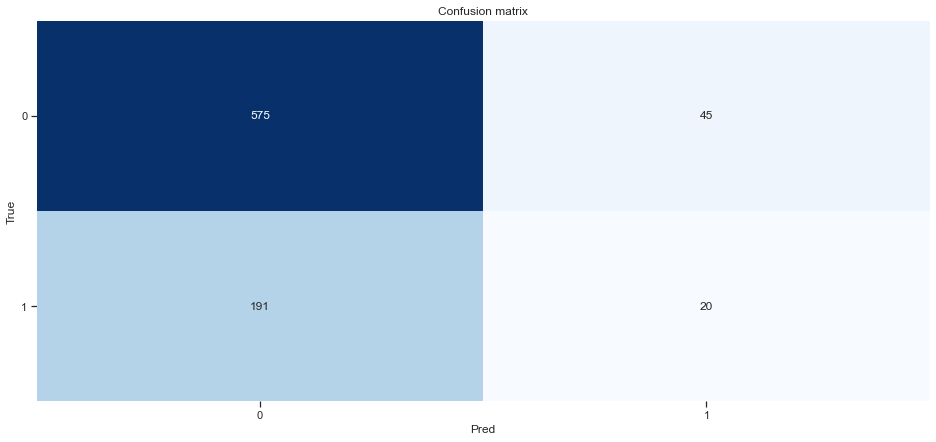

In [186]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Decision Tree</h1></font>

### Find the best max depth...

In [187]:
mdepth = 10
mean_acc = np.zeros((mdepth-1))
std_acc = np.zeros((mdepth-1))
ConfustionMx = [];
for n in range(1,mdepth):
    
    #Train Model and Predict  
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train,y_train)
    yhat=tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74608905, 0.74608905, 0.74608905, 0.73766546, 0.73525872,
       0.72202166, 0.72803851, 0.70397112, 0.70758123])

In [188]:
print( "The best accuracy was with", mean_acc.max(), "with max depth =", mean_acc.argmax()+1) 

The best accuracy was with 0.7460890493381468 with max depth = 1


### Build the model with the best max depth found above...

In [189]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [190]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [191]:
predTree_high = Tree.predict(X_test)

In [192]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree_high))

DecisionTrees's Accuracy:  0.7376654632972323


### Visualize the tree

In [193]:
# from sklearn import tree
# fig = plt.figure(figsize=(40, 20))
# ax = tree.plot_tree(Tree,
#                    filled=True,
#                    fontsize=15)
# plt.show()

### Evaluation

In [194]:
tree_high_train_acc = metrics.accuracy_score(y_train, Tree.predict(X_train))
tree_high_test_acc = metrics.accuracy_score(y_test, predTree_high)
print ('train', tree_high_train_acc, 'test', tree_high_test_acc)

train 0.7493553378029912 test 0.7376654632972323


In [195]:
tree_high_f1 = f1_score(y_test, predTree_high, average='weighted') 
tree_high_f1

0.6377144292306748

In [196]:
tree_high_jac = jaccard_score(y_test, predTree_high, average='weighted')
tree_high_jac

0.5522002103752114

In [197]:
tree_high_precision_score_macro = precision_score(y_test, predTree_high, average='macro')
tree_high_precision_score_micro = precision_score(y_test, predTree_high, average='micro')
tree_high_precision_score_weight = precision_score(y_test, predTree_high, average='weighted')
print("Precision\nMacro:", tree_high_precision_score_macro.round(2), 
      "\nMicro:", tree_high_precision_score_micro.round(2),
      "\nWeighted:", tree_high_precision_score_weight.round(2))

Precision
Macro: 0.46 
Micro: 0.74 
Weighted: 0.6


In [198]:
tree_high_recall_score_macro = recall_score(y_test, predTree_high, average='macro')
tree_high_recall_score_micro = recall_score(y_test, predTree_high, average='micro')
tree_high_recall_score_weight = recall_score(y_test, predTree_high, average='weighted')
print("Recall\nMacro:", tree_high_recall_score_macro.round(2), 
      "\nMicro:", tree_high_recall_score_micro.round(2),
      "\nWeighted:", tree_high_recall_score_weight.round(2))

Recall
Macro: 0.5 
Micro: 0.74 
Weighted: 0.74


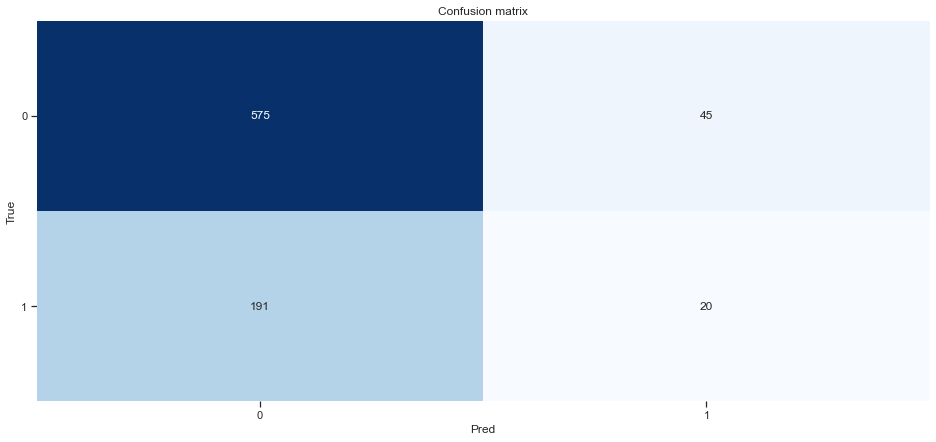

In [199]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Support Vector Machine (SVM) </h1></font>

In [200]:
svm_high_model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
svm_high_model.fit(X_train, y_train) 

SVC(C=1, gamma=0.1)

In [201]:
yyhigh = svm_high_model.predict(X_test)
yyhigh [0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

### Evaluation

In [202]:
svm_high_train_acc = metrics.accuracy_score(y_train, svm_high_model.predict(X_train))
svm_high_test_acc = metrics.accuracy_score(y_test, yyhigh)
print ('train', svm_high_train_acc, 'test', svm_high_test_acc)

train 1.0 test 0.7460890493381468


In [203]:
svm_high_f1 = f1_score(y_test, yyhigh, average='weighted') 
svm_high_f1

0.6375950525012419

In [204]:
svm_high_jac = jaccard_score(y_test, yyhigh, average='weighted')
svm_high_jac

0.5566488695422996

In [205]:
svm_high_precision_score_macro = precision_score(y_test, yyhigh, average='macro')
svm_high_precision_score_micro = precision_score(y_test, yyhigh, average='micro')
svm_high_precision_score_weight = precision_score(y_test, yyhigh, average='weighted')
print("Precision\nMacro:", svm_high_precision_score_macro.round(2), 
      "\nMicro:", svm_high_precision_score_micro.round(2),
      "\nWeighted:", svm_high_precision_score_weight.round(2))

Precision
Macro: 0.37 
Micro: 0.75 
Weighted: 0.56


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
svm_high_recall_score_macro = recall_score(y_test, yyhigh, average='macro')
svm_high_recall_score_micro = recall_score(y_test, yyhigh, average='micro')
svm_high_recall_score_weight = recall_score(y_test, yyhigh, average='weighted')
print("Recall\nMacro:", svm_high_recall_score_macro.round(2), 
      "\nMicro:", svm_high_recall_score_micro.round(2),
      "\nWeighted:", svm_high_recall_score_weight.round(2))

Recall
Macro: 0.5 
Micro: 0.75 
Weighted: 0.75


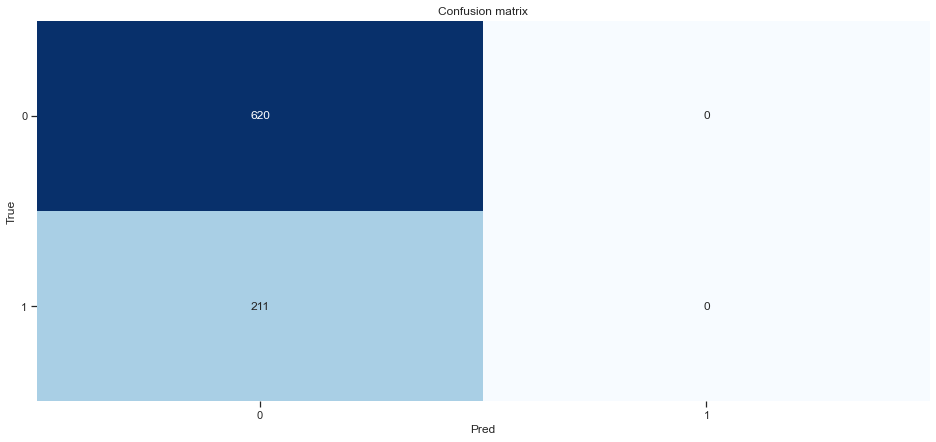

In [207]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

In [208]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [209]:
yyyhigh = LR.predict(X_test)
yyyhigh[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [210]:
yhat_high_prob = LR.predict_proba(X_test)

### Evaluation

In [211]:
lr_high_train_acc = metrics.accuracy_score(y_train, LR.predict(X_train))
lr_high_test_acc = metrics.accuracy_score(y_test, yyyhigh)
print ('train', lr_train_acc, 'test', lr_test_acc)

train 0.49716348633316143 test 0.4825511432009627


In [212]:
lr_high_f1 = f1_score(y_test, yyyhigh, average='weighted') 
lr_high_f1

0.6404301595541034

In [213]:
lr_high_jac = jaccard_score(y_test, yyyhigh, average='weighted')
lr_high_jac

0.5585229002653213

In [214]:
lr_high_ll = log_loss(y_test, yhat_high_prob)
lr_high_ll

0.5554628186349955

In [215]:
lr_high_precision_score_macro = precision_score(y_test, yyyhigh, average='macro')
lr_high_precision_score_micro = precision_score(y_test, yyyhigh, average='micro')
lr_high_precision_score_weight = precision_score(y_test, yyyhigh, average='weighted')
print("Precision\nMacro:", lr_high_precision_score_macro.round(2), 
      "\nMicro:", lr_high_precision_score_micro.round(2),
      "\nWeighted:", lr_high_precision_score_weight.round(2))

Precision
Macro: 0.87 
Micro: 0.75 
Weighted: 0.81


In [216]:
lr_high_recall_score_macro = recall_score(y_test, yyyhigh, average='macro')
lr_high_recall_score_micro = recall_score(y_test, yyyhigh, average='micro')
lr_high_recall_score_weight = recall_score(y_test, yyyhigh, average='weighted')
print("Recall\nMacro:", lr_high_recall_score_macro.round(2), 
      "\nMicro:", lr_high_recall_score_micro.round(2),
      "\nWeighted:", lr_high_recall_score_weight.round(2))

Recall
Macro: 0.5 
Micro: 0.75 
Weighted: 0.75


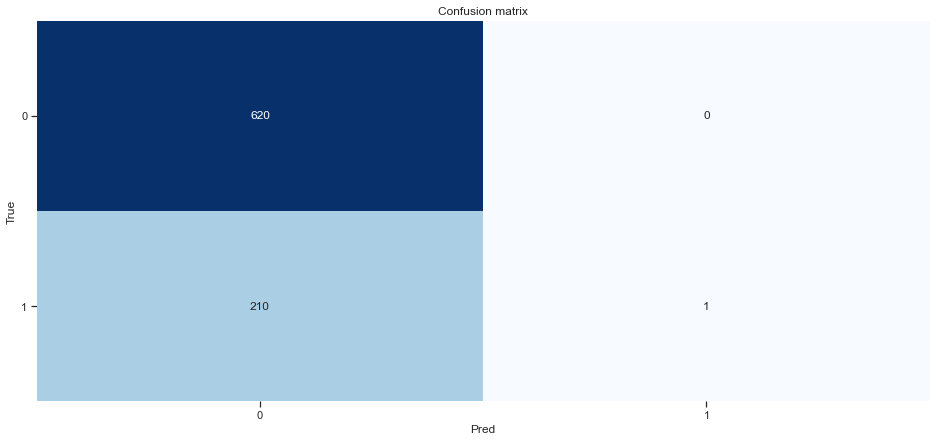

In [217]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Look to see which features the model finds most significant

In [218]:
coeff_df = pd.DataFrame(NHANES_new.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

,Feature,Correlation
18,BirthCountry_Other,0.117861
41,GeneralHealthCondition_Very Good,0.061613
42,HealthComparedto1year_Better,0.055170
33,"AnnualHouseIncome_$75,000-$99,999",0.051178
4,Albumin_g/L,0.048850
64,PesticideUseHome_No,0.044152
17,Gender_Male,0.044122
31,"AnnualHouseIncome_$55,000-$64,999",0.042945
70,SmokeNow_Every Day,0.038549
22,"AnnualHouseIncome_$10,000-$14,999",0.038518


<h1 align="center"><font color="darkblue" size=5>Naive Bayes</h1></font>

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions 
between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [219]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
yyyyhigh = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

45.64

### Evaluation

In [220]:
gaus_high_train_acc = metrics.accuracy_score(y_train, gaussian.predict(X_train))
gaus_high_test_acc = metrics.accuracy_score(y_test, yyyyhigh)
print ('train', gaus_high_train_acc, 'test', gaus_high_test_acc)

train 0.4564208354822073 test 0.39951865222623345


In [221]:
gaus_high_f1 = f1_score(y_test, yyyyhigh, average='weighted') 
gaus_high_f1

0.4146367560656769

In [222]:
gaus_high_jac = jaccard_score(y_test, yyyyhigh, average='weighted')
gaus_high_jac

0.2619915926669081

In [223]:
gaus_high_precision_score_macro = precision_score(y_test, yyyyhigh, average='macro')
gaus_high_precision_score_micro = precision_score(y_test, yyyyhigh, average='micro')
gaus_high_precision_score_weight = precision_score(y_test, yyyyhigh, average='weighted')
print("Precision\nMacro:", gaus_high_precision_score_macro.round(2), 
      "\nMicro:", gaus_high_precision_score_micro.round(2),
      "\nWeighted:", gaus_high_precision_score_weight.round(2))

Precision
Macro: 0.49 
Micro: 0.4 
Weighted: 0.61


In [224]:
gaus_high_recall_score_macro = recall_score(y_test, yyyyhigh, average='macro')
gaus_high_recall_score_micro = recall_score(y_test, yyyyhigh, average='micro')
gaus_high_recall_score_weight = recall_score(y_test, yyyyhigh, average='weighted')
print("Recall\nMacro:", gaus_high_recall_score_macro.round(2), 
      "\nMicro:", gaus_high_recall_score_micro.round(2),
      "\nWeighted:", gaus_high_recall_score_weight.round(2))

Recall
Macro: 0.49 
Micro: 0.4 
Weighted: 0.4


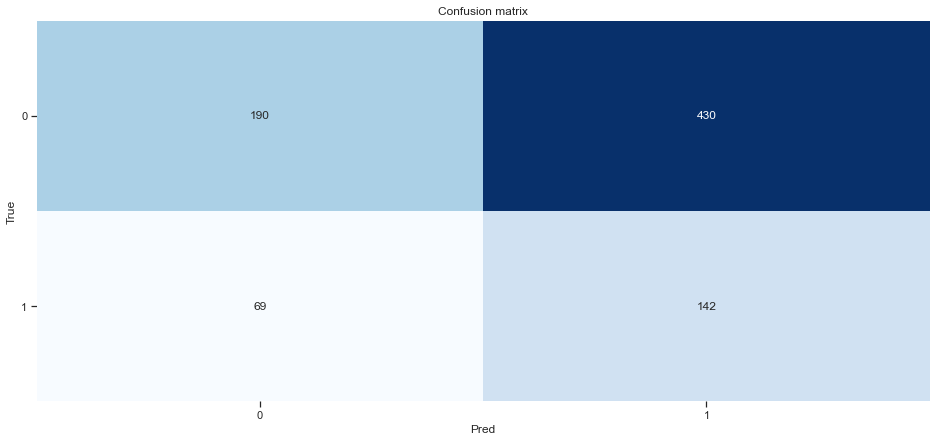

In [225]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyyyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Random Forest</h1></font>

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

In [226]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
randomyhigh = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_high_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_high_random_forest

100.0

### Evaluation

In [227]:
random_high_train_acc = metrics.accuracy_score(y_train, random_forest.predict(X_train))
random_high_test_acc = metrics.accuracy_score(y_test, randomyhigh)
print ('train', random_high_train_acc, 'test', random_high_test_acc)

train 1.0 test 0.7484957882069796


In [228]:
random_high_f1 = f1_score(y_test, randomyhigh, average='weighted') 
random_high_f1

0.6454122471062205

In [229]:
random_high_jac = jaccard_score(y_test, randomyhigh, average='weighted')
random_high_jac

0.5613577190319387

In [230]:
random_high_precision_score_macro = precision_score(y_test, randomyhigh, average='macro')
random_high_precision_score_micro = precision_score(y_test, randomyhigh, average='micro')
random_high_precision_score_weight = precision_score(y_test, randomyhigh, average='weighted')
print("Precision\nMacro:", random_high_precision_score_macro.round(2), 
      "\nMicro:", random_high_precision_score_micro.round(2),
      "\nWeighted:", random_high_precision_score_weight.round(2))

Precision
Macro: 0.75 
Micro: 0.75 
Weighted: 0.75


In [231]:
random_high_recall_score_macro = recall_score(y_test, randomyhigh, average='macro')
random_high_recall_score_micro = recall_score(y_test, randomyhigh, average='micro')
random_high_recall_score_weight = recall_score(y_test, randomyhigh, average='weighted')
print("Recall\nMacro:", random_high_recall_score_macro.round(2), 
      "\nMicro:", random_high_recall_score_micro.round(2),
      "\nWeighted:", random_high_recall_score_weight.round(2))

Recall
Macro: 0.51 
Micro: 0.75 
Weighted: 0.75


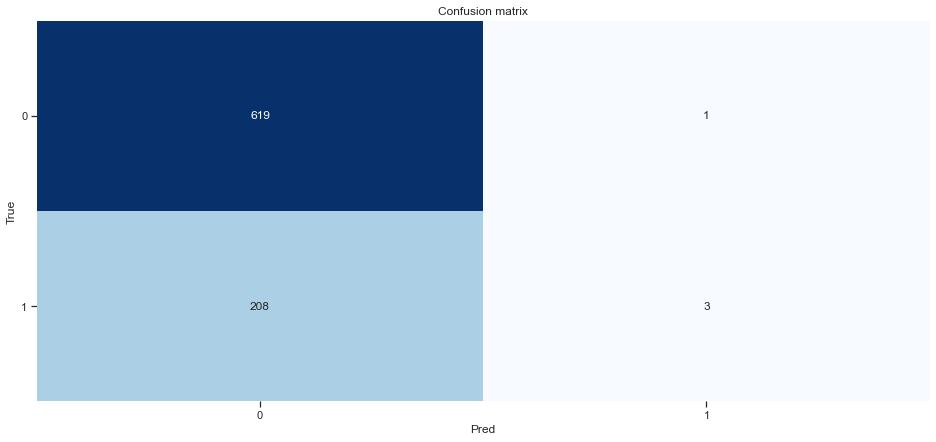

In [232]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, randomyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Neural Network</h1></font>

Neural Network
Artificial neural networks (ANN) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains.[1] The neural network itself is not an algorithm, but rather a framework for many different machine learning algorithms to work together and process complex data inputs.[2]

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model.

There are many ways to choose these numbers, but for simplicity we will choose 7 layers with 70 neurons along with 1000 max iterations.

In [233]:

mlp = MLPClassifier(hidden_layer_sizes=(70,70,70,70,70,70,70),max_iter=1000)
mlp.fit(X_train, y_train)
NNyhigh = mlp.predict(X_test)
mlp.score(X_train, y_train)
acc_high_mlp = round(mlp.score(X_train, y_train) * 100, 2)
acc_high_mlp

76.22

### Evaluation

In [234]:
nn_high_train_acc = metrics.accuracy_score(y_train, mlp.predict(X_train))
nn_high_test_acc = metrics.accuracy_score(y_test, NNyhigh)
print ('train', nn_high_train_acc, 'test', nn_high_test_acc)

train 0.7622485817431666 test 0.7388688327316486


In [235]:
NN_high_f1 = f1_score(y_test, NNyhigh, average='weighted') 
NN_high_f1

0.6556869577454413

In [236]:
NN_high_jac = jaccard_score(y_test, NNyhigh, average='weighted')
NN_high_jac

0.5608985003967464

In [237]:
NN_high_precision_score_macro = precision_score(y_test, NNyhigh, average='macro')
NN_high_precision_score_micro = precision_score(y_test, NNyhigh, average='micro')
NN_high_precision_score_weight = precision_score(y_test, NNyhigh, average='weighted')
print("Precision\nMacro:", NN_high_precision_score_macro.round(2), 
      "\nMicro:", NN_high_precision_score_micro.round(2),
      "\nWeighted:", NN_high_precision_score_weight.round(2))

Precision
Macro: 0.57 
Micro: 0.74 
Weighted: 0.66


In [238]:
NN_high_recall_score_macro = recall_score(y_test, NNyhigh, average='macro')
NN_high_recall_score_micro = recall_score(y_test, NNyhigh, average='micro')
NN_high_recall_score_weight = recall_score(y_test, NNyhigh, average='weighted')
print("Recall\nMacro:", NN_high_recall_score_macro.round(2), 
      "\nMicro:", NN_high_recall_score_micro.round(2),
      "\nWeighted:", NN_high_recall_score_weight.round(2))

Recall
Macro: 0.51 
Micro: 0.74 
Weighted: 0.74


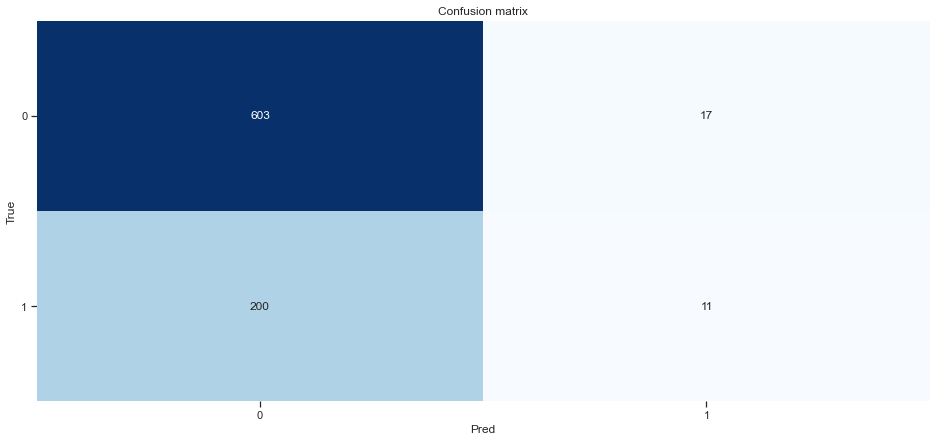

In [239]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, NNyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color='purple' size=6>Report</h1></font>

In [240]:
report = {'Model': ['KNN', 'Tree', 'SVM', 'LR', 'Naive Bayes', 'Random Forest', 'NN'], 
          'Train Accuracy': [knn_high_train_acc, tree_high_train_acc, svm_high_train_acc, lr_high_train_acc, gaus_high_train_acc, random_high_train_acc, nn_high_train_acc],
          'Test Accuracy': [knn_high_test_acc, tree_high_test_acc, svm_high_test_acc, lr_high_test_acc, gaus_high_test_acc, random_high_test_acc, nn_high_test_acc],
        'Jaccard': [knn_high_jac.round(2), tree_high_jac.round(2), svm_high_jac.round(2), lr_high_jac.round(2), gaus_high_jac.round(2), random_high_jac.round(2), NN_high_jac.round(2)],
       'F1-score': [knn_high_f1.round(2), tree_high_f1.round(2), svm_high_f1.round(2), lr_high_f1.round(2), gaus_high_f1.round(2), random_high_f1.round(2), NN_high_f1.round(2)],
       'LogLoss': ['NA', 'NA', 'NA', lr_ll.round(2), 'NA', 'NA', 'NA'],
         'Precision: Macro:': [KNN_high_precision_score_macro.round(2), tree_high_precision_score_macro.round(2), svm_high_precision_score_macro.round(2), lr_high_precision_score_macro.round(2), gaus_high_precision_score_macro.round(2), random_high_precision_score_macro.round(2), NN_high_precision_score_macro.round(2)],
         'Precision: Micro:': [KNN_high_precision_score_micro.round(2), tree_high_precision_score_micro.round(2), svm_high_precision_score_micro.round(2), lr_high_precision_score_micro.round(2), gaus_high_precision_score_micro.round(2), random_high_precision_score_micro.round(2), NN_high_precision_score_micro.round(2)],
         'Precision: Weighted:': [KNN_high_precision_score_weight.round(2), tree_high_precision_score_weight.round(2), svm_high_precision_score_weight.round(2), lr_high_precision_score_weight.round(2), gaus_high_precision_score_weight.round(2), random_high_precision_score_weight.round(2), NN_high_precision_score_weight.round(2)],
          'Recall: Macro:': [KNN_high_recall_score_macro.round(2), tree_high_recall_score_macro.round(2), svm_high_recall_score_macro.round(2), lr_high_recall_score_macro.round(2), gaus_high_recall_score_macro.round(2), random_high_recall_score_macro.round(2), NN_high_recall_score_macro.round(2)],
         'Recall: Micro:': [KNN_high_recall_score_micro.round(2), tree_high_recall_score_micro.round(2), svm_high_recall_score_micro.round(2), lr_high_recall_score_micro.round(2), gaus_high_recall_score_micro.round(2), random_high_recall_score_micro.round(2), NN_high_recall_score_micro.round(2)],
         'Recall: Weighted:': [KNN_high_recall_score_weight.round(2), tree_high_recall_score_weight.round(2), svm_high_recall_score_weight.round(2), lr_high_recall_score_weight.round(2), gaus_high_recall_score_weight.round(2), random_high_recall_score_weight.round(2), NN_high_recall_score_weight.round(2)],}
report_df = pd.DataFrame(report)
print("******************************************")
print("MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

******************************************
MODEL PERFORMANCE STATISTICS REPORT
******************************************
           Model  Train Accuracy  Test Accuracy  Jaccard  F1-score LogLoss  \
0            KNN        0.766374       0.726835     0.55      0.66      NA   
1           Tree        0.749355       0.737665     0.55      0.64      NA   
2            SVM        1.000000       0.746089     0.56      0.64      NA   
3             LR        0.746261       0.747292     0.56      0.64    1.19   
4    Naive Bayes        0.456421       0.399519     0.26      0.41      NA   
5  Random Forest        1.000000       0.748496     0.56      0.65      NA   
6             NN        0.762249       0.738869     0.56      0.66      NA   

   Precision: Macro:  Precision: Micro:  Precision: Weighted:  Recall: Macro:  \
0               0.53               0.72                  0.64            0.51   
1               0.46               0.74                  0.60            0.50   
2         

,Model,Train Accuracy,Test Accuracy,Jaccard,F1-score,LogLoss,Precision: Macro:,Precision: Micro:,Precision: Weighted:,Recall: Macro:,Recall: Micro:,Recall: Weighted:
0,KNN,0.766374,0.726835,0.55,0.66,NA,0.53,0.72,0.64,0.51,0.72,0.72
1,Tree,0.749355,0.737665,0.55,0.64,NA,0.46,0.74,0.60,0.50,0.74,0.74
2,SVM,1.000000,0.746089,0.56,0.64,NA,0.37,0.75,0.56,0.50,0.75,0.75
3,LR,0.746261,0.747292,0.56,0.64,1.19,0.87,0.75,0.81,0.50,0.75,0.75
4,Naive Bayes,0.456421,0.399519,0.26,0.41,NA,0.49,0.40,0.61,0.49,0.40,0.40
5,Random Forest,1.000000,0.748496,0.56,0.65,NA,0.75,0.75,0.75,0.51,0.75,0.75
6,NN,0.762249,0.738869,0.56,0.66,NA,0.57,0.74,0.66,0.51,0.74,0.74


### I'll try the different Naive Bayes algorithms since this model had the most true positives

<h1 align="center"><font color="darkblue" size=5>Naive Bayes</h1></font>

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions 
between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 
Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

### Gausian

In [241]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
yyyyhigh = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

45.64

### Evaluation

In [242]:
gaus_high_train_acc = metrics.accuracy_score(y_train, gaussian.predict(X_train))
gaus_high_test_acc = metrics.accuracy_score(y_test, yyyyhigh)
print ('train', gaus_high_train_acc, 'test', gaus_high_test_acc)

train 0.4564208354822073 test 0.39951865222623345


In [243]:
gaus_high_f1 = f1_score(y_test, yyyyhigh, average='weighted') 
gaus_high_f1

0.4146367560656769

In [244]:
gaus_high_jac = jaccard_score(y_test, yyyyhigh, average='weighted')
gaus_high_jac

0.2619915926669081

In [245]:
gaus_high_precision_score_macro = precision_score(y_test, yyyyhigh, average='macro')
gaus_high_precision_score_micro = precision_score(y_test, yyyyhigh, average='micro')
gaus_high_precision_score_weight = precision_score(y_test, yyyyhigh, average='weighted')
print("Precision\nMacro:", gaus_high_precision_score_macro.round(2), 
      "\nMicro:", gaus_high_precision_score_micro.round(2),
      "\nWeighted:", gaus_high_precision_score_weight.round(2))

Precision
Macro: 0.49 
Micro: 0.4 
Weighted: 0.61


In [246]:
gaus_high_recall_score_macro = recall_score(y_test, yyyyhigh, average='macro')
gaus_high_recall_score_micro = recall_score(y_test, yyyyhigh, average='micro')
gaus_high_recall_score_weight = recall_score(y_test, yyyyhigh, average='weighted')
print("Recall\nMacro:", gaus_high_recall_score_macro.round(2), 
      "\nMicro:", gaus_high_recall_score_micro.round(2),
      "\nWeighted:", gaus_high_recall_score_weight.round(2))

Recall
Macro: 0.49 
Micro: 0.4 
Weighted: 0.4


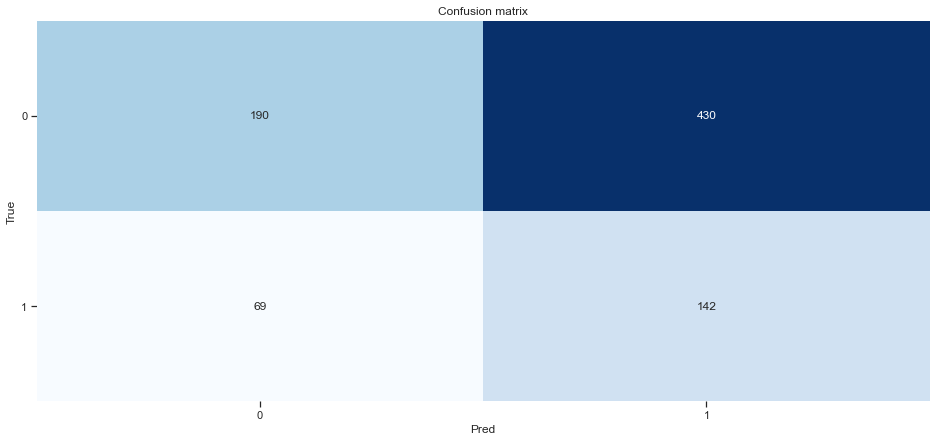

In [247]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyyyhigh, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Multinomial

In [253]:
# multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
multyhat = multinomial.predict(X_test)
acc_multinomial = round(multinomial.score(X_train, y_train) * 100, 2)
acc_multinomial

70.76

### Evaluation

In [254]:
multinomial_train_acc = metrics.accuracy_score(y_train, multinomial.predict(X_train))
multinomial_test_acc = metrics.accuracy_score(y_test, multyhat)
print ('train', multinomial_train_acc, 'test', multinomial_test_acc)

train 0.7075812274368231 test 0.703971119133574


In [256]:
multinomial_f1 = f1_score(y_test, multyhat, average='weighted') 
multinomial_f1

0.6582175318785081

In [257]:
multinomial_jac = jaccard_score(y_test, multyhat, average='weighted')
multinomial_jac

0.5434708908498713

In [258]:
multinomial_precision_score_macro = precision_score(y_test, multyhat, average='macro')
multinomial_precision_score_micro = precision_score(y_test, multyhat, average='micro')
multinomial_precision_score_weight = precision_score(y_test, multyhat, average='weighted')
print("Precision\nMacro:", multinomial_precision_score_macro.round(2), 
      "\nMicro:", multinomial_precision_score_micro.round(2),
      "\nWeighted:", multinomial_precision_score_weight.round(2))

Precision
Macro: 0.53 
Micro: 0.7 
Weighted: 0.64


In [259]:
multinomial_recall_score_macro = recall_score(y_test, multyhat, average='macro')
multinomial_recall_score_micro = recall_score(y_test, multyhat, average='micro')
multinomial_recall_score_weight = recall_score(y_test, multyhat, average='weighted')
print("Recall\nMacro:", multinomial_recall_score_macro.round(2), 
      "\nMicro:", multinomial_recall_score_micro.round(2),
      "\nWeighted:", multinomial_recall_score_weight.round(2))

Recall
Macro: 0.52 
Micro: 0.7 
Weighted: 0.7


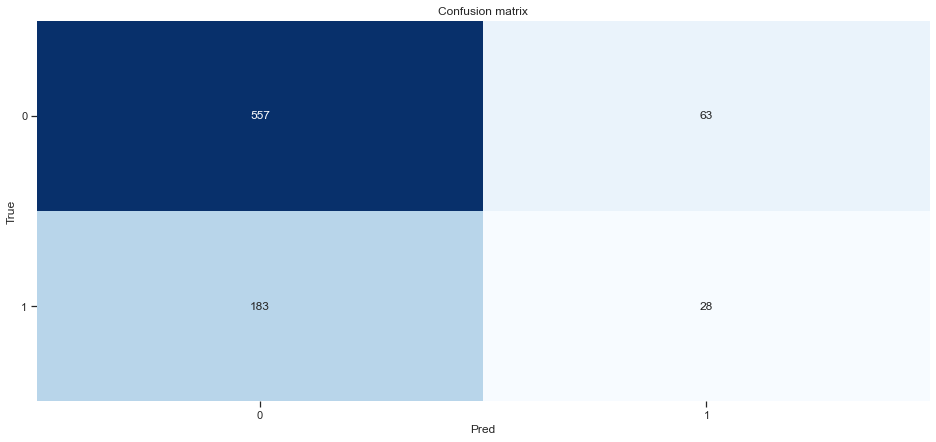

In [260]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, multyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Multinomial

In [253]:
# multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
multyhat = multinomial.predict(X_test)
acc_multinomial = round(multinomial.score(X_train, y_train) * 100, 2)
acc_multinomial

70.76

### Evaluation

In [254]:
multinomial_train_acc = metrics.accuracy_score(y_train, multinomial.predict(X_train))
multinomial_test_acc = metrics.accuracy_score(y_test, multyhat)
print ('train', multinomial_train_acc, 'test', multinomial_test_acc)

train 0.7075812274368231 test 0.703971119133574


In [256]:
multinomial_f1 = f1_score(y_test, multyhat, average='weighted') 
multinomial_f1

0.6582175318785081

In [257]:
multinomial_jac = jaccard_score(y_test, multyhat, average='weighted')
multinomial_jac

0.5434708908498713

In [258]:
multinomial_precision_score_macro = precision_score(y_test, multyhat, average='macro')
multinomial_precision_score_micro = precision_score(y_test, multyhat, average='micro')
multinomial_precision_score_weight = precision_score(y_test, multyhat, average='weighted')
print("Precision\nMacro:", multinomial_precision_score_macro.round(2), 
      "\nMicro:", multinomial_precision_score_micro.round(2),
      "\nWeighted:", multinomial_precision_score_weight.round(2))

Precision
Macro: 0.53 
Micro: 0.7 
Weighted: 0.64


In [259]:
multinomial_recall_score_macro = recall_score(y_test, multyhat, average='macro')
multinomial_recall_score_micro = recall_score(y_test, multyhat, average='micro')
multinomial_recall_score_weight = recall_score(y_test, multyhat, average='weighted')
print("Recall\nMacro:", multinomial_recall_score_macro.round(2), 
      "\nMicro:", multinomial_recall_score_micro.round(2),
      "\nWeighted:", multinomial_recall_score_weight.round(2))

Recall
Macro: 0.52 
Micro: 0.7 
Weighted: 0.7


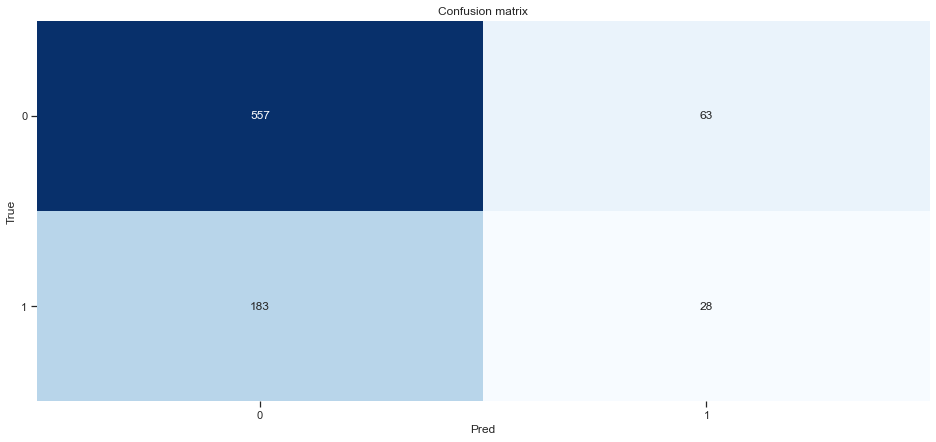

In [260]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, multyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Compliment

In [263]:
# Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB
complement = ComplementNB()
complement.fit(X_train, y_train)
compyhat = complement.predict(X_test)
acc_complement = round(complement.score(X_train, y_train) * 100, 2)
acc_complement

56.58

### Evaluation

In [264]:
complement_train_acc = metrics.accuracy_score(y_train, complement.predict(X_train))
complement_test_acc = metrics.accuracy_score(y_test, compyhat)
print ('train', complement_train_acc, 'test', complement_test_acc)

train 0.5657555440948943 test 0.5126353790613718


In [269]:
complement_f1 = f1_score(y_test, compyhat, average='weighted') 
complement_f1

0.5439776687508054

In [265]:
complement_jac = jaccard_score(y_test, compyhat, average='weighted')
complement_jac

0.3837804112384241

In [266]:
complement_precision_score_macro = precision_score(y_test, compyhat, average='macro')
complement_precision_score_micro = precision_score(y_test, compyhat, average='micro')
complement_precision_score_weight = precision_score(y_test, compyhat, average='weighted')
print("Precision\nMacro:", complement_precision_score_macro.round(2), 
      "\nMicro:", complement_precision_score_micro.round(2),
      "\nWeighted:", complement_precision_score_weight.round(2))

Precision
Macro: 0.49 
Micro: 0.51 
Weighted: 0.62


In [267]:
complement_recall_score_macro = recall_score(y_test, compyhat, average='macro')
complement_recall_score_micro = recall_score(y_test, compyhat, average='micro')
complement_recall_score_weight = recall_score(y_test, compyhat, average='weighted')
print("Recall\nMacro:", complement_recall_score_macro.round(2), 
      "\nMicro:", complement_recall_score_micro.round(2),
      "\nWeighted:", complement_recall_score_weight.round(2))

Recall
Macro: 0.49 
Micro: 0.51 
Weighted: 0.51


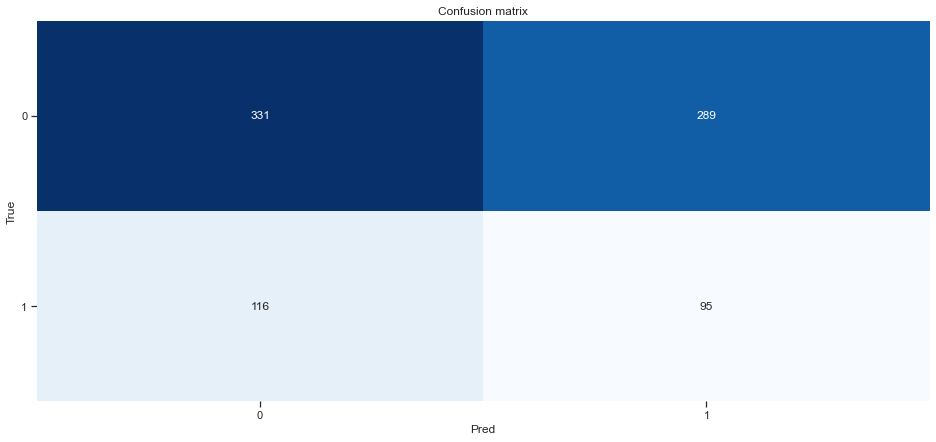

In [268]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, compyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### Bernoulli

In [270]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)
bernyhat = bernoulli.predict(X_test)
acc_bernoulli = round(bernoulli.score(X_train, y_train) * 100, 2)
acc_bernoulli

73.59

### Evaluation

In [271]:
bernoulli_train_acc = metrics.accuracy_score(y_train, bernoulli.predict(X_train))
bernoulli_test_acc = metrics.accuracy_score(y_test, bernyhat)
print ('train', bernoulli_train_acc, 'test', bernoulli_test_acc)

train 0.7359463641052089 test 0.7521058965102286


In [272]:
bernoulli_f1 = f1_score(y_test, bernyhat, average='weighted') 
bernoulli_f1

0.6803953703028058

In [273]:
bernoulli_jac = jaccard_score(y_test, bernyhat, average='weighted')
bernoulli_jac

0.5798325047447259

In [274]:
bernoulli_precision_score_macro = precision_score(y_test, bernyhat, average='macro')
bernoulli_precision_score_micro = precision_score(y_test, bernyhat, average='micro')
bernoulli_precision_score_weight = precision_score(y_test, bernyhat, average='weighted')
print("Precision\nMacro:", bernoulli_precision_score_macro.round(2), 
      "\nMicro:", bernoulli_precision_score_micro.round(2),
      "\nWeighted:", bernoulli_precision_score_weight.round(2))

Precision
Macro: 0.66 
Micro: 0.75 
Weighted: 0.71


In [275]:
bernoulli_recall_score_macro = recall_score(y_test, bernyhat, average='macro')
bernoulli_recall_score_micro = recall_score(y_test, bernyhat, average='micro')
bernoulli_recall_score_weight = recall_score(y_test, bernyhat, average='weighted')
print("Recall\nMacro:", bernoulli_recall_score_macro.round(2), 
      "\nMicro:", bernoulli_recall_score_micro.round(2),
      "\nWeighted:", bernoulli_recall_score_weight.round(2))

Recall
Macro: 0.54 
Micro: 0.75 
Weighted: 0.75


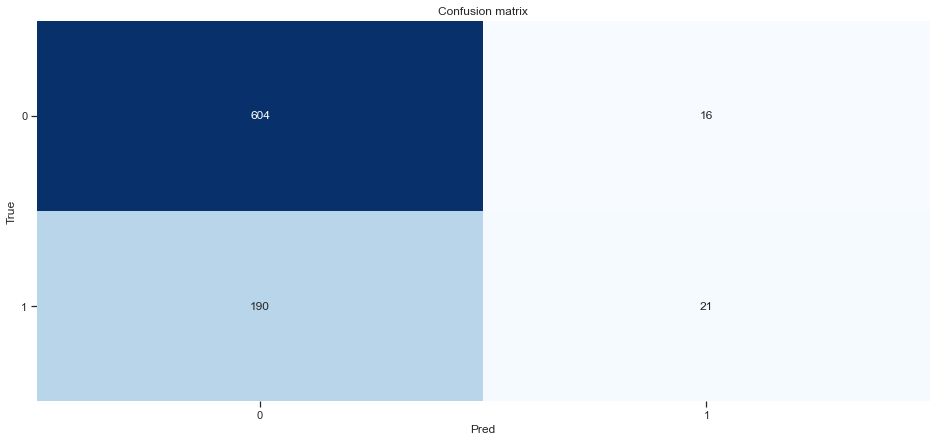

In [276]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, bernyhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### I'll now look closer at the complement naive bayes since it had a balance of higher true positives with lower false negatives

In [289]:
complement.get_params([])

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'norm': False}

In [298]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], 'norm': [True, False]}
complement_new = GridSearchCV(complement, parameters)
complement_new.fit(X_train, y_train)
print("Tuned Complement Naive Bayes Parameters: {}".format(complement_new.best_params_))
print("Best score is {}".format(complement_new.best_score_))

Tuned Complement Naive Bayes Parameters: {'alpha': 0.5, 'norm': True}
Best score is 0.7472921494978555


In [299]:
complement2 = ComplementNB(alpha=0.5, norm=True)
complement2.fit(X_train, y_train)
comp2yhat = complement2.predict(X_test)
acc_complement2 = round(complement2.score(X_train, y_train) * 100, 2)
acc_complement2

74.63

### Evaluation

In [301]:
complement2_train_acc = metrics.accuracy_score(y_train, complement2.predict(X_train))
complement2_test_acc = metrics.accuracy_score(y_test, comp2yhat)
print ('train', complement2_train_acc, 'test', complement2_test_acc)

train 0.7462609592573491 test 0.7460890493381468


In [302]:
complement2_f1 = f1_score(y_test, comp2yhat, average='weighted') 
complement2_f1

0.6375950525012419

In [303]:
complement2_jac = jaccard_score(y_test, comp2yhat, average='weighted')
complement2_jac

0.5566488695422996

In [304]:
complement2_precision_score_macro = precision_score(y_test, comp2yhat, average='macro')
complement2_precision_score_micro = precision_score(y_test, comp2yhat, average='micro')
complement2_precision_score_weight = precision_score(y_test, comp2yhat, average='weighted')
print("Precision\nMacro:", complement2_precision_score_macro.round(2), 
      "\nMicro:", complement2_precision_score_micro.round(2),
      "\nWeighted:", complement2_precision_score_weight.round(2))

Precision
Macro: 0.37 
Micro: 0.75 
Weighted: 0.56


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [305]:
complement2_recall_score_macro = recall_score(y_test, comp2yhat, average='macro')
complement2_recall_score_micro = recall_score(y_test, comp2yhat, average='micro')
complement2_recall_score_weight = recall_score(y_test, comp2yhat, average='weighted')
print("Recall\nMacro:", complement2_recall_score_macro.round(2), 
      "\nMicro:", complement2_recall_score_micro.round(2),
      "\nWeighted:", complement2_recall_score_weight.round(2))

Recall
Macro: 0.5 
Micro: 0.75 
Weighted: 0.75


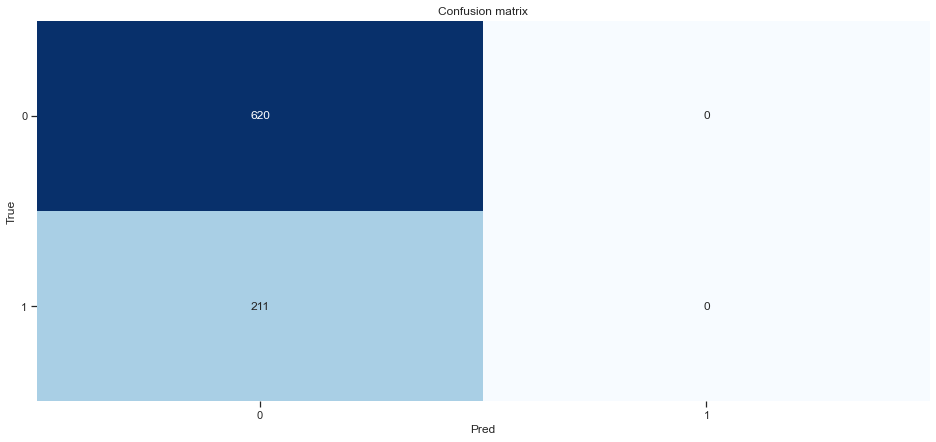

In [306]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, comp2yhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

In [ ]:
# LR.get_params([])

### find best parameters

In [ ]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'C':[0.001, 0.01, 0.1], 'solver': ['lbfgs', 'sag', 'saga']}
# LR = LogisticRegression(max_iter=10000)
# LR_new = GridSearchCV(LR, parameters)
# LR_new.fit(X_train, y_train)
# print("Tuned Linear Regression Parameters: {}".format(LR_new.best_params_))
# print("Best score is {}".format(LR_new.best_score_))

In [ ]:
# LR2 = LogisticRegression(C=0.01, solver='sag', max_iter=10000).fit(X_train,y_train)
# LR2

In [ ]:
# yyyhigh_2 = LR2.predict(X_test)
# yyyhigh_2[0:5]

In [ ]:
# yhat_high_prob_2 = LR2.predict_proba(X_test)

### Evaluation

In [ ]:
# lr2_high_train_acc = metrics.accuracy_score(y_train, LR2.predict(X_train))
# lr2_high_test_acc = metrics.accuracy_score(y_test, yyyhigh_2)
# print ('train', lr2_high_train_acc, 'test', lr2_high_test_acc)

In [ ]:
# lr2_high_f1 = f1_score(y_test, yyyhigh_2, average='weighted') 
# lr2_high_f1

In [ ]:
# lr2_high_jac = jaccard_score(y_test, yyyhigh_2, average='weighted')
# lr2_high_jac

In [ ]:
# lr2_high_ll = log_loss(y_test, yhat_high_prob_2)
# lr2_high_ll

### Look to see which features the model finds most significant

In [ ]:
# coeff_df = pd.DataFrame(NHANES_new.columns)
# coeff_df.columns = ['Feature']
# coeff_df["Correlation"] = pd.Series(LR2.coef_[0])

# coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

In [ ]:
# report = {'Model': ['LR', 'LR2'], 
#           'Train Accuracy': [lr_high_train_acc, lr2_high_train_acc],
#           'Test Accuracy': [lr_high_test_acc, lr2_high_test_acc],
#         'Jaccard': [lr_high_jac.round(2), lr2_high_jac.round(2)],
#        'F1-score': [lr_high_f1.round(2), lr2_high_f1.round(2)],
#        'LogLoss': [lr_high_ll.round(2), lr2_high_ll.round(2)]}
# report_df = pd.DataFrame(report)
# print("******************************************")
# print("MODEL PERFORMANCE STATISTICS REPORT")
# print("******************************************")
# print(report_df)
# print("******************************************")
# report_df

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yyyhigh_2, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

### SO PRETTY GOOD! I HAVE A LINEAR REGRESSION MODEL THAT CAN PREDICT WHETHER SOMEONE HAS A TOTAL METAL CONTENT (IN UG/L) THAT IS HIGHER THAN 95% OF OTHER PEOPLE

### LET ME SEE NOW WHAT FEATURES I CAN REMOVE WHILE KEEPING THE ACCURACY HIGH

#X.columns

NHANES_short = NHANES_new
NHANES_short = NHANES_short.drop(['BirthCountry_Other', 'BirthCountry_Refused', 'BirthCountry_USA',
       'AnnualHouseIncome_$0-$4,999', 'AnnualHouseIncome_$10,000-$14,999',
       'AnnualHouseIncome_$100,000 and over',
       'AnnualHouseIncome_$15,000-$19,999',
       'AnnualHouseIncome_$20,000 and over',
       'AnnualHouseIncome_$20,000-$24,999',
       'AnnualHouseIncome_$25,000-$34,999',
       'AnnualHouseIncome_$35,000-$44,999',
       'AnnualHouseIncome_$45,000-$54,999', 'AnnualHouseIncome_$5,000-$9,999',
       'AnnualHouseIncome_$55,000-$64,999',
       'AnnualHouseIncome_$65,000-$74,999',
       'AnnualHouseIncome_$75,000-$99,999', "AnnualHouseIncome_Don't know",
       'AnnualHouseIncome_Refused', 'AnnualHouseIncome_under $20,000'], axis = 1)

NHANES_short.head()

NHANES_short.shape

### And now I'll run the optimized model again

<h1 align="center"><font color='purple' size=6>New Feature Selection</h1></font>

### Build a model to predict the "High" total metal feature

Lets defind feature sets, X:

X = NHANES_short.drop("High", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

y = NHANES_short['High'].values
y

### Split the data (70/30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

### find best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001, 0.01, 0.1], 'solver': ['lbfgs', 'sag', 'saga']}
LR = LogisticRegression(max_iter=10000)
LR_short = GridSearchCV(LR, parameters)
LR_short.fit(X_train, y_train)
print("Tuned Linear Regression Parameters: {}".format(LR_short.best_params_))
print("Best score is {}".format(LR_short.best_score_))

LR_short = LogisticRegression(C=0.01, solver='lbfgs', max_iter=10000).fit(X_train,y_train)
LR_short

yhat_short = LR_short.predict(X_test)
yhat_short[0:5]

yhat_short_prob = LR_short.predict_proba(X_test)

### Evaluation

lr_short_train_acc = metrics.accuracy_score(y_train, LR_short.predict(X_train))
lr_short_test_acc = metrics.accuracy_score(y_test, yhat_short)
print ('train', lr_short_train_acc, 'test', lr_short_test_acc)

lr_short_f1 = f1_score(y_test, yhat_short, average='weighted') 
lr_short_f1

lr_short_jac = jaccard_score(y_test, yhat_short, average='weighted')
lr_short_jac

lr_short_ll = log_loss(y_test, yhat_short_prob)
lr_short_ll

### Look to see which features the model finds most significant

coeff_df = pd.DataFrame(NHANES_short.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR_short.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

report = {'Model': ['LR', 'LR2', 'LR_short'], 
          'Train Accuracy': [lr_high_train_acc, lr2_high_train_acc, lr_short_train_acc],
          'Test Accuracy': [lr_high_test_acc, lr2_high_test_acc, lr_short_test_acc],
        'Jaccard': [lr_high_jac.round(2), lr2_high_jac.round(2), lr_short_jac.round(2)],
       'F1-score': [lr_high_f1.round(2), lr2_high_f1.round(2), lr_short_f1.round(2)],
       'LogLoss': [lr_high_ll.round(2), lr2_high_ll.round(2), lr_short_ll.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

### So, I was able to simplify the model and reduce dimensionality by removing all the income features AND was able to still keep the same accuracy..
### Let's see what else I can remove...

#NHANES_short.columns

#I'll drop the features about when the subjects last received healthcare
NHANES_shorter = NHANES_short.drop(['ReceiveHealthPastYear_5.399999999999999e-79',
       'ReceiveHealthPastYear_1', 'ReceiveHealthPastYear_10-12',
       'ReceiveHealthPastYear_13-15', 'ReceiveHealthPastYear_16 or more',
       'ReceiveHealthPastYear_2-3', 'ReceiveHealthPastYear_4-5',
       'ReceiveHealthPastYear_6-7', 'ReceiveHealthPastYear_8-9',
       "ReceiveHealthPastYear_Don't Know"], axis=1)

print("Short:", NHANES_short.shape, "\nShorter:", NHANES_shorter.shape)

### ...and as usual, I'll now test the model again

<h1 align="center"><font color='purple' size=6>New Feature Selection</h1></font>

### Build a model to predict the "High" total metal feature

Lets defind feature sets, X:

X = NHANES_shorter.drop("High", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

y = NHANES_shorter['High'].values
y

### Split the data (70/30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

### find best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001, 0.01, 0.1], 'solver': ['lbfgs', 'sag', 'saga']}
LR = LogisticRegression(max_iter=10000)
LR_shorter = GridSearchCV(LR, parameters)
LR_shorter.fit(X_train, y_train)
print("Tuned Linear Regression Parameters: {}".format(LR_shorter.best_params_))
print("Best score is {}".format(LR_shorter.best_score_))

LR_shorter = LogisticRegression(C=0.01, solver='lbfgs', max_iter=10000).fit(X_train,y_train)
LR_shorter

yhat_shorter = LR_shorter.predict(X_test)
yhat_shorter[0:5]

yhat_shorter_prob = LR_shorter.predict_proba(X_test)

### Evaluation

lr_shorter_train_acc = metrics.accuracy_score(y_train, LR_shorter.predict(X_train))
lr_shorter_test_acc = metrics.accuracy_score(y_test, yhat_shorter)
print ('train', lr_shorter_train_acc, 'test', lr_shorter_test_acc)

lr_shorter_f1 = f1_score(y_test, yhat_shorter, average='weighted') 
lr_shorter_f1

lr_shorter_jac = jaccard_score(y_test, yhat_shorter, average='weighted')
lr_shorter_jac

lr_shorter_ll = log_loss(y_test, yhat_shorter_prob)
lr_shorter_ll

### Look to see which features the model finds most significant

coeff_df = pd.DataFrame(NHANES_shorter.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR_shorter.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

report = {'Model': ['LR', 'LR2', 'LR_short', 'LR_shorter'], 
          'Train Accuracy': [lr_high_train_acc, lr2_high_train_acc, lr_short_train_acc, lr_shorter_train_acc],
          'Test Accuracy': [lr_high_test_acc, lr2_high_test_acc, lr_short_test_acc, lr_shorter_test_acc],
        'Jaccard': [lr_high_jac.round(2), lr2_high_jac.round(2), lr_short_jac.round(2), lr_shorter_jac.round(2)],
       'F1-score': [lr_high_f1.round(2), lr2_high_f1.round(2), lr_short_f1.round(2), lr_shorter_f1.round(2)],
       'LogLoss': [lr_high_ll.round(2), lr2_high_ll.round(2), lr_short_ll.round(2), lr_shorter_ll.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

### Alright, so I've reduced the dimensions quite a bit without any reduction in accuracy. Let me pick only those features that we could easily get in the lab or associated questionairre

NHANES_shorter.columns

### I'll now make a dataframe with only those features we could easily get in the lab or questions

NHANES_shortest = NHANES_shorter[['Age_years', 'HouseholdSize', 'FamilySize','Albumin_g/L', 'Bicarb_mmol/L', 'BUN_mmol/L', 'Chloride_mmol/L',
       'Creatinine_umol/L', 'Globulin_g/L', 'Glu_mg/dL', 'Phosphorus_mmol/L',
       'Potassium_mmol/L', 'Sodium_mmol/L', 'Calcium_mmol/L',
       'TotalProtein_g/L', 'Gender_Female', 'Gender_Male',"PesticideUseHome_Don't know", 'PesticideUseHome_No',
       'PesticideUseHome_Yes', "PesticideUsedWeeds_Don't know",
       'PesticideUsedWeeds_No', 'PesticideUsedWeeds_Yes', 'SmokeNow_Every Day', 'SmokeNow_Not At All',
       'SmokeNow_Some Days', 'EverUsedEcig_No', 'EverUsedEcig_Yes', 'High']]

NHANES_shortest.shape

### So, I've kept 28 features (+1 predictor "High")

### As usual, I'll now test the model

print("Short:", NHANES_short.shape, "\nShorter:", NHANES_shorter.shape, "\nShortest:", NHANES_shortest.shape)

### ...and as usual, I'll now test the model again

<h1 align="center"><font color='purple' size=6>New Feature Selection</h1></font>

### Build a model to predict the "High" total metal feature

Lets defind feature sets, X:

X = NHANES_shortest.drop("High", axis=1)
#uncomment below to check columns
#X.columns

And now I'll define the label/predictor/target variable

y = NHANES_shortest['High'].values
y

### Split the data (70/30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

<h1 align="center"><font color='purple' size=6>Standardize the Data</h1></font>

### Data Standardization give data zero mean and unit variance

min_max_scaler = preprocessing.MinMaxScaler()
x_processed = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(x_processed, columns = X.columns)
X.head()

<h1 align="center"><font color="darkblue" size=5>Linear Regression</h1></font>

### find best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.001, 0.01, 0.1], 'solver': ['lbfgs', 'sag', 'saga']}
LR = LogisticRegression(max_iter=10000)
LR_shortest = GridSearchCV(LR, parameters)
LR_shortest.fit(X_train, y_train)
print("Tuned Linear Regression Parameters: {}".format(LR_shortest.best_params_))
print("Best score is {}".format(LR_shortest.best_score_))

LR_shortest = LogisticRegression(C=0.001, solver='lbfgs', max_iter=10000).fit(X_train,y_train)
LR_shortest

yhat_shortest = LR_shortest.predict(X_test)
yhat_shortest[0:5]

yhat_shortest_prob = LR_shortest.predict_proba(X_test)

### Evaluation

lr_shortest_train_acc = metrics.accuracy_score(y_train, LR_shortest.predict(X_train))
lr_shortest_test_acc = metrics.accuracy_score(y_test, yhat_shortest)
print ('train', lr_shortest_train_acc, 'test', lr_shortest_test_acc)

lr_shortest_f1 = f1_score(y_test, yhat_shortest, average='weighted') 
lr_shortest_f1

lr_shortest_jac = jaccard_score(y_test, yhat_shortest, average='weighted')
lr_shortest_jac

lr_shortest_ll = log_loss(y_test, yhat_shortest_prob)
lr_shortest_ll

### Look to see which features the model finds most significant

coeff_df = pd.DataFrame(NHANES_shortest.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(LR_shortest.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)[0:10] # change the index to get top positive, negative, etc..

report = {'Model': ['LR', 'LR2', 'LR_short', 'LR_shorter', 'LR_shortest'], 
          'Train Accuracy': [lr_high_train_acc, lr2_high_train_acc, lr_short_train_acc, lr_shorter_train_acc, lr_shortest_train_acc],
          'Test Accuracy': [lr_high_test_acc, lr2_high_test_acc, lr_short_test_acc, lr_shorter_test_acc, lr_shortest_test_acc],
        'Jaccard': [lr_high_jac.round(2), lr2_high_jac.round(2), lr_short_jac.round(2), lr_shorter_jac.round(2), lr_shortest_jac.round(2)],
       'F1-score': [lr_high_f1.round(2), lr2_high_f1.round(2), lr_short_f1.round(2), lr_shorter_f1.round(2), lr_shortest_f1.round(2)],
       'LogLoss': [lr_high_ll.round(2), lr2_high_ll.round(2), lr_short_ll.round(2), lr_shorter_ll.round(2), lr_shortest_ll.round(2)]}
report_df = pd.DataFrame(report)
print("******************************************")
print("MODEL PERFORMANCE STATISTICS REPORT")
print("******************************************")
print(report_df)
print("******************************************")
report_df

NHANES_shortest.columns

classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yhat_shortest, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()